In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# # Example: Copying a file from Colab's local environment to Google Drive
# !cp /content/my_data.csv "/content/gdrive/MyDrive/Colab_Files/my_data.csv"
# !cp -r /content/results "/content/gdrive/MyDrive/Colab_Files/results"

In [15]:
!rm -rf results.zip

In [18]:
!zip -r results.zip results/

  adding: results/ (stored 0%)
  adding: results/mixed/ (stored 0%)
  adding: results/mixed/player_and_ball_class/ (stored 0%)
  adding: results/mixed/player_and_ball_class/training/ (stored 0%)
  adding: results/mixed/player_and_ball_class/training/small/ (stored 0%)
  adding: results/mixed/player_and_ball_class/training/small/results.png (deflated 8%)
  adding: results/mixed/player_and_ball_class/training/small/val_batch0_pred.jpg (deflated 6%)
  adding: results/mixed/player_and_ball_class/training/small/confusion_matrix_normalized.png (deflated 32%)
  adding: results/mixed/player_and_ball_class/training/small/train_batch5741.jpg (deflated 4%)
  adding: results/mixed/player_and_ball_class/training/small/val_batch1_pred.jpg (deflated 5%)
  adding: results/mixed/player_and_ball_class/training/small/train_batch1.jpg (deflated 3%)
  adding: results/mixed/player_and_ball_class/training/small/BoxF1_curve.png (deflated 12%)
  adding: results/mixed/player_and_ball_class/training/small/labels

## Setup

### Install Library

In [3]:
!pip install -U ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00:00:0100:01
  Attempting unins

### Import Library

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import time as time
from ultralytics import YOLO
from roboflow import Roboflow

## Download Dataset

### Internal

#### Dataset All Class

In [5]:
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("tarkam-football-analytics-wo42f")
version = project.version(4)
dataset = version.download("yolov11", location="dataset/internal/all_class")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/internal/all_class in yolov11:: 100%|██████████| 372/372 [00:00<00:00, 8362.62it/s]


#### Dataset Player and Ball Class

In [6]:
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("tarkam-football-analytics-wo42f")
version = project.version(5)
dataset = version.download("yolov11", location="dataset/internal/player_and_ball_class")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/internal/player_and_ball_class in yolov11:: 100%|██████████| 372/372 [00:00<00:00, 8352.59it/s]


### External

#### Dataset All Class

In [7]:
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("tarkam-football-analytics-external-dataset-wagak")
version = project.version(2)
dataset = version.download("yolov11", location="dataset/external/all_class")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/external/all_class in yolov11:: 100%|██████████| 1350/1350 [00:00<00:00, 7152.30it/s]


### Dataset Mixed (Internal and External)

#### Dataset All Class

In [8]:
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("tarkam-football-analytics-merged-external-and-internal-kb5hd")
version = project.version(1)
dataset = version.download("yolov11", location="dataset/mixed/all_class")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/mixed/all_class in yolov11:: 100%|██████████| 1600/1600 [00:00<00:00, 7431.01it/s]


#### Dataset Player and Ball Class

In [6]:
rf = Roboflow(api_key="WWJdZX5UOO7rAWKStVqI")
project = rf.workspace("abiya-thesis").project("tarkam-football-analytics-merged-external-and-internal-kb5hd")
version = project.version(2)
dataset = version.download("yolov11", location="dataset/mixed/player_and_ball_class")

loading Roboflow workspace...
loading Roboflow project...


## Training

### Internal

#### All Class

In [9]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = 16 # Jika ingin limitasi GPU menggunakan -1
device = [0]
data_path_internal_all_class = "dataset/internal/all_class"
project_base_internal_all_class = "results/internal/all_class"

In [ ]:
def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

In [10]:
# Training and Evaluating Using Test Set
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_internal_all_class}/data.yaml",
        epochs=epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_internal_all_class}/training",
        name=f"{size}",
        exist_ok=True,
        device=device
    )

    measure_and_save_time(start_time, f"{project_base_internal_all_class}/training/summary/time/{size}-train-time.txt")

    csv_filename = f"{project_base_internal_all_class}/training/summary/metrics/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_internal_all_class}/data.yaml",
        imgsz=640,
        project=f"{project_base_internal_all_class}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_internal_all_class}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...


100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/all_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/dataset/internal/all_class/train/labels... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 1275.81it/s]

train: New cache created: /kaggle/working/dataset/internal/all_class/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 342.2±185.7 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 4674.36it/s]

val: New cache created: /kaggle/working/dataset/internal/all_class/valid/labels.cache


Plotting labels to results/internal/all_class/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/all_class/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.64G      1.656      3.888      1.033        348        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10        141     0.0105      0.191     0.0923     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.66G      1.576      2.992     0.9659        254        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all         10        141     0.0115      0.221     0.0909     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.67G      1.614      2.059     0.9812        354        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141     0.0137      0.258      0.128     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.69G       1.59      1.611     0.9827        276        640: 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         10        141      0.015      0.246      0.125     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.7G      1.493      1.344     0.9549        324        640: 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         10        141     0.0205      0.324      0.111     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.72G      1.474      1.283     0.9619        273        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         10        141     0.0321      0.513      0.266      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.73G      1.455      1.206     0.9435        305        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all         10        141     0.0328      0.533      0.312      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.87G      1.427      1.162     0.9257        283        640: 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all         10        141     0.0347      0.562      0.339      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.88G      1.356      1.136     0.9278        345        640: 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10        141       0.97      0.258      0.352      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.9G      1.355      1.094      0.928        250        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all         10        141       0.97      0.242      0.374      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.04G       1.39      1.092     0.9108        347        640: 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10        141       0.96      0.296       0.35      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.06G      1.384      1.111      0.913        348        640: 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         10        141      0.935       0.33       0.38      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.07G      1.358      1.075     0.9207        287        640: 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all         10        141      0.635      0.341      0.392      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.09G      1.415      1.063     0.9323        274        640: 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all         10        141      0.772      0.438      0.437       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.1G      1.333      1.037     0.9132        307        640: 100%|██████████| 10/10 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         10        141      0.833       0.45       0.49      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.11G      1.336     0.9946      0.913        353        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all         10        141      0.792      0.515       0.53      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.13G      1.302     0.9684     0.9145        246        640: 100%|██████████| 10/10 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         10        141      0.873      0.574      0.578      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.14G      1.297     0.9406     0.9144        367        640: 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all         10        141      0.922      0.548      0.638      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.16G      1.246     0.8975     0.8874        326        640: 100%|██████████| 10/10 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         10        141      0.891      0.565      0.647      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.17G      1.261      0.871     0.8832        281        640: 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all         10        141       0.97      0.554      0.653      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.19G       1.27      0.876      0.893        339        640: 100%|██████████| 10/10 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]

                   all         10        141      0.914      0.653      0.658      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.33G      1.245     0.8604     0.8982        261        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        141      0.959      0.665      0.659      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.35G      1.221     0.8409     0.8887        297        640: 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all         10        141      0.976      0.604      0.659      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.36G      1.198     0.8131     0.8866        247        640: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all         10        141      0.988      0.616       0.66      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.38G      1.227      0.818     0.8901        323        640: 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         10        141      0.951      0.592      0.655      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.39G       1.21      0.816     0.8824        329        640: 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all         10        141      0.951      0.527      0.654      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.41G      1.149      0.804     0.8832        234        640: 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all         10        141      0.924      0.638      0.659      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.42G      1.154     0.7786     0.8766        291        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         10        141      0.878      0.623      0.663      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.44G      1.214     0.8001     0.8941        336        640: 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         10        141      0.938      0.665      0.659      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.45G      1.152     0.7968     0.8838        359        640: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all         10        141      0.995      0.659      0.663      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.46G      1.171     0.7822     0.8804        327        640: 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]

                   all         10        141      0.993      0.667      0.663      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.48G      1.178      0.779     0.8754        303        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]

                   all         10        141      0.979      0.641      0.663      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.49G      1.129     0.7569     0.8699        409        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         10        141      0.964      0.646      0.662      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.51G      1.113     0.7345     0.8754        388        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all         10        141      0.988      0.662      0.663       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.52G      1.138     0.7593     0.8709        341        640: 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         10        141      0.989      0.662      0.663      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.54G      1.112     0.7354      0.872        288        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        141      0.992      0.643      0.704      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.55G      1.145      0.743     0.8841        281        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10        141      0.989      0.663      0.663      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.57G      1.083     0.7195     0.8659        308        640: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         10        141      0.988      0.662      0.705      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.58G      1.115     0.7062     0.8804        302        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         10        141      0.991      0.663      0.706      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.6G      1.116     0.7253     0.8723        228        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all         10        141      0.968      0.667      0.708      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.61G      1.141     0.7137     0.8697        259        640: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         10        141      0.993       0.66      0.732      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.63G       1.08     0.6919     0.8652        305        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         10        141      0.996      0.667      0.741      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.78G      1.088     0.7008     0.8659        298        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.50it/s]

                   all         10        141      0.994      0.662      0.696      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.79G       1.07     0.6977     0.8726        305        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         10        141      0.993      0.665      0.747      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.8G      1.071     0.6992     0.8612        261        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all         10        141      0.998      0.664      0.691       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.82G      1.081     0.6932     0.8634        357        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        141      0.991      0.664      0.752       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.83G      1.059     0.6786     0.8673        244        640: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all         10        141      0.994      0.664      0.696      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.85G      1.072     0.6837     0.8732        347        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        141      0.984      0.652      0.789      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.87G      1.066     0.6739     0.8667        347        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         10        141      0.987      0.667      0.812      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.88G      1.061     0.6844     0.8624        310        640: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         10        141      0.994      0.663      0.721      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.89G      1.056     0.6647     0.8568        320        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10        141      0.995      0.661      0.798      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.91G       1.02     0.6485      0.857        296        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all         10        141      0.995      0.663      0.805       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.92G      1.031     0.6572     0.8577        343        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         10        141      0.994      0.667       0.74      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.94G      1.016     0.6632     0.8596        390        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all         10        141      0.993      0.667      0.805      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.95G      1.011     0.6394     0.8524        241        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all         10        141      0.991      0.667      0.726      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.97G      1.045     0.6433     0.8529        377        640: 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         10        141      0.995      0.663      0.778      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.98G      1.027     0.6391      0.851        239        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all         10        141      0.992      0.667      0.705      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         4G      1.026     0.6231     0.8525        281        640: 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         10        141      0.996      0.665      0.717      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.01G      1.017     0.6434     0.8542        314        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         10        141       0.89      0.754      0.789      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.03G      1.018     0.6513     0.8503        398        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         10        141      0.777      0.735      0.718      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.04G     0.9715     0.6327     0.8482        250        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10        141      0.919      0.792      0.789      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.06G     0.9553      0.617     0.8533        313        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all         10        141      0.996      0.667      0.682      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.07G     0.9989     0.6255     0.8499        247        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         10        141      0.803      0.748      0.735      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.09G     0.9969     0.6253     0.8479        372        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         10        141      0.714      0.708      0.698      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.1G     0.9553     0.6173     0.8491        314        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all         10        141      0.723      0.708      0.698      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.12G     0.9341     0.6213     0.8483        315        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.839       0.75      0.752      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.13G     0.9536     0.6349     0.8511        303        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all         10        141      0.845       0.75      0.748      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.15G      0.934      0.615     0.8476        243        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all         10        141       0.94      0.792      0.804      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.16G     0.9606     0.6156     0.8559        278        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         10        141      0.937      0.792      0.803      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.18G     0.9632     0.6272     0.8457        326        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.19it/s]

                   all         10        141      0.922      0.792      0.804      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.19G     0.9491     0.6119     0.8453        359        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all         10        141      0.931      0.792      0.806      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.21G     0.9532      0.606     0.8437        266        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all         10        141      0.916      0.792      0.822      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.22G     0.9883     0.6323     0.8536        358        640: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        141      0.934      0.792       0.81      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.24G     0.9568     0.6093     0.8545        284        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all         10        141      0.937      0.792      0.817      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.25G      0.927     0.5897     0.8407        264        640: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         10        141      0.941      0.792      0.817      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.27G     0.9387     0.5939     0.8439        314        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all         10        141      0.954      0.792      0.817      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.28G     0.9474     0.5897     0.8436        291        640: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all         10        141      0.986       0.75      0.768      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.29G     0.9305     0.5924      0.843        236        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         10        141      0.982      0.749      0.765      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.31G     0.9344     0.5894     0.8416        272        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         10        141      0.978      0.747      0.765       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.32G     0.9198     0.5911     0.8442        256        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        141      0.984       0.75      0.763       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.48G     0.9119     0.5865     0.8331        305        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        141      0.968      0.792      0.813      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.49G     0.9062     0.5749     0.8382        369        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.18it/s]

                   all         10        141      0.969      0.792      0.814      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.51G     0.9149     0.5937     0.8423        281        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10        141      0.968      0.792      0.814      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.52G     0.8798     0.5621      0.836        275        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all         10        141      0.968      0.792      0.811      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.54G     0.8798     0.5734     0.8363        302        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all         10        141      0.968      0.792      0.809      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.55G     0.9106     0.5741     0.8349        439        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         10        141       0.97      0.792      0.814      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.57G     0.9003     0.5748     0.8389        286        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all         10        141       0.97      0.792      0.814      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.58G     0.8988     0.5706     0.8376        256        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all         10        141       0.97      0.792      0.809      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.6G     0.8929     0.5841     0.8302        363        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         10        141      0.968      0.792      0.811      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.61G     0.8753      0.558     0.8408        296        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        141      0.968      0.792      0.814      0.506


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.62G     0.8508     0.5787     0.8301        227        640: 100%|██████████| 10/10 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]

                   all         10        141      0.965      0.792      0.814      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.64G     0.8331      0.556     0.8346        213        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all         10        141      0.964      0.792      0.807      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.65G     0.8172     0.5477     0.8357        221        640: 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         10        141      0.967      0.792      0.805      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.67G     0.8222     0.5438     0.8296        219        640: 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]

                   all         10        141      0.963      0.792      0.804      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.68G     0.8171     0.5449     0.8319        220        640: 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all         10        141      0.963      0.792      0.803      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.7G     0.8421     0.5601     0.8401        213        640: 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         10        141      0.962      0.792      0.803      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.71G     0.8132     0.5446     0.8295        200        640: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all         10        141      0.963      0.792      0.803      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.73G     0.7903     0.5258      0.829        203        640: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all         10        141      0.965      0.792      0.803      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.74G     0.7966     0.5333     0.8282        201        640: 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        141      0.967      0.792      0.805      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.76G     0.7891     0.5373     0.8238        208        640: 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.87it/s]

                   all         10        141      0.972      0.792      0.806      0.514



100 epochs completed in 0.060 hours.
Optimizer stripped from results/internal/all_class/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/internal/all_class/training/nano/weights/best.pt, 5.5MB

Validating results/internal/all_class/training/nano/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.964      0.792      0.811      0.517
                  ball          8          8      0.964      0.375      0.444      0.153
                player         10        117      0.968          1      0.995      0.734
               referee         10         16      0.962          1      0.995      0.664
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/internal/all_class/training/nano
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 956.8±219.1 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/test/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1443.03it/s]

val: New cache created: /kaggle/working/dataset/internal/all_class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141       0.98      0.767      0.765      0.528
                  ball         10         10      0.971        0.3      0.306      0.147
                player         10        116      0.974          1      0.995      0.755
               referee         10         15      0.994          1      0.995      0.682
Speed: 0.2ms preprocess, 12.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/internal/all_class/validation/nano
Finished training and validating nano model.
Training small model...


100%|██████████| 18.4M/18.4M [00:00<00:00, 150MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/all_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /kaggle/working/dataset/internal/all_class/train/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 240.0±138.3 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/internal/all_class/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/all_class/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.28G      1.542      3.653     0.9686        348        640: 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         10        141      0.906      0.296      0.339        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.28G      1.424      1.258     0.9221        254        640: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.921      0.407      0.484      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.38G      1.405      1.094     0.9335        354        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         10        141      0.893      0.525      0.627      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.38G      1.295     0.9475     0.9165        276        640: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all         10        141      0.827      0.561      0.635      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.38G      1.302     0.8431     0.8987        324        640: 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         10        141      0.826      0.662      0.751      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.38G      1.278     0.8059      0.904        273        640: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10        141      0.567      0.577      0.678      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.38G      1.245     0.7665     0.8923        305        640: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         10        141      0.759      0.708      0.737      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.38G      1.287      0.727      0.885        283        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         10        141      0.798      0.635      0.705       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.38G      1.251     0.6984     0.8972        345        640: 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         10        141      0.661      0.716      0.739       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.38G      1.258     0.6925     0.8992        250        640: 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10        141      0.733      0.634      0.686      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.38G      1.181     0.6747     0.8711        347        640: 100%|██████████| 10/10 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]

                   all         10        141       0.54      0.571      0.617      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.38G      1.168     0.6879     0.8755        348        640: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10        141      0.749      0.804      0.821      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.38G      1.187     0.6658      0.879        287        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         10        141       0.97      0.807      0.857      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.38G      1.158     0.6347     0.8753        274        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        141      0.927      0.812      0.849      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.38G      1.115     0.6096     0.8663        307        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         10        141      0.912      0.764      0.891       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.38G      1.125     0.6145     0.8719        353        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10        141      0.834      0.823      0.872      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.41G      1.121      0.614     0.8814        246        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10        141      0.886      0.799      0.868      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.45G      1.098     0.6034     0.8737        367        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         10        141      0.819      0.848      0.885      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.61G       1.09     0.5966     0.8528        326        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        141      0.838      0.791      0.891      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.61G       1.09     0.5955     0.8548        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         10        141      0.911      0.859      0.889      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.61G      1.095     0.5856     0.8616        339        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         10        141      0.871      0.902      0.895      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.61G      1.106     0.5905     0.8689        261        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all         10        141      0.949      0.865      0.903      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.61G      1.053     0.5768     0.8613        297        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all         10        141      0.965      0.821      0.907      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.61G      1.033     0.5609     0.8563        247        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all         10        141      0.972       0.82      0.889      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.61G      1.071     0.5592     0.8599        323        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         10        141      0.895       0.87      0.905      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.61G      1.011     0.5538     0.8474        329        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10        141      0.802      0.891      0.887      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.61G     0.9896     0.5426     0.8526        234        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all         10        141        0.9      0.833      0.874      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.61G      0.998     0.5375     0.8489        291        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.892      0.833      0.867      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.61G     0.9895     0.5354     0.8583        336        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         10        141      0.895      0.864      0.877      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.61G     0.9732     0.5434     0.8551        359        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141      0.912      0.833        0.9      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.61G     0.9541     0.5252     0.8539        327        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        141      0.978       0.83      0.908      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.61G     0.9576     0.5169     0.8472        303        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         10        141      0.919       0.91       0.91      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.61G     0.9639     0.5244     0.8429        409        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         10        141      0.851      0.858      0.898      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.61G     0.9321     0.5199      0.847        388        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all         10        141      0.954      0.872      0.912      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.61G     0.9386     0.5329     0.8405        341        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141      0.927      0.859       0.92      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.61G     0.9163      0.512     0.8427        288        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        141       0.89      0.865      0.895      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.61G      1.017     0.5308      0.859        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         10        141      0.949      0.896       0.92      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.61G     0.9526     0.5114     0.8396        308        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         10        141      0.911       0.87        0.9      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.61G     0.9475     0.5002      0.851        302        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         10        141       0.96      0.833      0.899      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.61G     0.8938     0.4911     0.8414        228        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        141      0.992      0.868      0.905      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.61G     0.9357     0.4971     0.8442        259        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all         10        141      0.986      0.868      0.903      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.61G     0.8955     0.4868     0.8358        305        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        141      0.974      0.875      0.908      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.61G     0.8938     0.4923     0.8356        298        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10        141      0.971      0.875      0.913      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.61G     0.8833     0.4846     0.8382        305        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        141      0.958      0.898      0.924      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.61G     0.8705     0.4818     0.8324        261        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         10        141      0.981      0.872      0.916      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.61G     0.9065     0.4875     0.8366        357        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.904      0.917      0.907       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.61G     0.9112     0.4927     0.8441        244        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10        141      0.901      0.917      0.908      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.61G     0.8901     0.4771     0.8459        347        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         10        141      0.869      0.904      0.899      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.61G     0.8884      0.475     0.8379        347        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all         10        141      0.918      0.869      0.906      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.61G     0.9067     0.4928     0.8409        310        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        141      0.981      0.833      0.897      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.61G     0.8823     0.4718     0.8339        320        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         10        141      0.838      0.875      0.896      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.61G     0.8811     0.4753     0.8365        296        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.89it/s]

                   all         10        141      0.891      0.875      0.903      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.61G     0.8603     0.4719     0.8331        343        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         10        141      0.914      0.875        0.9       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.61G      0.845     0.4701     0.8329        390        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         10        141      0.973      0.875      0.911      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.61G     0.8214     0.4513     0.8269        241        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         10        141      0.974      0.875      0.904      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.61G       0.83     0.4522     0.8264        377        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141       0.98      0.873      0.912      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.61G     0.8537     0.4587     0.8276        239        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         10        141      0.951      0.875       0.88      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.61G     0.8573     0.4624       0.83        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         10        141      0.955      0.875       0.88      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.61G     0.8492     0.4628       0.83        314        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.959      0.875      0.902      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.61G     0.8726     0.4744     0.8336        398        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        141      0.906      0.875      0.889      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.61G     0.8502      0.465     0.8313        250        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         10        141      0.921      0.904      0.907      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.61G      0.798     0.4506     0.8325        313        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all         10        141      0.916      0.887      0.915      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.61G     0.8076     0.4549     0.8274        247        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         10        141      0.874      0.917      0.909      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.61G     0.8107     0.4503      0.825        372        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        141      0.951      0.875      0.913      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.61G     0.8287     0.4545     0.8297        314        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         10        141      0.959      0.917      0.918        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.61G     0.7943     0.4515     0.8249        315        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        141      0.972      0.913      0.918      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.61G     0.8036     0.4594     0.8275        303        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         10        141      0.964      0.912      0.919      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.61G     0.7906     0.4461     0.8261        243        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.908      0.913      0.916       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.61G     0.7768     0.4372     0.8304        278        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all         10        141      0.956      0.906      0.924       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.61G     0.7654     0.4375     0.8216        326        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10        141      0.952      0.905      0.924      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.61G     0.7685     0.4261     0.8215        359        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.949      0.875      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.61G     0.7786     0.4316      0.822        266        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        141      0.964      0.871       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.61G     0.8207      0.454     0.8284        358        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all         10        141      0.967      0.871      0.912      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.61G     0.8081     0.4466     0.8279        284        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         10        141      0.955      0.875      0.913      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.61G     0.7644     0.4312     0.8193        264        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all         10        141      0.954      0.873      0.915      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.61G      0.749     0.4185     0.8197        314        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        141      0.968      0.867      0.917      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.61G     0.7565     0.4177     0.8191        291        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.953      0.917      0.922       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.61G     0.7255     0.4107     0.8166        236        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        141      0.961      0.917      0.921      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.61G     0.7517     0.4165     0.8183        272        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         10        141      0.968      0.917      0.921      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.61G     0.7405     0.4191     0.8192        256        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.974      0.917      0.922      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.61G     0.7317     0.4117      0.812        305        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141      0.965      0.917      0.921      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.61G     0.7299     0.4052     0.8155        369        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         10        141      0.975      0.916      0.921      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.61G     0.7419     0.4247     0.8211        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         10        141      0.973      0.915      0.921      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.61G     0.7099     0.4026      0.813        275        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all         10        141      0.972      0.875      0.915      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.61G     0.7072     0.4085     0.8158        302        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         10        141       0.96      0.902      0.923      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.61G     0.7303     0.4082     0.8124        439        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.966      0.914      0.925      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.61G     0.7165     0.3994     0.8165        286        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         10        141      0.949      0.917      0.925      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.61G     0.7159     0.3976     0.8155        256        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         10        141      0.963      0.917      0.925      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.61G     0.6978     0.3982     0.8079        363        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         10        141      0.967      0.917      0.923      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.61G      0.701     0.3926     0.8179        296        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10        141      0.963      0.917      0.921       0.65


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.61G     0.6977     0.4014     0.8068        227        640: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         10        141      0.965      0.917       0.92       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.61G     0.6653     0.3819      0.812        213        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         10        141      0.963      0.917      0.919      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.61G      0.651     0.3736     0.8122        221        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        141      0.966      0.917      0.919      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.61G     0.6489      0.374     0.8049        219        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        141      0.964      0.917       0.92      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.61G     0.6392     0.3743     0.8075        220        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all         10        141      0.957      0.917       0.92      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.61G     0.6622     0.3787     0.8146        213        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        141       0.96      0.917       0.92      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.61G     0.6244     0.3643     0.8058        200        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        141      0.955      0.917       0.92      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.61G     0.6193     0.3588     0.8042        203        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         10        141      0.962      0.916       0.92      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.61G     0.6222     0.3647     0.8049        201        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        141      0.963      0.913       0.92      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.61G      0.622     0.3647      0.802        208        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        141      0.961      0.915      0.921      0.634



100 epochs completed in 0.098 hours.
Optimizer stripped from results/internal/all_class/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/internal/all_class/training/small/weights/best.pt, 19.2MB

Validating results/internal/all_class/training/small/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.963      0.917      0.921      0.653
                  ball          8          8      0.963       0.75      0.775      0.452
                player         10        117      0.969          1      0.994       0.79
               referee         10         16      0.956          1      0.995      0.716
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/internal/all_class/training/small
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 704.6±117.7 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.909      0.792      0.834       0.54
                  ball         10         10      0.792      0.384      0.512      0.175
                player         10        116      0.985      0.991      0.995      0.784
               referee         10         15      0.951          1      0.995      0.661
Speed: 0.4ms preprocess, 12.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/internal/all_class/validation/small
Finished training and validating small model.
Training medium model...


100%|██████████| 38.8M/38.8M [00:00<00:00, 222MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/all_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=medium, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /kaggle/working/dataset/internal/all_class/train/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 304.1±41.2 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/internal/all_class/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/all_class/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.11G      1.435      3.145     0.9726        348        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         10        141      0.593      0.459      0.332      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.09G      1.442      1.051     0.9371        254        640: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        141      0.593      0.329      0.287      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.18G      1.455     0.9817     0.9482        354        640: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        141      0.316      0.699      0.321      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.17G      1.294     0.9871     0.9219        276        640: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        141      0.317      0.423      0.343      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.16G      1.293     0.8855      0.903        324        640: 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        141      0.299       0.45      0.343      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.14G      1.256     0.8359     0.9073        273        640: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         10        141      0.319      0.387      0.342      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.13G      1.332      0.749     0.9121        305        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.303      0.661      0.349       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.17G      1.455     0.8302     0.9252        283        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.339      0.438      0.318      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.11G      1.375     0.7915     0.9281        345        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.462      0.641      0.405      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       8.2G      1.301     0.7242     0.9242        250        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.491      0.653      0.542      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.14G      1.267      0.715     0.9082        347        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.653      0.758      0.706       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.17G      1.313     0.7443     0.9192        348        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.521      0.701      0.558      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.16G      1.236     0.7077     0.9103        287        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         10        141      0.521      0.768        0.5       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.15G      1.222     0.6631     0.9071        274        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         10        141      0.533       0.55      0.434      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.16G       1.14     0.6346      0.885        307        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10        141      0.758       0.67      0.722      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.14G      1.167     0.6359     0.8939        353        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         10        141      0.748      0.771      0.768      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.13G       1.15     0.6158     0.8941        246        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         10        141      0.604       0.75      0.776      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.17G      1.136     0.6004     0.8985        367        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.898      0.764      0.772      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.13G      1.132     0.6092     0.8748        326        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.828      0.805      0.784      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.14G      1.095      0.582       0.87        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.876      0.792      0.819       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.12G      1.135     0.5774     0.8789        339        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.875      0.827      0.852      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.11G      1.168      0.594     0.8906        261        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.938       0.75      0.845      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.12G      1.141     0.5838     0.8832        297        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.811      0.739      0.838      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.14G      1.101     0.5797     0.8777        247        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.867      0.831      0.854      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.13G      1.134     0.5743     0.8823        323        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         10        141       0.76      0.792      0.767      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.16G      1.026     0.5427     0.8567        329        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.812       0.75      0.744       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.16G       1.01     0.5418     0.8653        234        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.755      0.833      0.771      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.16G     0.9785     0.5349     0.8559        291        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141      0.902      0.821      0.904      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.13G      1.006     0.5372     0.8658        336        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.864      0.915      0.923       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.17G     0.9829     0.5464     0.8654        359        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.805      0.913      0.901      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.08G     0.9945     0.5264     0.8644        327        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.906      0.913      0.917      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.15G      1.002     0.5288      0.857        303        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10        141       0.87      0.833      0.844      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.15G       1.01     0.5361     0.8574        409        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10        141      0.867      0.852      0.868      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.14G     0.9482     0.5116     0.8543        388        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.866      0.875      0.884      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       8.1G     0.9634     0.5274      0.851        341        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.928      0.863      0.893      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.18G     0.9502     0.5112     0.8594        288        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.943      0.866      0.896      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.08G     0.9803     0.5158     0.8687        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.872      0.875      0.887      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.17G     0.9814     0.5163     0.8584        308        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.827      0.888      0.886      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.08G     0.9418       0.49     0.8621        302        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.922      0.909      0.912      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.15G     0.9032     0.4873     0.8579        228        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10        141      0.944      0.917      0.918      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.15G     0.9937     0.5105      0.857        259        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.899      0.892      0.922      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.18G     0.9079     0.4943     0.8457        305        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.953      0.891      0.921      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.11G     0.9155     0.4774      0.846        298        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.944      0.903      0.919      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.22G     0.9086     0.4737     0.8536        305        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.929      0.865      0.872       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.13G     0.8711     0.4728     0.8399        261        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10        141      0.965      0.883      0.921      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.18G     0.9076     0.4752     0.8417        357        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.959      0.916      0.923       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.07G     0.9316     0.4832     0.8484        244        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.952      0.917      0.922      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.15G     0.8829     0.4715     0.8488        347        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.979       0.87      0.903      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.13G     0.8961     0.4723     0.8453        347        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         10        141      0.967      0.871      0.922      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.16G     0.9073     0.4805     0.8447        310        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10        141      0.792      0.833      0.857      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.11G     0.8725     0.4542     0.8368        320        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.876      0.875       0.88      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.18G     0.8498     0.4499     0.8368        296        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         10        141      0.892      0.875      0.904      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.16G     0.8434     0.4462     0.8395        343        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.956      0.824      0.867      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.19G     0.8707      0.459     0.8413        390        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.867      0.875      0.905      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.11G     0.8643     0.4525     0.8367        241        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.892      0.892      0.905       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.14G      0.837     0.4447     0.8321        377        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141       0.96      0.875      0.912      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.16G     0.8301     0.4339     0.8272        239        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.887      0.875      0.892      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.18G     0.8285      0.436     0.8292        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.922      0.901      0.908      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.09G     0.8047     0.4375     0.8322        314        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10        141      0.867      0.889      0.903      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.12G     0.8059     0.4371     0.8341        398        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.869      0.917      0.891      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       8.1G     0.7929     0.4345     0.8312        250        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141       0.96      0.875      0.918      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.18G     0.7894     0.4251     0.8389        313        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         10        141       0.96      0.897      0.925      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.14G     0.7939     0.4231     0.8327        247        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.951      0.897      0.925      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.18G     0.7773      0.422     0.8253        372        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         10        141      0.963      0.917      0.926      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.15G     0.7952      0.429     0.8316        314        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.945      0.902      0.926      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.16G     0.7484     0.4154     0.8306        315        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.954      0.894       0.93        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.16G     0.7695     0.4376     0.8311        303        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.968      0.902      0.929      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.13G     0.7604     0.4233     0.8297        243        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.975      0.872      0.925      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.12G     0.7436     0.4123     0.8333        278        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141       0.97      0.875      0.923      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       8.2G     0.7377     0.4167     0.8228        326        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.971       0.91      0.928      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.14G      0.748     0.4055     0.8233        359        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.963      0.917      0.926      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.12G     0.7443       0.41     0.8217        266        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         10        141      0.921      0.896      0.905      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.11G     0.7639     0.4248     0.8289        358        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.941      0.917      0.898      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.16G     0.7424     0.4066       0.83        284        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141       0.92      0.917      0.901      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.12G     0.7481     0.4067     0.8186        264        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141      0.915      0.917      0.904      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.17G     0.7442     0.4024     0.8237        314        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.919      0.917      0.914      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.12G     0.7355      0.394     0.8208        291        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.923      0.917      0.911      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.13G     0.7078     0.3885     0.8185        236        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141       0.98      0.917      0.929      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.14G     0.7378     0.3912     0.8189        272        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.964      0.917      0.928      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.11G     0.7108     0.3966     0.8215        256        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.964      0.917      0.929      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.11G     0.6929     0.3842     0.8125        305        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.961      0.917       0.93      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.13G     0.6771     0.3752     0.8163        369        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.974      0.917      0.932      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.16G      0.684     0.3911     0.8217        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.972      0.917      0.927      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.19G     0.6675      0.373     0.8119        275        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.969      0.917      0.927      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.07G     0.6659      0.385     0.8173        302        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.964      0.917      0.927      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       8.2G     0.6904     0.3835     0.8127        439        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.912      0.917      0.918      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.08G     0.6803     0.3786     0.8191        286        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.916      0.917       0.92       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.14G      0.683     0.3749     0.8147        256        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.915      0.917      0.918      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       8.2G     0.6479     0.3713     0.8059        363        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.925      0.875      0.925      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.19G     0.6622     0.3631     0.8188        296        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10        141      0.951      0.917       0.93      0.654


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.22G     0.6499      0.371     0.8078        227        640: 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.967      0.917      0.927      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.27G     0.6278     0.3564     0.8124        213        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141       0.97      0.917      0.923      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.22G     0.6103     0.3481     0.8195        221        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.984      0.917      0.923      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.27G     0.6147     0.3482      0.807        219        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141       0.99      0.907      0.924      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.23G     0.5855      0.342     0.8079        220        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141      0.989      0.908      0.925      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.23G     0.6207     0.3513     0.8152        213        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.987       0.91      0.926      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.22G     0.5799     0.3374      0.806        200        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10        141      0.986      0.915      0.926      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.22G     0.5664      0.327     0.8026        203        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.972      0.917      0.928      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.22G     0.5708     0.3317     0.8034        201        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.958      0.917      0.928       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.26G     0.5769     0.3334     0.8021        208        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.953      0.917      0.928      0.651



100 epochs completed in 0.208 hours.
Optimizer stripped from results/internal/all_class/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/internal/all_class/training/medium/weights/best.pt, 40.5MB

Validating results/internal/all_class/training/medium/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.967      0.917      0.927      0.675
                  ball          8          8      0.967       0.75      0.791      0.498
                player         10        117       0.98          1      0.995      0.794
               referee         10         16      0.953          1      0.995      0.733
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/internal/all_class/training/medium
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 749.0±151.6 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/all_class/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.954        0.8      0.869      0.593
                  ball         10         10      0.925        0.4      0.617      0.259
                player         10        116      0.984          1      0.995      0.802
               referee         10         15      0.954          1      0.995      0.718
Speed: 0.2ms preprocess, 32.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/internal/all_class/validation/medium
Finished training and validating medium model.


In [11]:
# Inference to Test Set
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"{project_base_internal_all_class}/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"{project_base_internal_all_class}/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_internal_all_class}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0001_jpg.rf.4b82f94cd91fc97f4ecc7d1e0c04410e.jpg: 640x640 10 players, 2 referees, 9.1ms
image 2/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0001_jpg.rf.8bdd9ffbb8b361c5b05f287af3c88c1a.jpg: 640x640 13 players, 1 referee, 8.6ms
image 3/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0002_jpg.rf.2484447c90d978af71deabdd467dfba3.jpg: 640x640 10 players, 2 referees, 8.4ms
image 4/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0003_jpg.rf.a4893db30f4e89c7d74663dc9d67f75c.jpg: 640x640 13 players, 1 referee, 8.1ms
image 5/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0004_jpg.rf.e7e842434fd1fb39cbbdfc22465dedfb.jpg: 640x640 13 players, 1 referee, 8.0ms
image 6/10 /kaggle/working/dataset/internal/all_class/test/images/frame_0006_jpg.rf.5363703cacfc104a2ee05161c6014d0a.jpg: 640x640 16 players, 3 referees, 8.1ms
image

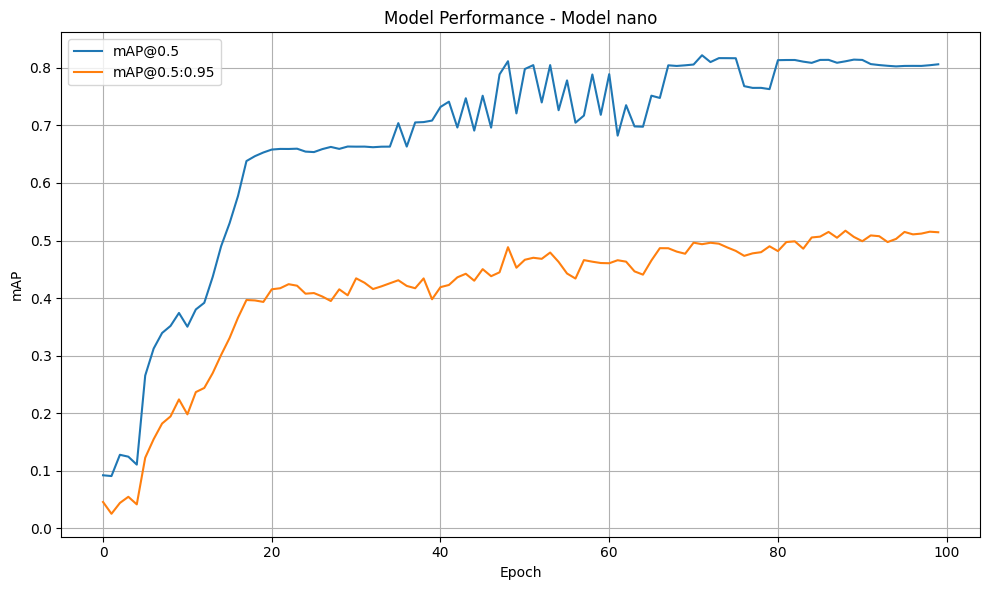

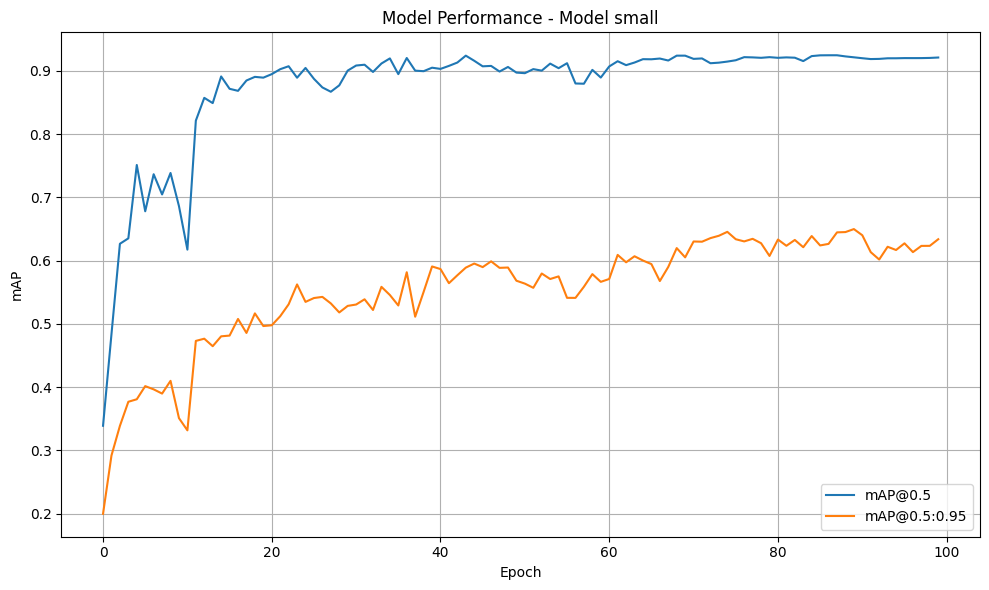

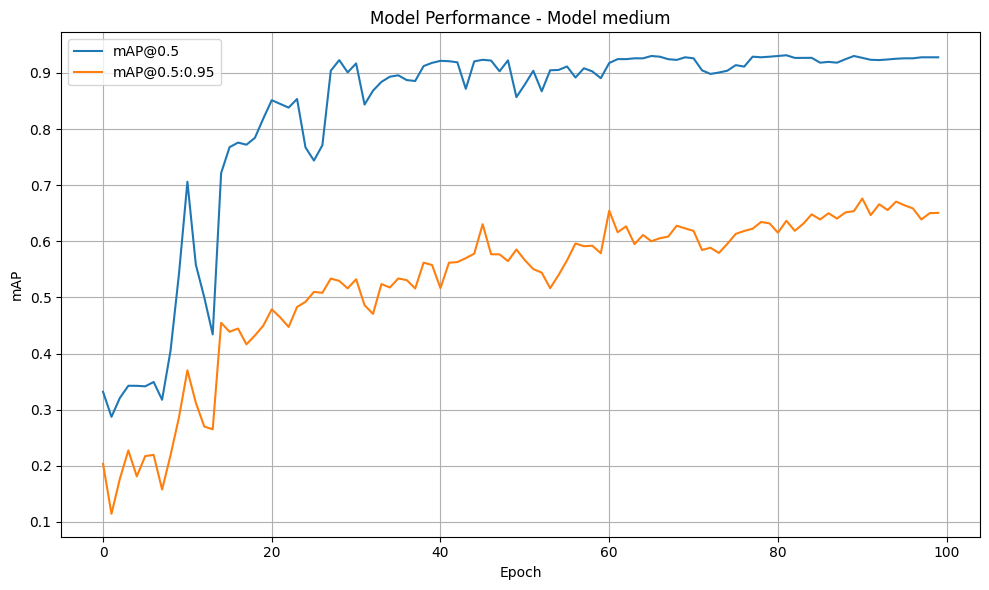

In [12]:
# Visualize mAP vs Epoch
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_internal_all_class}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_internal_all_class}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

#### Player and Ball Class

In [14]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = 16 # Jika ingin limitasi GPU menggunakan -1
device = [0]
data_path_internal_player_and_ball_class = "dataset/internal/player_and_ball_class"
project_base_internal_player_and_ball_class = "results/internal/player_and_ball_class"

In [ ]:
def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

In [15]:
# Training and Evaluating Using Test Set
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_internal_player_and_ball_class}/data.yaml",
        epochs=epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_internal_player_and_ball_class}/training",
        name=f"{size}",
        exist_ok=True,
        device=device
    )
    measure_and_save_time(start_time, f"{project_base_internal_player_and_ball_class}/training/summary/time/{size}-train-time.txt")

    csv_filename = f"{project_base_internal_player_and_ball_class}/training/summary/metrics/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_internal_player_and_ball_class}/data.yaml",
        imgsz=640,
        project=f"{project_base_internal_player_and_ball_class}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_internal_player_and_ball_class}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

train: Scanning /kaggle/working/dataset/internal/player_and_ball_class/train/labels... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 1358.18it/s]

train: New cache created: /kaggle/working/dataset/internal/player_and_ball_class/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 243.8±132.1 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 3262.53it/s]

val: New cache created: /kaggle/working/dataset/internal/player_and_ball_class/valid/labels.cache


Plotting labels to results/internal/player_and_ball_class/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/player_and_ball_class/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.97G      1.697      3.503      1.024        351        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all         10        141      0.013       0.18      0.103     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.99G      1.596      2.325     0.9519        256        640: 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         10        141    0.00576     0.0827     0.0285    0.00512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.01G      1.571      1.498     0.9427        344        640: 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         10        141    0.00791      0.113      0.049     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.02G      1.573      1.217     0.9601        303        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         10        141     0.0175      0.241      0.165     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.04G      1.531      1.063     0.9546        344        640: 100%|██████████| 10/10 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         10        141     0.0218      0.274       0.14     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.05G      1.467       1.02     0.9545        301        640: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         10        141     0.0315      0.398      0.335      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.07G      1.402     0.9631     0.9324        289        640: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all         10        141     0.0339       0.47      0.443      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.08G      1.452     0.9526     0.9278        285        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         10        141      0.992      0.246      0.462      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       3.1G      1.579       1.02     0.9615        334        640: 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         10        141          1      0.281      0.463      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.11G      1.511      0.973     0.9439        224        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all         10        141      0.987      0.434       0.48       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.13G      1.526     0.9794     0.9273        328        640: 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all         10        141      0.963      0.427      0.482      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.14G      1.423     0.9238      0.914        340        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         10        141      0.967      0.486       0.49      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.16G      1.432      0.928     0.9268        271        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all         10        141      0.969      0.459      0.487      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.17G      1.345      0.872     0.9149        265        640: 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         10        141      0.977      0.464      0.491      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.19G      1.367     0.8498     0.9094        307        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         10        141      0.963      0.474      0.488      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       3.2G      1.358     0.8617     0.9144        340        640: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         10        141      0.974      0.477      0.494      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.21G      1.355     0.8364     0.9196        237        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         10        141      0.977      0.489      0.496      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.23G      1.412      0.873     0.9219        376        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         10        141      0.989      0.491      0.496      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.25G      1.346     0.8447     0.8944        320        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        141      0.977      0.485      0.496       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.26G      1.288     0.8229     0.8939        262        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         10        141      0.967        0.5      0.492      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.28G       1.29     0.8096     0.8937        331        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        141      0.982      0.489      0.495      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.29G      1.226     0.7842     0.8988        284        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all         10        141      0.985      0.489      0.497      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       3.3G      1.211     0.7532     0.8961        274        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all         10        141      0.967      0.487      0.491      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.32G      1.218     0.7613      0.886        259        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.975      0.485      0.498      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.33G      1.339     0.8056     0.8981        303        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         10        141       0.98      0.492       0.56      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.35G      1.274     0.7741     0.8868        296        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all         10        141       0.95      0.474      0.552      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.36G       1.27     0.7787     0.9003        227        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         10        141      0.982      0.491       0.56      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.38G      1.233     0.7591     0.8904        288        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         10        141      0.987        0.5      0.507      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.39G      1.194       0.72     0.8886        336        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         10        141      0.985      0.498       0.59      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.41G      1.152       0.73     0.8849        368        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         10        141      0.996      0.496      0.591      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.42G      1.205     0.7288      0.889        294        640: 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         10        141      0.989      0.492      0.658      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.44G      1.214     0.7283     0.8862        316        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10        141      0.982      0.493      0.575      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.45G      1.141     0.6993     0.8743        382        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         10        141      0.985      0.498      0.699      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.47G      1.151     0.7035     0.8811        388        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all         10        141      0.983      0.485      0.634      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.48G      1.168     0.7188     0.8784        345        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]

                   all         10        141      0.848      0.582       0.69      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150       3.5G      1.144     0.6991     0.8722        282        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all         10        141      0.989      0.489      0.637      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.51G      1.124     0.6844     0.8735        295        640: 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.992      0.492      0.584      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.53G      1.119     0.6754     0.8646        298        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         10        141      0.872        0.6      0.717      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.54G      1.109     0.6704     0.8775        290        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]

                   all         10        141      0.876      0.595       0.64      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.56G      1.129      0.684     0.8763        255        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all         10        141      0.848      0.559      0.658      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.57G      1.138      0.671     0.8724        245        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all         10        141      0.832      0.684      0.718      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.59G       1.08     0.6411     0.8608        329        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         10        141      0.909      0.669      0.762      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       3.6G      1.062     0.6471     0.8661        281        640: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all         10        141       0.78      0.688       0.68      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.62G      1.029     0.6281     0.8627        279        640: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         10        141      0.916      0.688      0.771      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.63G      1.076      0.641     0.8594        262        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         10        141      0.915      0.687      0.781      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.65G      1.134     0.6429     0.8593        351        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         10        141      0.961       0.62       0.67      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.66G      1.045     0.6233     0.8632        274        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all         10        141      0.981      0.625      0.627      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.68G      1.034     0.6231     0.8603        327        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         10        141      0.962      0.678      0.687      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.69G      1.041     0.6144     0.8611        338        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all         10        141      0.944      0.688      0.687      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.71G      1.093     0.6277     0.8674        300        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all         10        141      0.967      0.688      0.688      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.72G      1.085     0.6273     0.8593        344        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all         10        141      0.965      0.736      0.801      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.73G      1.059      0.606     0.8593        284        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all         10        141      0.969      0.688      0.688      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.75G      1.089     0.6198      0.863        359        640: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

                   all         10        141      0.941      0.684      0.694      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.76G      1.105     0.6371     0.8721        390        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all         10        141      0.954      0.688      0.688      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.78G      1.029     0.6108     0.8612        239        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all         10        141      0.961       0.68       0.71      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.79G      1.092     0.6314     0.8589        344        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all         10        141      0.953      0.682       0.73      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.81G      1.109     0.6411     0.8565        234        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all         10        141      0.929      0.719      0.741      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.82G      1.116      0.642     0.8614        289        640: 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all         10        141      0.971      0.687      0.718      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.84G      1.051     0.6237     0.8562        294        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all         10        141      0.944      0.731      0.751      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.85G      1.015     0.6181     0.8552        387        640: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all         10        141      0.918      0.733      0.754      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.87G     0.9992     0.5988     0.8505        262        640: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         10        141        0.9      0.705      0.795      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.88G     0.9899     0.5826     0.8531        298        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all         10        141      0.964      0.684      0.776      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       3.9G      1.014     0.5972     0.8581        238        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        141       0.98      0.688      0.776      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      3.91G      1.029     0.6003      0.851        357        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all         10        141       0.96      0.677      0.838      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.93G     0.9679      0.591     0.8493        317        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all         10        141       0.97      0.686      0.783      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.94G     0.9843     0.5858     0.8493        318        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         10        141      0.976      0.688      0.771      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.96G      1.046     0.6113     0.8632        293        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         10        141       0.98      0.688       0.78      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.97G       1.01     0.6007     0.8543        257        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]

                   all         10        141      0.983      0.688      0.739      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.98G     0.9868     0.5825     0.8532        282        640: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         10        141      0.824      0.812      0.795      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150         4G      1.001     0.6021      0.856        339        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]

                   all         10        141      0.933      0.745      0.806      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.02G     0.9475     0.5691     0.8458        348        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all         10        141      0.947       0.74      0.819      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.03G     0.9781      0.574       0.85        258        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all         10        141      0.927      0.732      0.804      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.04G      1.004     0.5934     0.8536        351        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         10        141      0.932      0.731      0.809      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.06G     0.9699     0.5641     0.8546        285        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all         10        141      0.927      0.793       0.87       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.07G     0.9478     0.5522     0.8493        287        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]

                   all         10        141      0.972      0.684      0.851      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.09G     0.9726     0.5613     0.8481        327        640: 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         10        141       0.98      0.684      0.771      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       4.1G      1.001     0.5916     0.8487        283        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        141      0.861       0.75      0.857      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.12G     0.9792     0.5728      0.847        234        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all         10        141      0.779      0.812      0.794      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.13G     0.9699     0.5556     0.8472        291        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        141      0.845      0.816      0.866      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.15G     0.9605     0.5559      0.847        283        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        141      0.967      0.747      0.794       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.16G     0.9902     0.5655     0.8427        281        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all         10        141      0.902      0.783      0.878      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.18G      0.951     0.5563     0.8452        356        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all         10        141      0.901      0.865      0.878      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.19G     0.9942     0.5799     0.8531        259        640: 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         10        141      0.906      0.815      0.878      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.21G     0.9483     0.5539      0.841        258        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all         10        141      0.937      0.771       0.82      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.22G     0.9536     0.5543      0.841        302        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all         10        141      0.964      0.749      0.808      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.24G     0.9634      0.566     0.8385        425        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all         10        141      0.965      0.745      0.805      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.25G     0.9313     0.5604     0.8367        282        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all         10        141      0.967      0.743      0.797       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.27G     0.9045     0.5417     0.8365        259        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         10        141      0.962      0.742      0.807      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.28G     0.9075     0.5324     0.8334        385        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         10        141      0.966      0.743      0.808      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       4.3G     0.8835     0.5265      0.838        293        640: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all         10        141      0.911      0.796      0.877      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.31G     0.8762     0.5156     0.8373        321        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all         10        141      0.922      0.788      0.877      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.33G      0.895     0.5358     0.8391        321        640: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.87it/s]

                   all         10        141      0.968      0.742      0.861      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.34G     0.8962     0.5326     0.8373        321        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         10        141      0.932       0.75      0.879      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.36G     0.9032     0.5174      0.836        256        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         10        141       0.96      0.727      0.881      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.37G     0.8647     0.5147     0.8405        376        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all         10        141      0.919      0.742       0.88      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.39G     0.8889     0.5195     0.8399        241        640: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         10        141      0.925      0.744      0.871      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       4.4G     0.9068     0.5196     0.8369        311        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all         10        141      0.979      0.688      0.853      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.42G     0.9216      0.522     0.8425        325        640: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all         10        141      0.911      0.749      0.871      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.43G     0.8817     0.5155     0.8391        308        640: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all         10        141      0.902       0.76      0.881      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.45G     0.8763     0.5254     0.8402        341        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all         10        141      0.912      0.789       0.88      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.46G     0.8725     0.5098     0.8349        293        640: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         10        141      0.983      0.688      0.801      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.47G     0.8367      0.501     0.8322        327        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all         10        141      0.985      0.688      0.801      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.49G      0.878     0.5027     0.8336        335        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all         10        141      0.901      0.831      0.879      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150       4.5G     0.8586     0.5021     0.8333        270        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all         10        141      0.906      0.842      0.879      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.52G     0.8666     0.5045     0.8333        386        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         10        141       0.92      0.837      0.878       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.53G     0.8732     0.5062     0.8371        335        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all         10        141      0.955      0.796      0.854      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.55G     0.8472     0.5002     0.8295        332        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all         10        141      0.959      0.788       0.87      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.56G     0.8609     0.5083      0.839        244        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         10        141      0.958      0.785       0.87      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.58G     0.8429     0.5024     0.8343        274        640: 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         10        141      0.962       0.75      0.843      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.59G     0.8622     0.5084     0.8329        318        640: 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all         10        141      0.948      0.773      0.855      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.61G     0.8683     0.5009     0.8343        280        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         10        141      0.932      0.776      0.861      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.62G     0.8642     0.4976     0.8356        397        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all         10        141      0.911       0.75      0.795      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.64G     0.8533     0.4992     0.8276        320        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all         10        141      0.957      0.742      0.856      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.65G     0.8642     0.5153     0.8356        349        640: 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         10        141      0.973      0.748      0.794      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.67G     0.8484     0.4991     0.8295        204        640: 100%|██████████| 10/10 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all         10        141      0.965      0.793      0.841       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.68G     0.8427     0.4952     0.8301        369        640: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all         10        141      0.967      0.684      0.712      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       4.7G     0.8888     0.5148     0.8384        330        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all         10        141      0.965      0.739      0.783      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.71G     0.8271     0.4846     0.8234        437        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         10        141      0.949      0.733      0.787      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.73G     0.8662     0.5019     0.8303        343        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]

                   all         10        141       0.82      0.678      0.687      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.74G     0.8378      0.485      0.835        318        640: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all         10        141      0.941      0.799      0.853       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.76G     0.8258     0.4822     0.8309        217        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        141      0.952      0.796      0.848      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.77G     0.8328     0.4705       0.83        363        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all         10        141      0.974       0.75      0.832      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.79G     0.8217     0.4768     0.8297        439        640: 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all         10        141      0.983       0.75      0.845      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       4.8G     0.8282      0.491     0.8343        393        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all         10        141      0.984       0.75      0.862      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.81G     0.8134     0.4795     0.8307        247        640: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         10        141      0.982       0.75      0.862      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.83G     0.8314     0.4803     0.8298        316        640: 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all         10        141      0.974       0.75      0.849      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.84G     0.8154     0.4755      0.826        261        640: 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]

                   all         10        141      0.982      0.748      0.851      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.86G      0.811     0.4699     0.8239        324        640: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all         10        141      0.979      0.747      0.847      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.87G     0.8251     0.4792     0.8281        355        640: 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.974       0.75      0.853       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.89G     0.8057     0.4775     0.8301        287        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]

                   all         10        141      0.969       0.75      0.841       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       4.9G     0.7844     0.4659     0.8273        269        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]

                   all         10        141      0.969       0.75      0.795      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.92G     0.7876     0.4651     0.8268        293        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all         10        141      0.971       0.75      0.833      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.93G     0.7932     0.4644     0.8237        309        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all         10        141      0.974       0.75      0.827      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.95G     0.7919     0.4617     0.8251        203        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        141      0.964       0.75      0.838      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.96G     0.8126     0.4682     0.8286        268        640: 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all         10        141      0.969       0.75      0.839      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.98G     0.7767     0.4608      0.825        271        640: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all         10        141       0.96       0.75      0.841      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.99G     0.8208     0.4767       0.83        356        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         10        141      0.958       0.75       0.85       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.01G     0.7796     0.4643     0.8176        342        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]

                   all         10        141      0.967      0.745      0.855      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.02G     0.7966     0.4548     0.8155        302        640: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         10        141      0.956      0.737      0.854      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.04G     0.7905     0.4657     0.8268        296        640: 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all         10        141      0.977       0.75      0.852      0.453


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.05G     0.7373     0.4595     0.8229        224        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all         10        141      0.979      0.749      0.791       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.07G     0.7475     0.4536      0.821        203        640: 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         10        141      0.975       0.75      0.843      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.08G     0.7353      0.448     0.8205        215        640: 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all         10        141      0.961       0.75       0.84      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       5.1G     0.7306     0.4437     0.8134        195        640: 100%|██████████| 10/10 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         10        141      0.952       0.75      0.833      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.11G     0.7296     0.4426     0.8182        207        640: 100%|██████████| 10/10 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all         10        141      0.958       0.75      0.831      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.12G     0.7386     0.4513     0.8222        220        640: 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all         10        141      0.953       0.75      0.819      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.14G     0.7072     0.4356     0.8142        200        640: 100%|██████████| 10/10 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all         10        141      0.945       0.75       0.78      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.16G     0.7146     0.4345     0.8194        218        640: 100%|██████████| 10/10 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all         10        141      0.946       0.75      0.819      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.17G     0.7124     0.4314     0.8152        213        640: 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         10        141      0.954       0.75      0.835      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.19G      0.717     0.4417     0.8159        213        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]

                   all         10        141      0.958       0.75      0.835      0.455



150 epochs completed in 0.089 hours.
Optimizer stripped from results/internal/player_and_ball_class/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/internal/player_and_ball_class/training/nano/weights/best.pt, 5.5MB

Validating results/internal/player_and_ball_class/training/nano/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.982       0.75      0.862      0.508
                  ball          8          8      0.973        0.5      0.729      0.306
                player         10        133      0.991          1      0.994       0.71
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/internal/player_and_ball_class/training/nano
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1077.8±358.1 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/test/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1333.85it/s]

val: New cache created: /kaggle/working/dataset/internal/player_and_ball_class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.972      0.646      0.744      0.465
                  ball         10         10      0.969        0.3      0.494      0.185
                player         10        131      0.975      0.992      0.994      0.744
Speed: 0.6ms preprocess, 7.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to results/internal/player_and_ball_class/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, eras

train: Scanning /kaggle/working/dataset/internal/player_and_ball_class/train/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 227.2±126.0 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/internal/player_and_ball_class/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/player_and_ball_class/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.48G      1.627      3.116      1.028        351        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         10        141      0.961      0.447      0.478      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.48G      1.457      1.104     0.9339        256        640: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         10        141      0.928      0.436      0.464      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.48G      1.385     0.9496     0.9212        344        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.932      0.459      0.476      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.48G       1.36     0.8839     0.9235        303        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10        141      0.958      0.466      0.487        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.48G      1.321     0.8093     0.9145        344        640: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         10        141      0.557      0.517      0.521      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       4.6G      1.304     0.7799      0.915        301        640: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         10        141      0.675      0.493      0.607      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       4.6G      1.358     0.7344      0.907        289        640: 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         10        141      0.837      0.607      0.623      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       4.6G      1.354      0.737     0.8999        285        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         10        141       0.91      0.611      0.622      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       4.6G      1.313     0.7211     0.9114        334        640: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         10        141      0.693      0.616      0.635      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       4.6G      1.295     0.6968      0.917        224        640: 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        141      0.786      0.539      0.588      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       4.6G      1.274     0.7069     0.8947        328        640: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all         10        141      0.882      0.533      0.616       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       4.6G      1.246     0.6939     0.8912        340        640: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         10        141      0.938      0.614      0.732      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       4.6G      1.276     0.7006     0.9077        271        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         10        141      0.958      0.666      0.811      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       4.6G      1.222     0.6556     0.8973        265        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all         10        141      0.777       0.72      0.752      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       4.6G      1.206     0.6408     0.8875        307        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all         10        141      0.586      0.552      0.551      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       4.6G      1.182     0.6258     0.8912        340        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all         10        141       0.71      0.529      0.598      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       4.6G      1.239     0.6333     0.8999        237        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.957      0.605      0.686      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       4.6G      1.174     0.6352     0.8849        376        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10        141      0.825       0.71       0.84      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150       4.6G      1.152     0.6246     0.8628        320        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141       0.86       0.77      0.831       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       4.6G      1.134     0.6099     0.8679        262        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         10        141      0.856      0.809      0.839      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       4.6G      1.144      0.608     0.8743        331        640: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10        141      0.958      0.726      0.781      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       4.6G      1.081      0.588     0.8733        284        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         10        141      0.843       0.75      0.811      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       4.6G      1.073     0.5718     0.8725        274        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        141      0.958      0.746      0.773      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       4.6G      1.121     0.5795     0.8717        259        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        141       0.86       0.75      0.764      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       4.6G      1.113     0.5885     0.8681        303        640: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10        141       0.94      0.739      0.808      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       4.6G      1.081     0.5727     0.8629        296        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         10        141      0.912      0.734      0.789      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       4.6G       1.05      0.556     0.8731        227        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         10        141       0.84      0.729      0.776      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       4.6G      1.085     0.5837     0.8695        288        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         10        141      0.894      0.652      0.831      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       4.6G      1.065     0.5702     0.8648        336        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10        141      0.892      0.625      0.772      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       4.6G      1.047     0.5848     0.8702        368        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        141      0.603      0.625      0.574      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150       4.6G      1.066     0.5598     0.8697        294        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         10        141      0.774      0.812      0.765      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       4.6G      1.048      0.544     0.8609        316        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         10        141      0.788       0.75      0.764      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       4.6G      1.038     0.5386     0.8594        382        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10        141      0.953      0.745      0.807      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       4.6G      1.071     0.5498     0.8652        388        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all         10        141      0.958      0.614      0.687      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       4.6G      1.037     0.5712     0.8601        345        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10        141      0.978      0.682      0.784      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150       4.6G       0.99     0.5415     0.8516        282        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         10        141       0.81      0.875      0.844      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       4.6G      1.018     0.5379     0.8589        295        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all         10        141      0.911      0.812      0.837      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       4.6G     0.9985     0.5409     0.8533        298        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         10        141      0.969      0.686      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       4.6G     0.9943     0.5287      0.865        290        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10        141      0.868       0.87      0.862      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       4.6G     0.9917     0.5274     0.8534        255        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         10        141      0.965      0.853      0.876      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       4.6G     0.9736      0.515     0.8482        245        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         10        141      0.844      0.875      0.859      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       4.6G     0.9557     0.5132     0.8444        329        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        141      0.789      0.875      0.866      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       4.6G     0.9501     0.5154     0.8489        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all         10        141      0.863      0.871      0.851      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       4.6G     0.9442     0.5056     0.8472        279        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         10        141      0.971      0.746      0.851      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       4.6G     0.9708     0.5131     0.8411        262        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        141      0.664      0.812      0.753      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       4.6G     0.9709     0.5135     0.8399        351        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        141      0.933      0.726      0.875      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       4.6G     0.9584     0.5098     0.8502        274        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all         10        141      0.949      0.786      0.873      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       4.6G     0.9306      0.497      0.849        327        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        141      0.937      0.812      0.858      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       4.6G     0.9549     0.5023     0.8464        338        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141      0.908      0.874      0.873      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       4.6G     0.9485     0.5164      0.849        300        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141      0.953      0.801      0.868      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       4.6G     0.9476     0.5026     0.8435        344        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10        141      0.939      0.812      0.868      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       4.6G     0.9325     0.4881     0.8451        284        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all         10        141       0.99      0.809      0.862      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       4.6G     0.9535     0.5012     0.8543        359        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all         10        141      0.974      0.812      0.864      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       4.6G     0.9278     0.5011     0.8495        390        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        141      0.967      0.812      0.861      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       4.6G     0.9265     0.4993     0.8468        239        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all         10        141      0.969      0.812      0.875      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       4.6G     0.9327     0.4926     0.8456        344        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all         10        141      0.869      0.852      0.864      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       4.6G     0.9456     0.5062     0.8429        234        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         10        141      0.954      0.812      0.859      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       4.6G     0.8966     0.4781     0.8404        289        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        141      0.903      0.938      0.927      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       4.6G     0.8859     0.4808     0.8366        294        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         10        141      0.904      0.812      0.819      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       4.6G     0.8968     0.4865     0.8392        387        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         10        141      0.891      0.809       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       4.6G     0.8938     0.4798     0.8362        262        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         10        141      0.888      0.812      0.832      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       4.6G     0.8662     0.4794     0.8383        298        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10        141      0.967      0.875      0.878      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       4.6G     0.9116     0.4937     0.8417        238        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141      0.923      0.875       0.88       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       4.6G     0.8963     0.4863     0.8373        357        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         10        141      0.934      0.875      0.889      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       4.6G     0.8728     0.4854     0.8387        317        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         10        141      0.962       0.81      0.884      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       4.6G     0.9021     0.4837      0.839        318        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        141      0.978      0.864      0.884      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       4.6G     0.8873     0.4807     0.8421        293        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         10        141      0.975      0.865      0.883      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       4.6G     0.8745     0.4852     0.8358        257        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10        141      0.905      0.844      0.866      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       4.6G     0.8607     0.4722     0.8367        282        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         10        141      0.883      0.875      0.872      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       4.6G     0.8989     0.4984     0.8396        339        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         10        141      0.963      0.862       0.88      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150       4.6G     0.8627     0.4619     0.8346        348        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.895      0.795      0.828      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       4.6G     0.9132     0.4822     0.8343        258        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         10        141      0.916       0.75       0.85      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       4.6G     0.9599     0.5015     0.8429        351        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        141      0.795      0.812      0.846       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       4.6G     0.8947     0.4751     0.8419        285        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         10        141      0.933      0.812      0.861      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       4.6G     0.8432     0.4516     0.8348        287        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all         10        141      0.952      0.812      0.869      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       4.6G     0.8345     0.4515     0.8303        327        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        141       0.86      0.812       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       4.6G     0.8378     0.4582     0.8318        283        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all         10        141      0.962       0.81      0.879        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       4.6G     0.8029     0.4363     0.8276        234        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        141       0.97       0.87      0.878      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       4.6G     0.8286     0.4357     0.8303        291        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.951      0.875      0.881      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       4.6G     0.8286     0.4438     0.8281        283        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         10        141      0.956      0.875      0.883      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150       4.6G     0.8466     0.4583     0.8261        281        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.956      0.875      0.884      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       4.6G     0.8421     0.4499     0.8297        356        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        141      0.827      0.875       0.84      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       4.6G      0.892     0.4769     0.8397        259        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         10        141      0.856       0.81      0.858      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       4.6G     0.8561     0.4543     0.8314        258        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10        141      0.978      0.685       0.83      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       4.6G     0.8066     0.4363      0.827        302        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         10        141      0.784      0.862       0.84      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       4.6G     0.8131      0.451     0.8253        425        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         10        141      0.902      0.797       0.84      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       4.6G     0.7979     0.4418     0.8237        282        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all         10        141      0.906      0.875      0.871      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150       4.6G     0.7896     0.4359     0.8243        259        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        141      0.977      0.855      0.884      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       4.6G     0.8249     0.4352     0.8258        385        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         10        141      0.982      0.812      0.875      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       4.6G     0.7814     0.4276     0.8272        293        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.982      0.866      0.884      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150       4.6G     0.7505     0.4173     0.8231        321        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

                   all         10        141       0.99      0.812      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       4.6G     0.7448     0.4252      0.824        321        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10        141      0.889      0.812      0.852      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       4.6G     0.7622     0.4306     0.8231        321        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.979      0.812      0.878       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       4.6G     0.7679     0.4203     0.8217        256        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         10        141      0.977      0.812      0.877      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       4.6G     0.7623     0.4207     0.8285        376        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         10        141      0.983      0.812      0.877      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       4.6G     0.7588     0.4197     0.8252        241        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         10        141      0.906      0.811      0.852       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       4.6G     0.7649     0.4119     0.8201        311        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.847      0.812      0.847      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       4.6G     0.7767     0.4161     0.8246        325        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        141      0.988       0.75      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       4.6G     0.7503     0.4148     0.8214        308        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all         10        141      0.941      0.794      0.875      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       4.6G     0.7478     0.4179     0.8237        341        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10        141      0.847       0.87      0.863      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       4.6G     0.7459      0.409     0.8194        293        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        141      0.854      0.812      0.853      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       4.6G     0.7287     0.4114     0.8196        327        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        141      0.848      0.856      0.852      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       4.6G     0.7507     0.4076     0.8183        335        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all         10        141      0.912      0.809       0.84      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150       4.6G     0.7215      0.398     0.8194        270        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        141      0.992      0.812      0.864      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       4.6G     0.7524     0.4143     0.8203        386        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all         10        141      0.992      0.812      0.861      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       4.6G      0.739     0.4123     0.8208        335        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.904      0.812       0.84      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       4.6G     0.7273     0.4095     0.8142        332        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         10        141      0.979      0.812      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       4.6G      0.735     0.4144     0.8259        244        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10        141      0.994      0.803      0.875      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       4.6G     0.7053     0.3988     0.8197        274        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         10        141      0.989      0.806      0.874      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       4.6G     0.7129     0.4015     0.8172        318        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         10        141      0.984      0.865       0.88      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       4.6G     0.7175     0.4017     0.8175        280        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         10        141      0.993      0.869       0.88      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       4.6G      0.719      0.397     0.8215        397        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        141      0.996      0.867      0.882      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150       4.6G     0.7064     0.3915     0.8112        320        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10        141      0.984      0.865      0.882      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       4.6G     0.7127      0.408     0.8178        349        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141      0.898      0.875      0.872      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       4.6G     0.7164     0.4077     0.8151        204        640: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         10        141      0.901      0.809      0.874      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       4.6G      0.722     0.4008      0.817        369        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        141      0.969      0.807      0.878      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       4.6G     0.7507     0.4201     0.8245        330        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         10        141      0.981      0.811       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       4.6G     0.6755     0.3859     0.8075        437        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all         10        141      0.985      0.812       0.87      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150       4.6G     0.6983     0.3947      0.813        343        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         10        141      0.983      0.812      0.875      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150       4.6G     0.6827      0.387     0.8191        318        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all         10        141      0.961      0.812      0.869      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150       4.6G     0.6969     0.3859     0.8152        217        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.968      0.812       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       4.6G     0.7088     0.3903     0.8147        363        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         10        141      0.971      0.812      0.869      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       4.6G     0.6977     0.3874     0.8147        439        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all         10        141      0.968      0.812      0.876      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       4.6G     0.7122     0.3944     0.8172        393        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10        141      0.953      0.809      0.862      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       4.6G      0.687     0.3891     0.8135        247        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141      0.954      0.805      0.867      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       4.6G     0.6977     0.3871      0.812        316        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.818      0.875      0.855      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       4.6G     0.6832     0.3796       0.81        261        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        141      0.826       0.87      0.856      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       4.6G     0.6818     0.3776     0.8086        324        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        141      0.811      0.849      0.838      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150       4.6G     0.6633     0.3704       0.81        355        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all         10        141      0.802      0.855       0.84      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       4.6G     0.6514      0.374     0.8128        287        640: 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10        141      0.799      0.861      0.837      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       4.6G     0.6518     0.3656     0.8127        269        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         10        141      0.804       0.86       0.84      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       4.6G     0.6522     0.3681     0.8111        293        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         10        141      0.809      0.865      0.859      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150       4.6G     0.6533     0.3673     0.8075        309        640: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         10        141       0.85      0.809       0.86      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       4.6G     0.6513     0.3673       0.81        203        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        141      0.978      0.796      0.875       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150       4.6G     0.6529     0.3662     0.8104        268        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        141      0.985      0.812      0.874      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       4.6G      0.637     0.3664     0.8088        271        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10        141      0.992      0.812      0.869      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150       4.6G     0.6743     0.3789     0.8117        356        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         10        141      0.986      0.805      0.883      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       4.6G     0.6336     0.3684     0.8027        342        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10        141      0.996      0.773       0.88      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       4.6G     0.6506     0.3608     0.8019        302        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         10        141      0.878      0.858       0.88      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       4.6G     0.6259     0.3625     0.8092        296        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         10        141          1      0.776      0.872      0.624


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150       4.6G     0.6063     0.3572     0.8068        224        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10        141          1      0.778      0.871      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       4.6G     0.6025     0.3455     0.8023        203        640: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all         10        141          1      0.791       0.87      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150       4.6G     0.5909      0.343     0.8044        215        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         10        141      0.993      0.793       0.87      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       4.6G     0.5857     0.3407     0.7956        195        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        141      0.991      0.795      0.869      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       4.6G     0.5804     0.3421     0.8012        207        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        141      0.992       0.79      0.869      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       4.6G     0.5956     0.3521     0.8064        220        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         10        141      0.997      0.783      0.868      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150       4.6G     0.5609     0.3337     0.7978        200        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        141      0.998       0.78      0.862      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       4.6G     0.5711     0.3307      0.802        218        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        141      0.997      0.773      0.867      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       4.6G     0.5645      0.328     0.7965        213        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        141      0.996      0.774      0.868       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       4.6G     0.5742     0.3367     0.8006        213        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        141      0.992      0.777      0.868      0.626



150 epochs completed in 0.147 hours.
Optimizer stripped from results/internal/player_and_ball_class/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/internal/player_and_ball_class/training/small/weights/best.pt, 19.2MB

Validating results/internal/player_and_ball_class/training/small/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.996      0.774      0.868       0.64
                  ball          8          8          1      0.601      0.744      0.517
                player         10        133      0.992      0.947      0.992      0.763
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/internal/player_and_ball_class/training/small
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 783.2±232.7 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.796       0.85      0.832      0.521
                  ball         10         10      0.829        0.7      0.678      0.258
                player         10        131      0.763          1      0.986      0.783
Speed: 0.8ms preprocess, 10.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to results/internal/player_and_ball_class/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/internal/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, 

train: Scanning /kaggle/working/dataset/internal/player_and_ball_class/train/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 291.0±121.5 MB/s, size: 45.8 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/internal/player_and_ball_class/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/internal/player_and_ball_class/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.19G      1.672      3.541     0.9747        351        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        141      0.832      0.451      0.427      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.06G      1.445      0.984     0.9467        256        640: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        141      0.877      0.426      0.428      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.16G      1.317     0.8172     0.9253        344        640: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        141      0.602      0.617      0.549       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.18G      1.351     0.7694     0.9321        303        640: 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        141      0.704      0.514      0.544      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.17G      1.322     0.7762     0.9234        344        640: 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10        141      0.401      0.584      0.381      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.19G      1.288     0.7441     0.9216        301        640: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         10        141      0.326      0.254      0.267      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.12G      1.335     0.8368     0.9333        289        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         10        141      0.445      0.477      0.344      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.17G      1.355     0.8778     0.9195        285        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10        141      0.858      0.255      0.269      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.18G      1.421     0.7443     0.9761        334        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10        141      0.316      0.173      0.212      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.17G      1.333      0.737     0.9378        224        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10        141       0.34      0.203      0.213       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.13G      1.254      0.711     0.9042        328        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10        141        0.4      0.233      0.245      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.19G      1.279     0.6705      0.907        340        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10        141      0.758       0.31       0.35      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.12G      1.336     0.6997     0.9304        271        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         10        141      0.738      0.359      0.442       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.15G      1.201     0.6724     0.9032        265        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10        141        0.9       0.58      0.669      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.14G       1.24     0.6466     0.9058        307        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.813      0.367      0.372      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.16G      1.251     0.6449     0.9205        340        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10        141      0.397      0.259      0.262      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.15G      1.299     0.6588     0.9345        237        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.907      0.407       0.43      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.17G      1.233     0.6458     0.9176        376        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         10        141      0.648      0.313      0.327      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.17G      1.226     0.6507     0.8963        320        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.904       0.44      0.541      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.16G      1.212     0.6448      0.898        262        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.751      0.635      0.631      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.14G      1.172     0.6142     0.8955        331        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.667      0.605      0.562      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.15G      1.164     0.6115     0.8987        284        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10        141      0.799      0.688      0.641      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.13G      1.122     0.5739     0.8914        274        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.966      0.743       0.75      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.15G       1.14     0.5835     0.8862        259        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.964      0.738      0.748      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.13G      1.148     0.5991     0.8816        303        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.951      0.671      0.707      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       8.2G      1.117     0.5707      0.875        296        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.858      0.667      0.713      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.14G       1.12     0.5748     0.8877        227        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         10        141      0.699      0.812      0.682      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.16G      1.094     0.5795     0.8854        288        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.782      0.809      0.746      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.13G      1.122     0.5614     0.8836        336        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.973      0.688      0.768      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.15G      1.171     0.5926     0.8907        368        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141       0.67      0.688      0.666      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.09G      1.137     0.5531     0.8833        294        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141        0.9      0.684      0.732      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.19G       1.14     0.5604     0.8822        316        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.788      0.746      0.762      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.12G      1.053      0.548     0.8691        382        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.778       0.75      0.749      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.14G       1.03     0.5353     0.8718        388        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.958      0.621      0.774      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.13G      1.052     0.5563     0.8702        345        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.971      0.733      0.809      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.17G      1.001     0.5416     0.8659        282        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.866      0.812      0.816      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.07G     0.9853     0.5218     0.8649        295        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.959      0.797      0.824      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.14G     0.9874     0.5233     0.8576        298        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.915      0.688      0.767      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       8.1G     0.9858     0.5124     0.8663        290        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141       0.77      0.688       0.72      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.16G      0.975      0.516      0.864        255        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.669      0.688      0.633        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.15G      1.031     0.5301     0.8595        245        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         10        141      0.874      0.684      0.748      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.14G      1.006     0.5185     0.8594        329        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141      0.941      0.746      0.796      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       8.1G     0.9863      0.521     0.8616        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.867      0.688      0.782       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.25G     0.9335     0.4975     0.8545        279        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.787      0.812      0.754      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.13G      0.946     0.5014     0.8478        262        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10        141      0.982      0.798      0.829      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.15G     0.9765     0.5026     0.8454        351        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.954      0.703      0.823      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.12G      1.016      0.523     0.8682        274        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.784      0.625      0.666      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.17G     0.9422     0.5014     0.8579        327        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.782      0.742      0.672      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       8.1G     0.9622     0.4978     0.8603        338        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.887      0.749      0.736      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.19G     0.9631      0.503     0.8585        300        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         10        141      0.701      0.688      0.638      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.13G     0.9567     0.5039      0.851        344        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.793       0.75       0.78       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.17G     0.9202     0.4784     0.8488        284        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.791       0.75      0.729      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.11G     0.9495     0.4954     0.8528        359        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.804      0.744      0.667      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.15G     0.9615     0.5032     0.8542        390        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.791      0.746      0.689      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.12G     0.9418     0.4913      0.849        239        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.737       0.75      0.682       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.17G      0.952     0.4827     0.8475        344        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.984      0.685      0.695      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.14G     0.9605     0.4918      0.849        234        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.983      0.688      0.739      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.16G     0.9159      0.474     0.8459        289        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.913      0.875      0.868      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.09G     0.8779     0.4627     0.8403        294        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.966      0.812      0.827      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.14G     0.8872     0.4708     0.8456        387        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.957      0.688      0.744      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.11G     0.8757     0.4699     0.8408        262        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         10        141      0.901      0.812       0.81      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.21G     0.8486     0.4619     0.8439        298        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141       0.98      0.808      0.824      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.08G     0.8776     0.4754     0.8441        238        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.799      0.812      0.777      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.21G     0.8697     0.4745     0.8402        357        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.873       0.75      0.772      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.15G     0.8578     0.4675     0.8373        317        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.842       0.75      0.786      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.15G     0.8613     0.4524     0.8351        318        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.993      0.809      0.864       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.13G     0.8786     0.4664     0.8479        293        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.814      0.875      0.855      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.12G     0.8792     0.4793      0.845        257        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         10        141      0.862      0.787      0.823      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.13G     0.8586     0.4692     0.8423        282        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.841      0.785      0.844      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       8.2G     0.8691     0.4715     0.8407        339        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.817       0.75      0.792      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.14G     0.8262     0.4483     0.8332        348        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.837      0.812      0.815      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.13G     0.8408     0.4556     0.8328        258        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141       0.82      0.875      0.805      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.11G     0.8506     0.4588     0.8371        351        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.893       0.75      0.798      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.21G     0.8066     0.4384     0.8385        285        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.844      0.854      0.819      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.12G     0.7758     0.4146     0.8347        287        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.906      0.798      0.833      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.19G     0.7836     0.4221     0.8291        327        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.743      0.812      0.769      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.13G     0.8202     0.4484     0.8343        283        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.805      0.746       0.75       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.14G     0.7848     0.4292     0.8271        234        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141       0.77      0.812      0.762      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       8.1G     0.7904     0.4202     0.8317        291        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.889       0.75       0.77      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.13G      0.803     0.4308     0.8336        283        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.873      0.747      0.782      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.15G     0.8225     0.4415     0.8267        281        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.811       0.75      0.773      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.14G     0.8242     0.4363     0.8282        356        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10        141      0.814      0.811      0.783       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.14G     0.8016     0.4401     0.8367        259        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.798      0.812      0.789      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       8.2G     0.7872     0.4253     0.8312        258        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141       0.74       0.75      0.714      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.13G     0.7829      0.418     0.8313        302        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.974      0.854      0.883      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.17G     0.8036     0.4386     0.8291        425        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.781      0.812      0.787      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.06G     0.7711     0.4322      0.826        282        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.857      0.875      0.867      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.14G     0.7664     0.4237     0.8259        259        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.819      0.812      0.796      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.11G     0.7738     0.4119     0.8236        385        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.836      0.812      0.794       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.18G      0.751     0.4083     0.8267        293        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         10        141       0.85      0.874      0.849      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.15G     0.7319     0.3948     0.8238        321        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         10        141      0.884      0.875      0.857      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.17G     0.7245     0.4092     0.8252        321        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.837      0.776      0.796      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.12G      0.756     0.4185      0.825        321        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        141      0.764      0.812       0.78      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.21G     0.7699     0.4117     0.8272        256        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         10        141      0.813      0.837      0.817      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.08G     0.7467     0.4079     0.8306        376        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         10        141      0.842      0.847      0.861      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.18G      0.746     0.4052     0.8282        241        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.859      0.861      0.859      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.12G     0.7449     0.3937     0.8216        311        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.913      0.863      0.881      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.18G     0.7601     0.4038     0.8251        325        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141       0.91      0.865      0.876      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.11G     0.7351     0.3942      0.825        308        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141       0.91      0.868      0.875      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.17G      0.731     0.3999     0.8259        341        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         10        141      0.967      0.812      0.871      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.11G     0.7366     0.3962     0.8249        293        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141       0.95      0.875      0.884      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.13G     0.7165     0.3938     0.8218        327        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10        141      0.972      0.875      0.881       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.12G     0.7155     0.3889     0.8181        335        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         10        141      0.978      0.875      0.884      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.15G     0.7026     0.3825      0.822        270        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141       0.89      0.812      0.842      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.13G     0.7059     0.3842       0.82        386        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.971      0.875      0.896       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.12G     0.6933     0.3788     0.8219        335        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.985      0.875       0.89      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.14G     0.6902     0.3721     0.8159        332        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.976      0.812      0.877      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.13G     0.6966      0.374     0.8243        244        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.957      0.812      0.877      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.12G     0.6841     0.3736     0.8225        274        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         10        141      0.982      0.874      0.887      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.11G     0.6816     0.3755     0.8179        318        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.904      0.875      0.881      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.14G     0.6898     0.3777     0.8172        280        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.981      0.812      0.834      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.15G     0.7074     0.3782     0.8237        397        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.989      0.812      0.831      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.15G     0.6808     0.3716     0.8103        320        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141       0.99       0.75      0.824      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.14G     0.6808     0.3868     0.8192        349        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.819      0.812      0.804      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.13G     0.6594     0.3713     0.8148        204        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.902        0.8      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.13G     0.6603     0.3636     0.8168        369        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.893      0.875      0.866      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.12G     0.6937     0.3845     0.8219        330        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10        141      0.904      0.875       0.86      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       8.2G       0.65     0.3629     0.8066        437        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         10        141      0.862      0.875      0.853      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.11G     0.6811     0.3737     0.8134        343        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         10        141      0.817      0.875      0.841      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.14G     0.6545     0.3568     0.8166        318        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.916      0.865      0.854      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.12G     0.6405     0.3588     0.8115        217        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10        141      0.833      0.875      0.843      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.17G      0.647     0.3542     0.8133        363        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.898      0.875      0.866      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.12G     0.6378     0.3518      0.814        439        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10        141      0.912      0.873      0.863      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.15G     0.6526     0.3656     0.8183        393        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         10        141      0.913      0.875      0.861      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.12G     0.6372     0.3591     0.8132        247        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10        141      0.911      0.828      0.877       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.15G      0.629     0.3494     0.8091        316        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.858      0.875      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.11G      0.639     0.3547     0.8074        261        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.857      0.875      0.864      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       8.2G     0.6379      0.347     0.8098        324        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.973      0.812      0.876      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.08G     0.6356     0.3526     0.8096        355        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10        141      0.903      0.841      0.884      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.17G     0.6209     0.3486     0.8125        287        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.899      0.875      0.871      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.14G     0.6016     0.3305     0.8094        269        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141       0.91      0.875       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.12G     0.6086     0.3421     0.8097        293        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         10        141      0.921      0.867       0.88      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.16G     0.6104     0.3364     0.8075        309        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         10        141      0.976      0.875       0.89       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.18G     0.5937     0.3307     0.8072        203        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.988      0.875      0.891      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.13G     0.5955     0.3322     0.8088        268        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.988      0.875      0.893      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       8.2G     0.5977     0.3362     0.8099        271        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.989      0.875      0.893      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.16G     0.6345     0.3476     0.8116        356        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         10        141      0.982      0.812       0.86      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.17G      0.598     0.3398     0.8016        342        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         10        141      0.983      0.812      0.862      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.12G     0.6091      0.333     0.7984        302        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10        141      0.982      0.812      0.863      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.18G     0.5885      0.333     0.8085        296        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10        141      0.983      0.875      0.894      0.586


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.22G     0.5571     0.3237     0.8068        224        640: 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10        141      0.982      0.875      0.894      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.27G     0.5502     0.3156     0.8003        203        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         10        141      0.983      0.875      0.889      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.21G      0.537     0.3113     0.8027        215        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         10        141      0.983      0.875      0.891      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.22G     0.5403     0.3096     0.7946        195        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         10        141      0.979      0.875      0.892      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.22G     0.5388     0.3074      0.803        207        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10        141      0.983      0.875      0.894       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.27G     0.5491     0.3096     0.8079        220        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         10        141      0.978      0.875      0.898      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.23G     0.5142     0.2997     0.7971        200        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         10        141      0.975      0.875      0.898      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.25G      0.527     0.3002     0.8011        218        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10        141      0.979      0.875      0.891      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.22G     0.5182     0.2976     0.7943        213        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10        141      0.983      0.875      0.891       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.29G     0.5296     0.3015     0.7987        213        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         10        141      0.983      0.875      0.893      0.604



150 epochs completed in 0.311 hours.
Optimizer stripped from results/internal/player_and_ball_class/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/internal/player_and_ball_class/training/medium/weights/best.pt, 40.5MB

Validating results/internal/player_and_ball_class/training/medium/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.983      0.875      0.893      0.605
                  ball          8          8      0.977       0.75      0.791      0.432
                player         10        133      0.989          1      0.995      0.777
Speed: 0.2ms preprocess, 14.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/internal/player_and_ball_class/training/medium
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 968.7±449.0 MB/s, size: 45.1 KB)


val: Scanning /kaggle/working/dataset/internal/player_and_ball_class/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]
invalid value encountered in less
invalid value encountered in less


                   all         10        141      0.986      0.646      0.774      0.561
                  ball         10         10          1      0.291      0.553      0.319
                player         10        131      0.972          1      0.995      0.802
Speed: 0.2ms preprocess, 32.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to results/internal/player_and_ball_class/validation/medium
Finished training and validating medium model.


In [16]:
# Inference to Test Set
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"{project_base_internal_player_and_ball_class}/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"{project_base_internal_player_and_ball_class}/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_internal_player_and_ball_class}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0001_jpg.rf.2e243acbcf9d4217fdc2800b81dc15aa.jpg: 640x640 14 players, 8.4ms
image 2/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0001_jpg.rf.e4dc1dafdb4cc91ad06277dba37bfb6d.jpg: 640x640 13 players, 8.4ms
image 3/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0002_jpg.rf.4a37129a0d6606911fc9900e3eeda990.jpg: 640x640 13 players, 8.4ms
image 4/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0003_jpg.rf.5ab5f990dabd20d27ac3a8ab48a54f28.jpg: 640x640 16 players, 8.1ms
image 5/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0004_jpg.rf.ac56b60c7de3cc522f3316ac5575515f.jpg: 640x640 14 players, 8.6ms
image 6/10 /kaggle/working/dataset/internal/player_and_ball_class/test/images/frame_0006_jpg.rf.be58af69ed9382d48afd72783e99f432.jpg: 640x640 19 players, 8.2ms
im

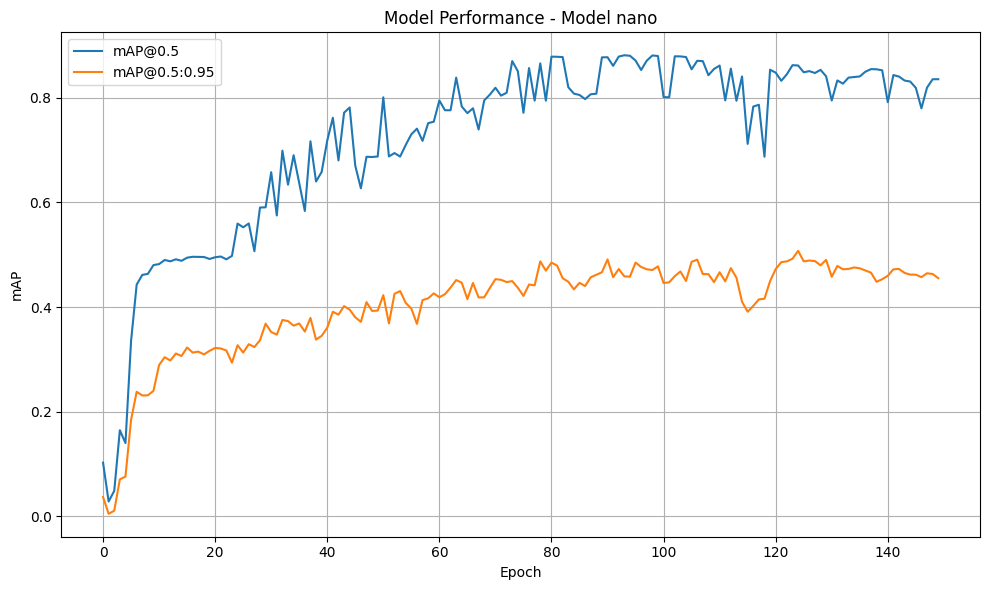

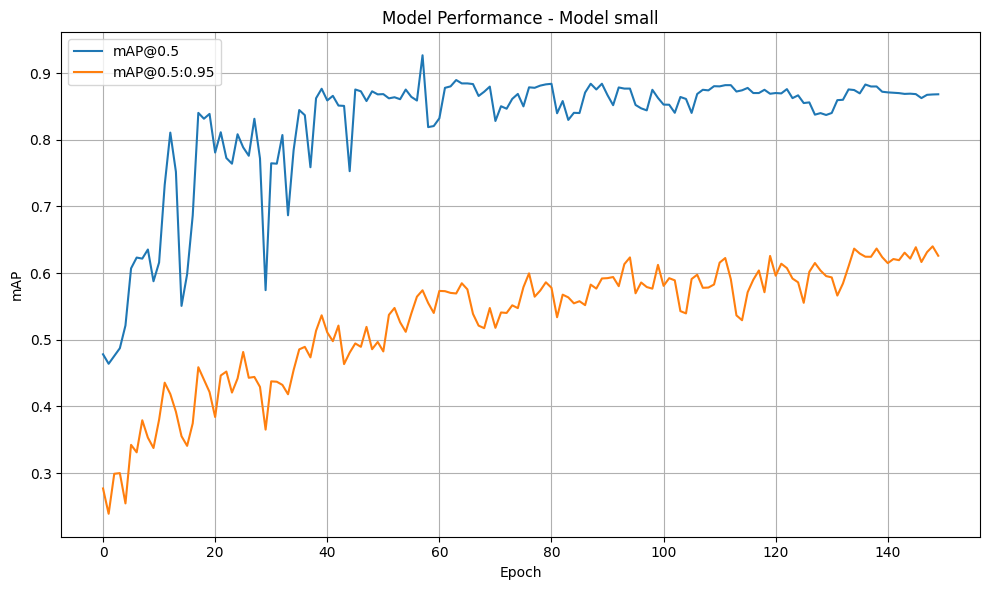

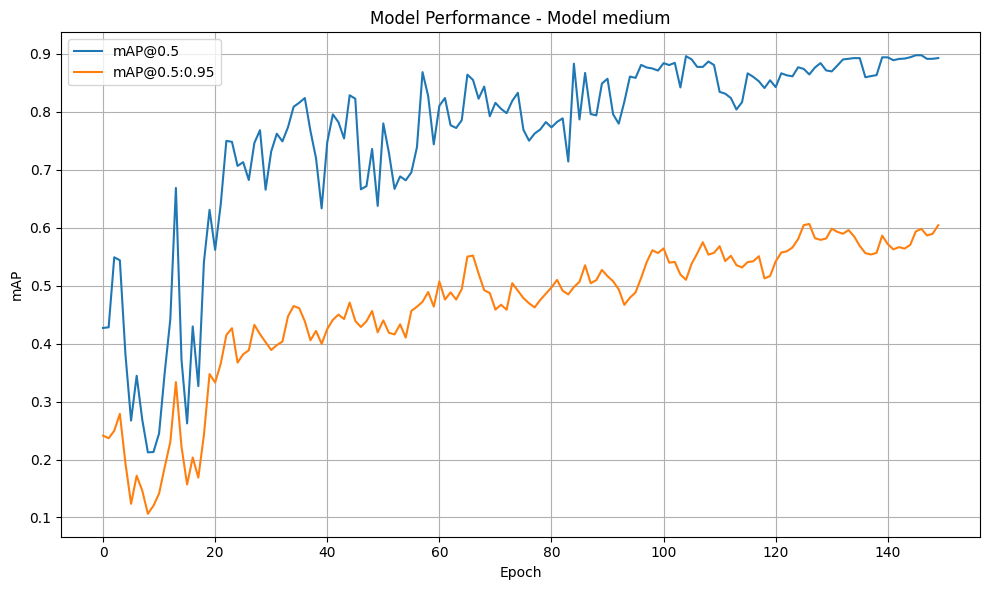

In [17]:
# Visualize mAP vs Epoch
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_internal_player_and_ball_class}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_internal_player_and_ball_class}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

### External

#### All Class

In [19]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = 16 # Jika ingin limitasi GPU menggunakan -1
device = [0]
data_path_external_all_class = "dataset/external/all_class"
project_base_external_all_class = "results/external/all_class"

In [ ]:
def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

In [20]:
# Training and Evaluating Using Test Set
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_external_all_class}/data.yaml",
        epochs=epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_external_all_class}/training",
        name=f"{size}",
        exist_ok=True,
        device=device
    )
    measure_and_save_time(start_time, f"{project_base_external_all_class}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_external_all_class}/training/summary/metrics/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_external_all_class}/data.yaml",
        imgsz=640,
        project=f"{project_base_external_all_class}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_external_all_class}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/external/all_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

train: Scanning /kaggle/working/dataset/external/all_class/train/labels... 594 images, 0 backgrounds, 0 corrupt: 100%|██████████| 594/594 [00:00<00:00, 697.65it/s]

train: New cache created: /kaggle/working/dataset/external/all_class/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.5±51.4 MB/s, size: 59.8 KB)


val: Scanning /kaggle/working/dataset/external/all_class/valid/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 410.05it/s]

val: New cache created: /kaggle/working/dataset/external/all_class/valid/labels.cache


Plotting labels to results/external/all_class/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/external/all_class/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.26G      1.774      2.935     0.9479         79        640: 100%|██████████| 38/38 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         50       1199   0.000866    0.00863   0.000609   0.000164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.27G      1.611      1.385     0.8942         71        640: 100%|██████████| 38/38 [00:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         50       1199     0.0399      0.368      0.202     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.29G      1.513      1.204     0.8825         51        640: 100%|██████████| 38/38 [00:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         50       1199      0.857      0.196      0.243      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.31G      1.491      1.125      0.874         51        640: 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         50       1199      0.869       0.27      0.296       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.31G      1.505      1.099     0.8739         41        640: 100%|██████████| 38/38 [00:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         50       1199      0.858      0.266      0.327      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.34G      1.382      1.017     0.8582         62        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         50       1199       0.86      0.288      0.346      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.35G      1.381      0.974     0.8676         42        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         50       1199      0.659      0.397      0.419      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.37G       1.35     0.9336     0.8567         30        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         50       1199      0.773      0.454      0.511      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.37G      1.362     0.8936     0.8583        104        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         50       1199       0.73      0.544      0.519      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       3.4G      1.346     0.8621     0.8496         57        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50       1199      0.757      0.539      0.548      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       3.4G      1.335     0.8374     0.8517        118        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         50       1199      0.747      0.455      0.503      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.43G      1.309     0.8069      0.853         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         50       1199      0.786      0.549      0.574      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.43G      1.285     0.7763     0.8523         30        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50       1199       0.83      0.543      0.612      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.46G      1.255     0.7418      0.842         77        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50       1199      0.839      0.521      0.601      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.46G      1.284     0.7576     0.8458         69        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         50       1199      0.858      0.575      0.629      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.49G      1.332     0.7662     0.8485        135        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50       1199       0.82      0.611      0.654      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.49G      1.244     0.7301     0.8443        111        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         50       1199       0.88       0.59      0.664       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.52G      1.227     0.7113     0.8392         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         50       1199      0.833      0.624      0.675      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.52G      1.211      0.697     0.8435         37        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         50       1199      0.781      0.538      0.596      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.54G      1.248     0.7226     0.8473         29        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         50       1199       0.78      0.598      0.674       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.55G      1.232     0.7032     0.8421        103        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         50       1199      0.814      0.639      0.691      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.57G      1.236     0.7015     0.8431         52        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         50       1199      0.843      0.631      0.688      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.58G      1.253      0.699     0.8385         63        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50       1199      0.831      0.607      0.681      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       3.6G       1.22       0.68      0.837         67        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         50       1199      0.767      0.607      0.669      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.61G      1.184     0.6667     0.8322         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         50       1199       0.85      0.628      0.702      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.63G      1.231     0.6669     0.8395         38        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.822      0.644        0.7      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.64G      1.248     0.6731     0.8428         80        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         50       1199      0.846      0.662      0.713      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.66G      1.269     0.6776     0.8373         83        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         50       1199      0.768      0.649      0.698      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.67G      1.167     0.6363     0.8329         62        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50       1199      0.791      0.614      0.702      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.69G      1.161     0.6359      0.831        105        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         50       1199      0.776      0.697      0.711      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150       3.7G      1.145     0.6261     0.8268         63        640: 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         50       1199      0.872      0.591      0.707       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.72G      1.145     0.6334     0.8355        124        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         50       1199      0.805      0.618      0.682      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.73G       1.23      0.648     0.8283        163        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50       1199        0.8      0.634      0.692      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.75G      1.197     0.6445     0.8306         47        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         50       1199      0.778      0.649       0.68      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.76G      1.143     0.6213     0.8306         35        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         50       1199      0.815      0.676      0.721      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.78G      1.145     0.6141     0.8294         51        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50       1199      0.811       0.63      0.706      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.79G      1.147     0.6058     0.8269         83        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         50       1199      0.844      0.674      0.735      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.81G      1.145     0.6097     0.8244         67        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         50       1199       0.85       0.66      0.724      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.82G      1.166     0.6059     0.8286         98        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50       1199      0.775      0.671      0.718      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.84G      1.145     0.5984     0.8272         98        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         50       1199      0.894      0.668      0.754      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.85G      1.122     0.5891     0.8237         84        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         50       1199      0.796      0.707      0.744      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.87G      1.121     0.5817     0.8275         38        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50       1199      0.831      0.688      0.753      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.88G      1.134     0.5925     0.8279         88        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50       1199      0.806        0.7       0.73      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       3.9G      1.134     0.5823     0.8278         43        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         50       1199      0.789      0.687       0.72      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.91G      1.125     0.5881     0.8305         52        640: 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         50       1199      0.853      0.644      0.734      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.93G      1.159     0.5984      0.826         56        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         50       1199      0.819      0.648      0.719      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.94G      1.119     0.5883     0.8252         80        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         50       1199      0.801      0.696      0.731      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.96G      1.172     0.6067     0.8254         92        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50       1199      0.765      0.718      0.726      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.97G      1.133     0.5788     0.8293         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         50       1199      0.872      0.671      0.742      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.99G      1.119     0.5761      0.823         55        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         50       1199      0.896      0.694      0.765      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150         4G      1.114     0.5745     0.8261         33        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         50       1199       0.84      0.727      0.767      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.02G      1.085     0.5618     0.8226         78        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         50       1199      0.874      0.681      0.757       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.03G      1.131     0.5869     0.8246         77        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         50       1199      0.826      0.701      0.748      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.05G      1.124     0.5836     0.8235         69        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50       1199       0.81      0.673      0.733      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.05G      1.099     0.5735     0.8228         37        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         50       1199      0.834      0.696      0.748      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.08G      1.123     0.5788     0.8252         40        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         50       1199      0.832      0.676      0.742      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.08G      1.084     0.5681     0.8218         57        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         50       1199      0.867      0.693       0.73      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.11G      1.073     0.5631     0.8218         45        640: 100%|██████████| 38/38 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         50       1199      0.912      0.682      0.741      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.12G      1.093     0.5654     0.8197         33        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.762      0.702      0.734      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.14G      1.077     0.5596     0.8227         32        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         50       1199      0.875      0.707      0.768      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.14G      1.078     0.5554     0.8186         73        640: 100%|██████████| 38/38 [00:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         50       1199      0.856      0.689      0.743      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.17G      1.092     0.5556      0.819         92        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50       1199      0.839      0.707      0.765      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.17G      1.087     0.5566     0.8218         43        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         50       1199      0.868      0.678      0.763      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       4.2G      1.073     0.5398     0.8142         54        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         50       1199      0.875      0.682       0.76      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       4.2G      1.092     0.5528      0.819         64        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.756      0.757      0.776      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.23G      1.096     0.5529     0.8162         64        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         50       1199      0.868      0.708      0.765      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.23G      1.057     0.5405     0.8197         34        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50       1199      0.817      0.744      0.764       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.26G      1.057     0.5376     0.8167        104        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50       1199      0.901      0.696      0.763      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.26G      1.047      0.537     0.8156        116        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         50       1199        0.8      0.674      0.746      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.29G      1.067     0.5491      0.819         45        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         50       1199      0.856      0.683      0.744      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.29G      1.073     0.5412     0.8155         62        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         50       1199      0.909      0.706      0.764      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.31G      1.059     0.5374     0.8198         56        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         50       1199      0.851      0.722      0.768      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.32G       1.05     0.5302      0.817         43        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         50       1199      0.847      0.724      0.761      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.34G      1.023     0.5212     0.8141         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50       1199      0.822      0.692      0.753      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.35G      1.065     0.5373     0.8176         54        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.805      0.735       0.75      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.37G      1.044     0.5208     0.8182         64        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         50       1199      0.813      0.723      0.761      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.38G      1.066     0.5403     0.8212         53        640: 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         50       1199      0.799      0.729      0.762      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       4.4G      1.046     0.5303     0.8155        100        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         50       1199      0.839      0.723      0.755      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.41G      1.045      0.525     0.8148         93        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         50       1199      0.828      0.731      0.763      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.43G      1.044     0.5249     0.8149         38        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         50       1199      0.862      0.712      0.778      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.44G      1.064     0.5386     0.8131         71        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         50       1199      0.898      0.702      0.772      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.46G      1.048     0.5227      0.813         84        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         50       1199      0.893      0.718      0.773       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.47G       1.04     0.5189     0.8105         55        640: 100%|██████████| 38/38 [00:06<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         50       1199      0.898      0.709      0.777      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.49G      1.047      0.519     0.8125         44        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50       1199      0.898      0.723      0.761      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       4.5G      1.067     0.5266     0.8179         22        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         50       1199      0.864      0.734      0.774      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.52G      1.017     0.5086     0.8164         46        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         50       1199      0.903      0.702      0.772      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.53G      1.027     0.5154     0.8149        107        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         50       1199      0.865      0.693      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.55G      1.036     0.5168      0.817         65        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50       1199      0.847      0.704      0.754      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.56G      1.032      0.523     0.8171         16        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50       1199       0.86       0.73      0.782      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.58G      1.028     0.5176     0.8136        127        640: 100%|██████████| 38/38 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         50       1199      0.861      0.712      0.771      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.59G     0.9935     0.5056     0.8104         85        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         50       1199      0.895      0.716      0.779      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.61G      1.033     0.5154     0.8142         74        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         50       1199      0.893      0.709      0.749      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.62G      1.025     0.5218     0.8162         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         50       1199      0.878      0.702      0.767      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.64G      1.037     0.5185     0.8137         36        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50       1199      0.835      0.742      0.781      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.65G      1.015     0.5049     0.8121         82        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50       1199      0.866      0.712      0.768      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.67G       1.01     0.5109     0.8157         38        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50       1199      0.883      0.724      0.765      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.68G      1.027     0.5138     0.8128        112        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50       1199      0.863      0.711      0.765       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       4.7G      1.009     0.5067     0.8126         86        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50       1199      0.837      0.734       0.78      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.71G      1.003     0.5006     0.8123         60        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         50       1199      0.847      0.735      0.777      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.73G     0.9818     0.4957     0.8114         44        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50       1199      0.869      0.718      0.769      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.74G      1.021     0.5076     0.8103         58        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50       1199       0.83      0.708      0.765      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.76G      1.006     0.4979     0.8127         28        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         50       1199      0.843       0.74      0.774      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.77G      1.021      0.507     0.8117         97        640: 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         50       1199      0.794      0.728      0.762      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.79G     0.9718     0.4887     0.8083         23        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         50       1199      0.857      0.745      0.761      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       4.8G     0.9978     0.4999     0.8096        108        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50       1199      0.869      0.743      0.786      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.82G     0.9959     0.4964     0.8099         50        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         50       1199      0.833      0.726      0.769      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.83G     0.9777     0.4864     0.8104         25        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         50       1199       0.84      0.745      0.774      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.85G     0.9824       0.49     0.8108         41        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         50       1199      0.852       0.71      0.766      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.86G      0.993     0.4881     0.8102        107        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         50       1199      0.888      0.711       0.77      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.88G      1.002     0.4925     0.8114         37        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         50       1199      0.849      0.736      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.88G     0.9963     0.4934     0.8107         56        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         50       1199      0.853      0.734      0.762      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.91G     0.9758     0.4822     0.8101         44        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.872       0.72      0.764       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.91G     0.9952     0.4892     0.8092         44        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         50       1199      0.876      0.701      0.769      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.94G      1.005     0.4927     0.8074         65        640: 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         50       1199      0.847      0.712      0.752      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.94G     0.9957     0.4864      0.807         43        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         50       1199      0.902      0.724      0.773      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.97G      0.978     0.4793     0.8059         92        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         50       1199      0.876       0.74      0.777      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.97G      0.982     0.4833     0.8109        156        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50       1199      0.892      0.705      0.775      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150         5G     0.9944     0.4907     0.8055         57        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         50       1199      0.912      0.717      0.784      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150         5G     0.9716     0.4807     0.8078         50        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50       1199      0.884      0.729       0.78      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.03G     0.9928     0.4924     0.8064         74        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         50       1199      0.859      0.716      0.777      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.03G     0.9788     0.4863     0.8104         72        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         50       1199      0.871      0.744      0.787      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.05G     0.9674     0.4764     0.8076         85        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         50       1199      0.885      0.751      0.789      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.06G     0.9796     0.4797     0.8097         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         50       1199       0.89      0.739      0.779      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.08G     0.9751     0.4813     0.8074         41        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         50       1199      0.896      0.743       0.78      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.09G     0.9711     0.4723     0.8068         63        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         50       1199      0.892       0.75      0.777      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.11G     0.9656     0.4723     0.8068         42        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         50       1199      0.879      0.716      0.788       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.12G     0.9649     0.4749     0.8073         45        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         50       1199      0.858      0.725      0.774      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.14G     0.9455     0.4699     0.8051         47        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50       1199      0.909      0.704      0.788      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.15G     0.9762     0.4736      0.805         41        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50       1199      0.881      0.745      0.788      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.17G     0.9554     0.4684     0.8058         78        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         50       1199      0.858      0.762      0.789      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.18G     0.9537     0.4668     0.8068         11        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         50       1199      0.901       0.73      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       5.2G      0.949     0.4668     0.8077         51        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         50       1199      0.884      0.737      0.775      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.21G     0.9495     0.4658     0.8056         57        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50       1199      0.877      0.744       0.78      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.23G     0.9339     0.4645     0.8052         29        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         50       1199      0.878      0.746       0.78      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.24G      0.944     0.4612     0.8079         39        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         50       1199      0.847      0.733       0.77      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.26G     0.9468      0.463     0.8037         92        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         50       1199      0.839      0.738       0.77      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.27G     0.9391      0.459     0.8031         44        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         50       1199      0.874       0.74      0.788      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.29G     0.9462     0.4622     0.8081         32        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         50       1199       0.89      0.742      0.794      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       5.3G     0.9473     0.4657     0.8039        119        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50       1199      0.897      0.749      0.795      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.32G     0.9497     0.4644     0.8061         65        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50       1199      0.864      0.746      0.785      0.488


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.33G     0.9071     0.4575      0.809         48        640: 100%|██████████| 38/38 [00:07<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         50       1199      0.885      0.716      0.769      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.35G     0.8877     0.4476      0.809         45        640: 100%|██████████| 38/38 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         50       1199      0.917      0.716      0.771      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.36G     0.8723     0.4374     0.8086         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         50       1199      0.895      0.741      0.789      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.38G     0.8872     0.4415      0.807         47        640: 100%|██████████| 38/38 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]

                   all         50       1199      0.929      0.725      0.789      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.39G     0.8896     0.4443     0.8067         43        640: 100%|██████████| 38/38 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50       1199      0.903      0.737      0.777      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.41G     0.8715     0.4354     0.8066         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         50       1199      0.915      0.729      0.789      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.42G     0.8628     0.4362     0.8078         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         50       1199      0.905      0.752      0.788      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.44G     0.8541     0.4309      0.804         45        640: 100%|██████████| 38/38 [00:06<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         50       1199      0.913      0.747      0.789       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.45G     0.8594     0.4325     0.8034         49        640: 100%|██████████| 38/38 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         50       1199      0.934      0.744      0.796      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.47G     0.8595      0.431      0.805         47        640: 100%|██████████| 38/38 [00:06<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         50       1199      0.927      0.742      0.797      0.483



150 epochs completed in 0.313 hours.
Optimizer stripped from results/external/all_class/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/external/all_class/training/nano/weights/best.pt, 5.5MB

Validating results/external/all_class/training/nano/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1199      0.888      0.711      0.769      0.492
                  ball         46         46      0.846      0.239      0.287      0.126
            goalkeeper         38         39      0.873      0.846      0.915      0.585
                player         50        995      0.938      0.952      0.981      0.723
               referee         50        119      0.896      0.807      0.894      0.535
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/external/all_class/training/nano
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 90.1±137.8 MB/s, size: 65.0 KB)


val: Scanning /kaggle/working/dataset/external/all_class/test/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1038.84it/s]

val: New cache created: /kaggle/working/dataset/external/all_class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]
invalid value encountered in less
invalid value encountered in less


                   all         25        598      0.918      0.714      0.769      0.525
                  ball         23         24          1      0.111      0.191     0.0591
            goalkeeper         19         19      0.899      0.895      0.964        0.7
                player         25        499       0.91      0.974      0.986      0.748
               referee         25         56      0.862      0.875      0.936      0.591
Speed: 4.2ms preprocess, 35.5ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to results/external/all_class/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=da

train: Scanning /kaggle/working/dataset/external/all_class/train/labels.cache... 594 images, 0 backgrounds, 0 corrupt: 100%|██████████| 594/594 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 284.3±154.9 MB/s, size: 59.8 KB)


val: Scanning /kaggle/working/dataset/external/all_class/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to results/external/all_class/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/external/all_class/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.88G      1.583      2.074     0.9139         79        640: 100%|██████████| 38/38 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         50       1199      0.642      0.357      0.314      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.63G      1.351     0.8917     0.8569         71        640: 100%|██████████| 38/38 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         50       1199       0.54       0.51      0.563      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.63G      1.294     0.7603     0.8497         51        640: 100%|██████████| 38/38 [00:11<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         50       1199       0.73      0.507      0.581      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.63G       1.29     0.7633     0.8485         51        640: 100%|██████████| 38/38 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         50       1199      0.735      0.512      0.563      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.63G      1.239     0.7494     0.8444         41        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         50       1199      0.801      0.599      0.685      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.63G        1.2     0.6652     0.8365         62        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         50       1199      0.877      0.676      0.735      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.63G      1.234     0.6698     0.8438         42        640: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         50       1199      0.803      0.659      0.697      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.63G      1.224     0.6593     0.8375         30        640: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         50       1199      0.784      0.655      0.694      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.63G      1.197     0.6395     0.8377        104        640: 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50       1199      0.846      0.711      0.745      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.63G      1.179     0.6232     0.8283         57        640: 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.751      0.734      0.745      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.63G      1.278     0.6598     0.8412        118        640: 100%|██████████| 38/38 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         50       1199      0.883      0.692      0.761      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.63G      1.175     0.6171     0.8326         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.859      0.724      0.768      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.63G      1.111     0.5883     0.8298         30        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         50       1199      0.873      0.707      0.774      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.63G      1.104     0.5697     0.8233         77        640: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50       1199      0.855      0.751      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.63G      1.121     0.5803     0.8258         69        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.829      0.679      0.759       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.63G      1.133     0.5929     0.8218        135        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199      0.786      0.698      0.747      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.63G      1.175      0.614      0.829        111        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.874      0.708      0.769      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.63G       1.15     0.5862     0.8266         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50       1199       0.88      0.732      0.745      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.63G       1.11     0.5715     0.8273         37        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.837       0.75      0.794      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.63G      1.105     0.5736     0.8311         29        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.882      0.726      0.798      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.63G      1.135     0.5751     0.8269        103        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50       1199      0.847      0.704      0.759       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.63G      1.135     0.5869     0.8284         52        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         50       1199      0.807       0.76      0.765      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.63G      1.095     0.5659     0.8229         63        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.818      0.751       0.78      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.63G      1.064     0.5442     0.8199         67        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50       1199      0.889      0.726      0.781       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.63G      1.061      0.551     0.8175         48        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50       1199       0.86      0.718      0.772      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.63G      1.071     0.5478      0.821         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199      0.863      0.719      0.786      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.63G      1.055     0.5345     0.8215         80        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         50       1199       0.94      0.722      0.805      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.63G      1.075     0.5357     0.8167         83        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199       0.92      0.703       0.79      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.63G      1.076     0.5338     0.8212         62        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.836      0.708      0.772      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.63G      1.093     0.5362     0.8212        105        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.868      0.747      0.782      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.63G      1.067      0.529     0.8188         63        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.902      0.754        0.8      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.63G      1.031     0.5301     0.8224        124        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.797      0.709      0.761      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.63G      1.088     0.5464      0.815        163        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         50       1199      0.842      0.668      0.745      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.63G      1.059      0.542     0.8161         47        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199       0.83      0.745      0.796      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.63G      1.033     0.5246     0.8167         35        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.908       0.74      0.798      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.63G      1.028     0.5165     0.8151         51        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.866      0.736      0.798      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.63G      1.051     0.5153     0.8133         83        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.839      0.756      0.794      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.63G      1.047     0.5205     0.8122         67        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199      0.894      0.723      0.794      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.63G      1.018     0.5036     0.8123         98        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50       1199      0.897      0.725      0.785      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.63G      1.017     0.5118     0.8138         98        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         50       1199      0.869      0.725      0.778      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.63G      1.052     0.5229     0.8176         84        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.861       0.71      0.778      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.63G      1.093     0.5306      0.822         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         50       1199      0.856      0.755      0.798      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.63G      1.039     0.5233     0.8181         88        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.927      0.754      0.806      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.63G          1     0.5026      0.814         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50       1199      0.929      0.736      0.814      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.63G     0.9988     0.5006     0.8131         52        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.864      0.762      0.796      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.63G      1.041     0.5165     0.8121         56        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199      0.871      0.765       0.81      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.63G      1.009     0.5104     0.8122         80        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.956      0.737      0.807      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.63G      1.036     0.5135     0.8112         92        640: 100%|██████████| 38/38 [00:11<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.868      0.741      0.794      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.63G     0.9865      0.491     0.8118         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.929      0.747      0.816      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.63G     0.9905     0.4937     0.8101         55        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.887      0.769      0.797      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.63G     0.9859      0.496     0.8121         33        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50       1199      0.924      0.736      0.794      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.63G     0.9799     0.4848     0.8095         78        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.866      0.753      0.808        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.63G     0.9861     0.4867     0.8088         77        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.816      0.741      0.794      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.63G       1.02     0.5085     0.8112         69        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.885      0.754      0.818      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.63G     0.9731     0.4844      0.809         37        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         50       1199      0.926      0.754      0.825       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.63G     0.9947     0.4907     0.8122         40        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         50       1199      0.857      0.743      0.806      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.63G     0.9722     0.4881     0.8099         57        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.928      0.735      0.806      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.63G     0.9443     0.4804     0.8062         45        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199      0.879      0.744      0.799      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.63G     0.9779     0.4828     0.8055         33        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50       1199      0.891      0.747      0.805      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.63G     0.9777     0.4897     0.8107         32        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         50       1199      0.866      0.753      0.804      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.63G     0.9637     0.4756     0.8055         73        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50       1199       0.96      0.764      0.828       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.63G     0.9532     0.4664     0.8058         92        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.932      0.767      0.824      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.63G     0.9368     0.4596     0.8054         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         50       1199      0.923      0.753      0.808      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.63G     0.9564       0.47     0.8017         54        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         50       1199      0.894      0.761      0.818      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.63G     0.9607     0.4746     0.8054         64        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.884      0.744      0.808      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.63G     0.9676     0.4768     0.8032         64        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.872      0.744      0.797       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.63G      0.967     0.4809     0.8089         34        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199      0.886      0.769       0.81      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.63G      0.958     0.4671      0.804        104        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.891      0.768      0.807      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.63G     0.9399     0.4642     0.8023        116        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         50       1199      0.876      0.746      0.793      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.63G     0.9434     0.4612     0.8057         45        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199      0.899      0.765      0.808      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.63G     0.9382     0.4549     0.8009         62        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.924      0.738      0.806      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.63G     0.9186     0.4466     0.8045         56        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.898      0.774      0.809      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.63G      0.931     0.4497     0.8041         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.907      0.759       0.81      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.63G     0.9094     0.4427     0.8018         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.882      0.767      0.814      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.63G      0.931     0.4544     0.8023         54        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50       1199      0.877      0.778      0.818      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.63G     0.9132     0.4394     0.8041         64        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         50       1199       0.84      0.771      0.809      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.63G     0.9192     0.4506     0.8033         53        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         50       1199      0.907      0.765      0.812      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.63G     0.9169     0.4485     0.8012        100        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         50       1199      0.928      0.761      0.811       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.63G     0.9317      0.451     0.8028         93        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.886      0.769      0.811      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.63G      0.937     0.4533     0.8035         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         50       1199      0.908      0.764       0.81       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.63G     0.9496     0.4577     0.8012         71        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.892       0.79       0.82      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.63G     0.9066     0.4411     0.8002         84        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         50       1199       0.91      0.776      0.821      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.63G      0.893     0.4396     0.7977         55        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.914       0.79       0.83      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.63G     0.9171     0.4456     0.7999         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199      0.881      0.772       0.81      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.63G     0.9286     0.4493     0.8037         22        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199        0.9      0.761      0.818      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.63G     0.9232     0.4453      0.804         46        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.871      0.785      0.814      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.63G     0.9079     0.4396      0.801        107        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.873      0.771      0.818      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.63G     0.9037     0.4344     0.8027         65        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.879      0.765      0.832      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.63G     0.9232     0.4436     0.8057         16        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         50       1199      0.882      0.784      0.816      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.63G     0.9172     0.4444     0.8022        127        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199      0.904       0.77      0.817      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.63G      0.883     0.4319     0.7984         85        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199      0.857      0.785       0.82      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.63G     0.8958     0.4344     0.7995         74        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.913      0.746      0.823      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.63G     0.9135     0.4406     0.8021         48        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         50       1199      0.926       0.74       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.63G      0.899     0.4312     0.7995         36        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50       1199      0.884      0.779      0.824      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.63G     0.8893     0.4284     0.7995         82        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         50       1199      0.899      0.748       0.82      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.63G     0.8818       0.43     0.8029         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         50       1199      0.875       0.76       0.81      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.63G     0.8997     0.4388        0.8        112        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.919      0.774      0.821      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.63G     0.8789     0.4319     0.7989         86        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199       0.89      0.769       0.82       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.63G     0.8866     0.4316        0.8         60        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.879      0.771      0.815      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.63G     0.8649     0.4242     0.7988         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         50       1199      0.857      0.772      0.818      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.63G     0.9113     0.4413     0.7976         58        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199      0.902      0.767      0.828      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.63G     0.8835     0.4286     0.8004         28        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.932      0.762      0.828      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.63G     0.9088     0.4342     0.7992         97        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.871      0.771      0.819      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.63G     0.8546     0.4178     0.7963         23        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199      0.888      0.768      0.825       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.63G     0.8697     0.4187     0.7966        108        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         50       1199      0.959      0.742      0.827      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.63G     0.8495     0.4097     0.7964         50        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50       1199      0.917      0.764      0.825      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.63G     0.8389     0.4068     0.7976         25        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         50       1199      0.894      0.771       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.63G     0.8606     0.4182      0.799         41        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199      0.933      0.759       0.82      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.63G      0.865     0.4205     0.7981        107        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         50       1199      0.912      0.756      0.818      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.63G     0.8579     0.4135     0.7984         37        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199      0.925      0.774      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.63G     0.8531     0.4154     0.7973         56        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50       1199      0.896      0.769      0.826      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.63G     0.8397     0.4103     0.7973         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.862      0.771      0.816      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.63G       0.86      0.412     0.7966         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         50       1199      0.925      0.749      0.818      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.63G     0.8522     0.4113     0.7936         65        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50       1199      0.874      0.772      0.818      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.63G     0.8337      0.402     0.7937         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         50       1199      0.878      0.777      0.819       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.63G     0.8481     0.4093     0.7942         92        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         50       1199      0.862      0.769      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.63G     0.8483     0.4108     0.7985        156        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         50       1199      0.915      0.752      0.816      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.63G      0.855     0.4089     0.7937         57        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199      0.896      0.755      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.63G       0.84     0.4039      0.795         50        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         50       1199      0.926      0.772      0.826      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.63G     0.8467     0.4093     0.7928         74        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         50       1199      0.907      0.752      0.815      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.63G     0.8294     0.4007     0.7956         72        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         50       1199      0.867      0.774      0.825      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.63G     0.8131     0.3915     0.7941         85        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50       1199      0.871      0.772      0.813      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.63G     0.8204     0.3965     0.7957         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.843      0.789       0.82      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.63G     0.8178     0.3987     0.7945         41        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50       1199      0.953      0.752       0.82      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.63G     0.8256     0.3941     0.7941         63        640: 100%|██████████| 38/38 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         50       1199       0.89      0.784      0.832       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.63G     0.8324     0.4001     0.7937         42        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.926      0.754      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.63G     0.8151     0.3921     0.7936         45        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         50       1199      0.893      0.773      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.63G     0.7926     0.3871     0.7921         47        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50       1199      0.932      0.764      0.835      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.63G     0.8242     0.3944     0.7931         41        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50       1199      0.911      0.788      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.63G     0.8052     0.3899     0.7933         78        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         50       1199      0.889      0.789      0.827      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.63G     0.8106     0.3883      0.794         11        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         50       1199      0.903      0.774      0.827       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.63G     0.8111      0.393      0.795         51        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         50       1199      0.908      0.771      0.829      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.63G     0.7997     0.3875     0.7924         57        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50       1199      0.905       0.79      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.63G     0.7768     0.3791     0.7914         29        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50       1199      0.896      0.789      0.832      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.63G     0.7921     0.3807     0.7944         39        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.913      0.772      0.828      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.63G     0.7991     0.3822     0.7911         92        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50       1199      0.941      0.765      0.835      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.63G     0.7843     0.3785     0.7906         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         50       1199       0.89      0.779      0.826      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.63G     0.7968     0.3837     0.7947         32        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         50       1199        0.9      0.777      0.829      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.63G     0.7996     0.3844     0.7914        119        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         50       1199      0.904      0.786      0.835      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.63G     0.7905     0.3786     0.7929         65        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50       1199      0.883      0.768      0.818      0.554


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.63G     0.7642     0.3773     0.7934         48        640: 100%|██████████| 38/38 [00:11<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         50       1199      0.886      0.785      0.821      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.63G     0.7467     0.3702     0.7942         45        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         50       1199      0.897      0.783      0.829      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.63G     0.7354     0.3635     0.7946         48        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         50       1199      0.906      0.768      0.832      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.63G     0.7391     0.3649     0.7913         47        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         50       1199      0.929      0.765      0.832      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.63G     0.7454     0.3675     0.7924         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         50       1199      0.913      0.768       0.83      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.63G     0.7234     0.3582      0.792         48        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50       1199      0.935      0.757      0.831      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.63G      0.723     0.3597     0.7933         48        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50       1199      0.942       0.75      0.831      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.63G     0.7089     0.3558     0.7904         45        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50       1199      0.948      0.751      0.832      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.63G     0.7189     0.3569     0.7895         49        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50       1199      0.899      0.764      0.834      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.63G     0.7214     0.3585      0.791         47        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         50       1199      0.908      0.758      0.835      0.561



150 epochs completed in 0.505 hours.
Optimizer stripped from results/external/all_class/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/external/all_class/training/small/weights/best.pt, 19.2MB

Validating results/external/all_class/training/small/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1199      0.905      0.756      0.832       0.56
                  ball         46         46      0.802      0.348      0.433      0.187
            goalkeeper         38         39      0.915      0.821      0.955       0.66
                player         50        995      0.961      0.966      0.989      0.759
               referee         50        119      0.943      0.891      0.951      0.633
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/external/all_class/training/small
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 655.4±198.3 MB/s, size: 65.0 KB)


val: Scanning /kaggle/working/dataset/external/all_class/test/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]
invalid value encountered in less
invalid value encountered in less


                   all         25        598      0.819       0.77      0.795      0.566
                  ball         23         24      0.534      0.167      0.235     0.0786
            goalkeeper         19         19      0.904      0.992      0.971      0.744
                player         25        499      0.923      0.976      0.989      0.777
               referee         25         56      0.915      0.946      0.983      0.663
Speed: 4.0ms preprocess, 32.0ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to results/external/all_class/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, dat

train: Scanning /kaggle/working/dataset/external/all_class/train/labels.cache... 594 images, 0 backgrounds, 0 corrupt: 100%|██████████| 594/594 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 252.6±133.3 MB/s, size: 59.8 KB)


val: Scanning /kaggle/working/dataset/external/all_class/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to results/external/all_class/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/external/all_class/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.38G      1.483      1.772     0.8936         79        640: 100%|██████████| 38/38 [00:24<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         50       1199       0.64      0.241      0.267      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.29G      1.359     0.8568     0.8597         71        640: 100%|██████████| 38/38 [00:24<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50       1199      0.326      0.477      0.281      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.37G      1.339     0.7961     0.8588         51        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.748      0.613      0.663      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.36G      1.269     0.7279     0.8476         51        640: 100%|██████████| 38/38 [00:23<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50       1199      0.666      0.649      0.624      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       8.2G      1.279     0.6992     0.8477         41        640: 100%|██████████| 38/38 [00:23<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50       1199      0.728      0.655      0.684      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.36G      1.197     0.6443     0.8361         62        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.846      0.667      0.733      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.36G       1.42     0.7658     0.8753         42        640: 100%|██████████| 38/38 [00:23<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50       1199      0.701      0.531      0.575       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.36G      1.257     0.7045     0.8473         30        640: 100%|██████████| 38/38 [00:23<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50       1199      0.701      0.658      0.681      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.25G      1.199     0.6669     0.8412        104        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50       1199      0.754      0.609      0.684        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.36G      1.226     0.6579     0.8405         57        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50       1199      0.761       0.68      0.707      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.27G      1.176     0.6332     0.8371        118        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50       1199      0.776       0.63      0.676       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       8.4G      1.117     0.5941       0.83         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.674      0.725      0.735      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.35G      1.142     0.5994     0.8358         30        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50       1199      0.712      0.665      0.697      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.33G      1.097     0.5742     0.8261         77        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50       1199      0.766      0.696       0.73      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.33G       1.11     0.5748     0.8287         69        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.798      0.636      0.714      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.37G      1.096     0.5629     0.8216        135        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.762      0.678      0.727      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       8.4G      1.093     0.5704     0.8249        111        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.835      0.727      0.759      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.39G      1.096     0.5714     0.8261         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.806      0.746      0.777       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.34G      1.079     0.5648     0.8277         37        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.824      0.743      0.788      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.37G      1.096     0.5759     0.8308         29        640: 100%|██████████| 38/38 [00:23<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.801      0.671       0.76      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.35G      1.101     0.5697     0.8276        103        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.792      0.675      0.743      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.24G      1.108     0.5733     0.8278         52        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.853      0.728      0.777      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       8.3G      1.065     0.5611     0.8205         63        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.869      0.703      0.762      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.22G       1.03     0.5413     0.8175         67        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.903      0.747      0.802      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.36G      1.026      0.528     0.8145         48        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         50       1199      0.898      0.715      0.784      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.37G      1.041     0.5304     0.8208         38        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.836      0.775      0.805      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.21G      1.031     0.5154     0.8217         80        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.899      0.739      0.795      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.36G       1.05     0.5256     0.8157         83        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.835      0.743      0.771      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.36G      1.004     0.5216     0.8175         62        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.801      0.693      0.758      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.44G      1.005      0.506     0.8146        105        640: 100%|██████████| 38/38 [00:23<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.863      0.747        0.8       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.31G      1.015     0.5177      0.813         63        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.809      0.734      0.769      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.32G      1.029     0.5309     0.8202        124        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199       0.83      0.722      0.787      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.38G      1.043     0.5171     0.8101        163        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199       0.84      0.683       0.76      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       8.4G      1.007     0.5114     0.8121         47        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.855      0.675      0.757       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.38G      1.008     0.5144      0.815         35        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.856      0.741      0.795      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.41G      1.001     0.4982     0.8142         51        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.893      0.749      0.809      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.37G     0.9789     0.4815     0.8109         83        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199       0.86      0.768      0.792      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.24G     0.9911     0.4908     0.8082         67        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.874      0.728      0.796      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.39G     0.9829     0.4835     0.8085         98        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50       1199      0.882      0.732      0.786      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.32G     0.9616     0.4811     0.8091         98        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.865      0.763      0.802      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.38G     0.9818     0.4865     0.8094         84        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.821      0.763      0.787      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.25G     0.9688     0.4796     0.8129         38        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.886      0.771      0.818      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.25G     0.9755       0.49     0.8107         88        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.893      0.734      0.798      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.22G      0.988     0.4892     0.8119         43        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.921      0.727      0.797      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.27G     0.9915     0.4976     0.8124         52        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50       1199      0.843      0.765      0.797      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.37G      1.019     0.4973     0.8106         56        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.883      0.721      0.806      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.35G       1.01     0.4949      0.813         80        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.867      0.767      0.815      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.41G     0.9882     0.4821      0.808         92        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.862      0.775      0.823      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.31G      0.921       0.46     0.8058         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50       1199      0.771      0.753      0.766        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.32G     0.9435     0.4643     0.8062         55        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.895      0.772      0.812      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.34G     0.9615     0.4713     0.8092         33        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.895      0.774      0.823      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.34G     0.9244     0.4515     0.8064         78        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.869      0.758      0.805      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.35G     0.9369     0.4575     0.8038         77        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.854      0.772      0.811      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.39G      0.954     0.4712     0.8065         69        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.871      0.781      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.34G     0.9261     0.4571     0.8058         37        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.839      0.765      0.798      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.32G     0.9665     0.4719     0.8099         40        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199       0.85      0.758      0.787       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.36G     0.9535     0.4732     0.8101         57        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199       0.92      0.724      0.797      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       8.3G     0.9307     0.4641     0.8064         45        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.921      0.748      0.818      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.35G     0.9419     0.4668      0.803         33        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         50       1199       0.87      0.765      0.811      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.29G     0.9542     0.4705     0.8073         32        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.857      0.775      0.813       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       8.3G     0.9266     0.4496     0.8016         73        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.879      0.748        0.8      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.31G     0.9703     0.4654      0.806         92        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.848      0.771      0.803      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.36G     0.9106      0.442     0.8044         43        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.872      0.759      0.811      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.37G     0.9151     0.4403     0.7976         54        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.894      0.759      0.828      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.33G     0.9384     0.4469     0.8062         64        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50       1199      0.873      0.776      0.827      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       8.4G     0.9264     0.4461     0.8004         64        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.862      0.786      0.823      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.21G     0.9205      0.449      0.806         34        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.819      0.774      0.793      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.27G     0.8954     0.4372     0.8019        104        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.862      0.756      0.796      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.36G     0.9332     0.4494     0.8025        116        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.904      0.762      0.834      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.37G     0.9323     0.4462     0.8042         45        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.885       0.75      0.814      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.32G     0.9127     0.4383     0.8013         62        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.902      0.758      0.818      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.34G     0.9076     0.4376     0.8056         56        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50       1199      0.907      0.769       0.83      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.39G     0.9123     0.4474     0.8028         43        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.882      0.759      0.804      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.26G     0.8791     0.4315      0.799         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.846      0.793      0.818      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.31G      0.886     0.4357     0.7992         54        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.856      0.762      0.796      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.39G     0.8707       0.42     0.8012         64        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.892      0.711      0.805      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.37G     0.8783      0.427     0.8017         53        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.871      0.756      0.801       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       8.4G     0.8862     0.4331     0.7995        100        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.863      0.733      0.793      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.32G     0.8834     0.4311     0.7988         93        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.904      0.738      0.809      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       8.3G     0.8772     0.4323     0.7999         38        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         50       1199      0.865      0.764      0.798      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.29G      0.884     0.4324     0.7977         71        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.902      0.771      0.814      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       8.4G     0.8816     0.4284     0.7985         84        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.904      0.772      0.823      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.34G      0.857     0.4205     0.7951         55        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.854      0.784      0.818       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.39G     0.8728     0.4196     0.7965         44        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.905      0.775       0.83      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.24G     0.8564     0.4209     0.7976         22        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.862      0.775       0.82      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.34G     0.8562     0.4143     0.7977         46        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50       1199      0.872      0.797      0.821      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.36G     0.8477     0.4087     0.7959        107        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.867       0.79      0.822      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.35G     0.8538     0.4103     0.7974         65        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.855      0.773      0.818      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150       8.3G      0.844       0.41     0.7981         16        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.848        0.8      0.813      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.21G     0.8459     0.4097      0.795        127        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50       1199      0.883      0.778      0.814      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.27G     0.8254     0.4031     0.7927         85        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.873      0.772      0.816      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.34G     0.8534     0.4185     0.7963         74        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.816      0.785      0.807      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.27G     0.8632     0.4198     0.7988         48        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.858      0.758      0.791      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.36G     0.8747     0.4195     0.7966         36        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50       1199      0.855      0.796      0.821      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.36G     0.8375     0.4038     0.7946         82        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.925       0.76      0.817      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.38G     0.8411     0.4065     0.7976         38        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.874      0.761      0.808      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.35G     0.8437     0.4035      0.795        112        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.909      0.757      0.818      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.37G     0.8208     0.3953     0.7935         86        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.868      0.774      0.814      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.36G     0.8364     0.4018     0.7957         60        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.901      0.766      0.828       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.41G      0.806     0.3966     0.7936         44        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199       0.92      0.756      0.825      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       8.4G     0.8657     0.4168     0.7938         58        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199       0.92      0.749      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.37G     0.8412     0.4056     0.7967         28        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199       0.88       0.77      0.825      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.34G     0.8334     0.3979     0.7944         97        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         50       1199      0.891      0.779      0.818      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.38G     0.7928     0.3891     0.7909         23        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.897      0.777      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.31G     0.8212     0.3989     0.7923        108        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.883      0.781      0.818       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.31G     0.8174     0.3979     0.7934         50        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50       1199      0.898      0.785      0.816      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       8.3G     0.7958      0.387     0.7941         25        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.912      0.793       0.83      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       8.3G     0.8115     0.3911     0.7943         41        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.884      0.773      0.809       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.28G     0.8087     0.3882      0.793        107        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.894      0.778      0.817      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       8.4G     0.8117      0.389     0.7939         37        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.873      0.799      0.835      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.26G     0.7946     0.3863     0.7917         56        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         50       1199      0.878      0.772      0.822       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.33G     0.8042     0.3879      0.793         44        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         50       1199      0.872      0.765      0.818      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.38G     0.8149     0.3881     0.7921         44        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.905      0.794      0.838      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       8.4G     0.8073     0.3872     0.7891         65        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.879      0.784      0.838      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       8.4G     0.8007     0.3847     0.7903         43        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.895      0.775      0.839      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.39G     0.8001     0.3837     0.7888         92        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.892      0.776      0.838      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.35G     0.8043     0.3816     0.7938        156        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50       1199      0.912      0.762      0.831      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.34G     0.8169     0.3877     0.7905         57        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.903      0.786      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.23G      0.788     0.3743     0.7904         50        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.902      0.764      0.824      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.34G     0.7967     0.3789     0.7884         74        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50       1199      0.905      0.757      0.825      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.35G     0.7821     0.3734     0.7912         72        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.883      0.806      0.841      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.36G     0.7838     0.3712     0.7902         85        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.862        0.8      0.823      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.37G     0.7705     0.3678     0.7915         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.875      0.789      0.836      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.36G     0.7649     0.3684     0.7894         41        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199       0.84      0.789      0.837      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.35G     0.7791     0.3672     0.7901         63        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         50       1199      0.888      0.763       0.83      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.37G      0.773     0.3677     0.7887         42        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.897      0.782      0.835      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.31G     0.7626     0.3637     0.7893         45        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.891      0.767      0.833      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.35G     0.7452     0.3604     0.7864         47        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.912      0.783       0.84      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.32G     0.7804     0.3682      0.788         41        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         50       1199      0.904      0.776      0.823      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.38G     0.7522     0.3621      0.788         78        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199       0.89      0.791      0.824      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.31G     0.7473     0.3601     0.7891         11        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.874      0.781      0.816      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.39G     0.7495     0.3587     0.7898         51        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199       0.89      0.772       0.82      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.31G     0.7475     0.3601     0.7876         57        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.889       0.78      0.836      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.35G     0.7235     0.3529     0.7872         29        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.851      0.793      0.819      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.39G     0.7396     0.3541     0.7896         39        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.884      0.791      0.839      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       8.4G     0.7389     0.3528     0.7861         92        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.921      0.785      0.841      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.21G     0.7336     0.3518     0.7855         44        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199      0.914      0.797      0.841      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.33G     0.7356     0.3535     0.7897         32        640: 100%|██████████| 38/38 [00:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.919      0.784      0.836      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.19G      0.734     0.3499     0.7863        119        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.898      0.788      0.832      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.41G     0.7342     0.3497     0.7883         65        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.897      0.795      0.837      0.572


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.19G     0.6995     0.3463     0.7869         48        640: 100%|██████████| 38/38 [00:23<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.873       0.78      0.828      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       8.2G      0.698     0.3402     0.7889         45        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.873      0.771      0.822      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.22G      0.682     0.3344     0.7889         48        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50       1199      0.881      0.782      0.833      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.21G     0.6867     0.3364     0.7864         47        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50       1199      0.882      0.798      0.843      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.18G     0.6882     0.3379     0.7866         43        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50       1199      0.919      0.773      0.844      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.21G     0.6676     0.3269     0.7868         48        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199       0.93      0.775      0.842      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.19G     0.6661     0.3309     0.7875         48        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50       1199      0.916      0.776      0.847      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.21G     0.6578     0.3274     0.7855         45        640: 100%|██████████| 38/38 [00:22<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50       1199      0.905      0.788      0.848      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.19G     0.6643     0.3251     0.7841         49        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50       1199       0.89        0.8      0.844      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.21G     0.6596     0.3243     0.7854         47        640: 100%|██████████| 38/38 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50       1199      0.886      0.797      0.843      0.585



150 epochs completed in 1.051 hours.
Optimizer stripped from results/external/all_class/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/external/all_class/training/medium/weights/best.pt, 40.5MB

Validating results/external/all_class/training/medium/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1199      0.886      0.797      0.843      0.584
                  ball         46         46      0.807      0.364      0.452      0.216
            goalkeeper         38         39       0.82      0.935      0.955       0.68
                player         50        995      0.977      0.958       0.99      0.776
               referee         50        119      0.939      0.933      0.974      0.664
Speed: 0.2ms preprocess, 13.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/external/all_class/training/medium
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 862.4±354.5 MB/s, size: 65.0 KB)


val: Scanning /kaggle/working/dataset/external/all_class/test/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]
invalid value encountered in less
invalid value encountered in less


                   all         25        598       0.84      0.774      0.787      0.579
                  ball         23         24      0.529      0.167       0.21     0.0905
            goalkeeper         19         19      0.904      0.989       0.96      0.731
                player         25        499      0.966      0.976      0.991      0.793
               referee         25         56      0.961      0.964      0.986      0.702
Speed: 4.0ms preprocess, 30.7ms inference, 0.0ms loss, 29.7ms postprocess per image
Results saved to results/external/all_class/validation/medium
Finished training and validating medium model.


In [21]:
# Inference to Test Set
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"{project_base_external_all_class}/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"{project_base_external_all_class}/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_external_all_class}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/25 /kaggle/working/dataset/external/all_class/test/images/08fd33_3_6_png.rf.285e7b71086ec5e631990c08fd253be0.jpg: 640x640 21 players, 2 referees, 8.3ms
image 2/25 /kaggle/working/dataset/external/all_class/test/images/08fd33_9_3_png.rf.040140a96230e56d99f71b3e109151f5.jpg: 640x640 21 players, 1 referee, 8.4ms
image 3/25 /kaggle/working/dataset/external/all_class/test/images/40cd38_7_6_png.rf.5ec909f0c707c683c31dbe640c9131cb.jpg: 640x640 1 goalkeeper, 20 players, 1 referee, 8.1ms
image 4/25 /kaggle/working/dataset/external/all_class/test/images/42ba34_1_5_png.rf.6654c22b192eac2681840b41d01c5574.jpg: 640x640 1 goalkeeper, 23 players, 2 referees, 8.1ms
image 5/25 /kaggle/working/dataset/external/all_class/test/images/42ba34_5_5_png.rf.0f442469335b241780b192adf63bb963.jpg: 640x640 1 goalkeeper, 20 players, 8.1ms
image 6/25 /kaggle/working/dataset/external/all_class/test/images/4b770a_1_4_png.rf.a3fa730e44e206a72271dc70281510cd.jpg: 640x640 1 go

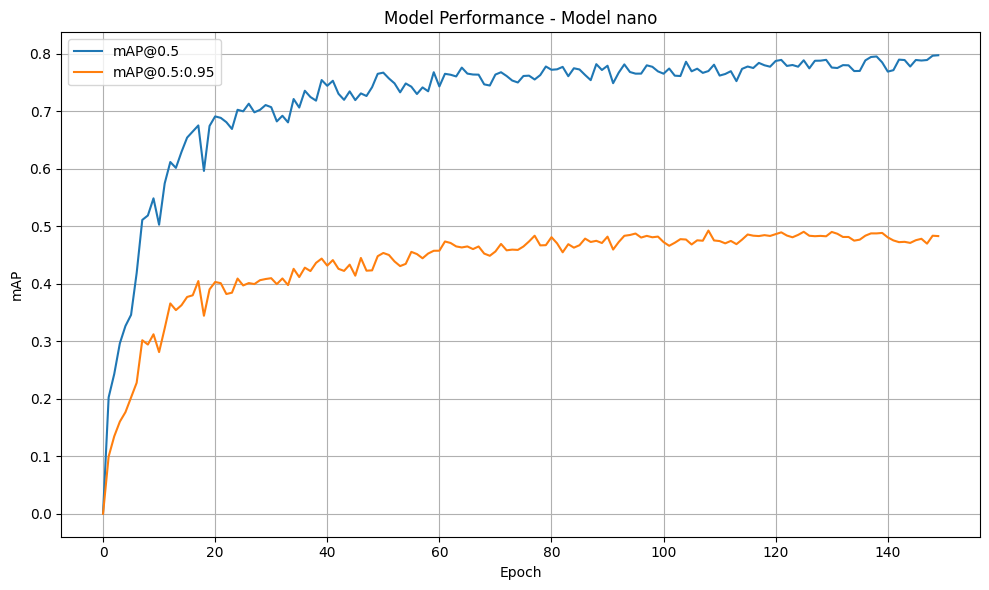

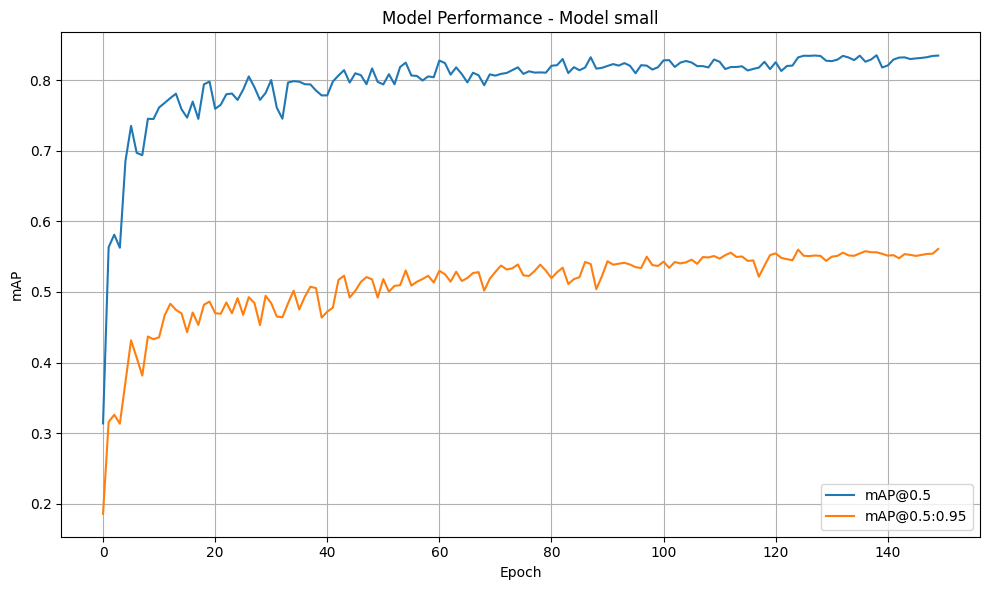

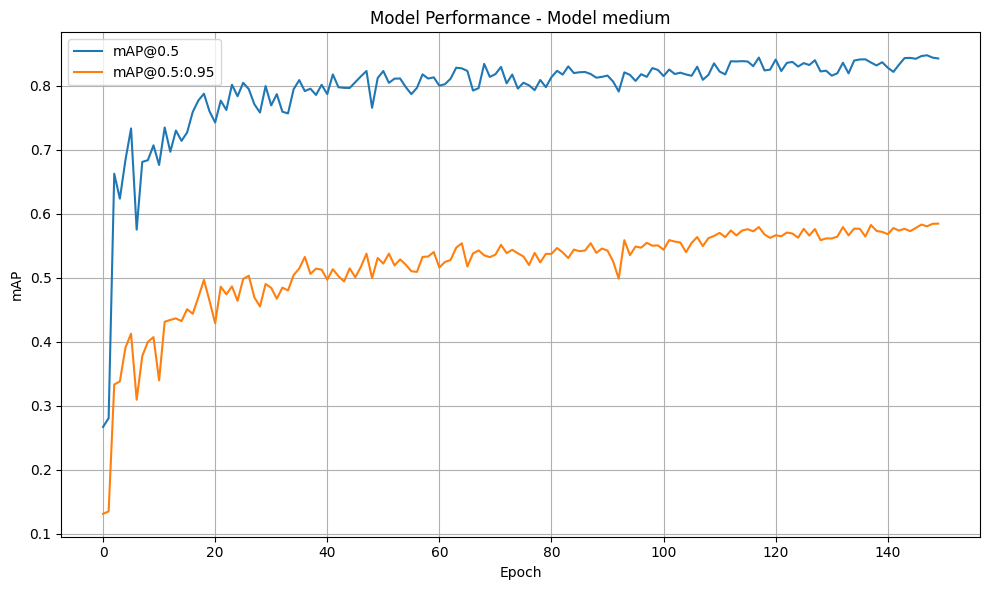

In [22]:
# Visualize mAP vs Epoch
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_external_all_class}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_external_all_class}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

### Mixed

#### All Class

In [24]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = 16 # Jika ingin limitasi GPU menggunakan -1
device = [0]
data_path_mixed_all_class = "dataset/mixed/all_class"
project_base_mixed_all_class = "results/mixed/all_class"

In [ ]:
def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

In [25]:
# Training and Evaluating Using Test Set
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_mixed_all_class}/data.yaml",
        epochs=epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_mixed_all_class}/training",
        name=f"{size}",
        exist_ok=True,
        device=device
    )
    measure_and_save_time(start_time, f"{project_base_mixed_all_class}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_mixed_all_class}/training/summary/metrics/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_mixed_all_class}/data.yaml",
        imgsz=640,
        project=f"{project_base_mixed_all_class}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_mixed_all_class}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mixed/all_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

train: Scanning /kaggle/working/dataset/mixed/all_class/train/labels... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<00:00, 719.86it/s]

train: New cache created: /kaggle/working/dataset/mixed/all_class/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.7±10.0 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 514.44it/s]

val: New cache created: /kaggle/working/dataset/mixed/all_class/valid/labels.cache


Plotting labels to results/mixed/all_class/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/all_class/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.07G      1.734      2.846     0.9691         81        640: 100%|██████████| 41/41 [00:08<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        100       2262    0.00314     0.0333    0.00536    0.00193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.26G      1.584      1.364     0.9142        136        640: 100%|██████████| 41/41 [00:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        100       2262       0.04      0.343        0.2      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.28G      1.511      1.202     0.8991        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        100       2262      0.766      0.209      0.231      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.29G       1.54      1.171     0.9018         50        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all        100       2262      0.757      0.252      0.252      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.31G      1.421      1.078     0.8854         70        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all        100       2262      0.815      0.277      0.298      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.32G      1.393      1.023     0.8732        112        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all        100       2262      0.828      0.306      0.348      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.34G      1.422     0.9838       0.88        130        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        100       2262      0.575      0.404      0.354      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.34G      1.427     0.9414     0.8832        166        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        100       2262        0.7      0.483      0.503      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.37G      1.372     0.8887     0.8777        117        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        100       2262      0.816       0.54      0.574      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.38G      1.367     0.8622     0.8724        210        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all        100       2262      0.806      0.561       0.59      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       3.4G      1.341     0.8468     0.8697        104        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        100       2262      0.877       0.54       0.63      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       3.4G        1.3     0.8057      0.864         61        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        100       2262      0.787      0.597      0.632      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.43G      1.322      0.789     0.8643        128        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100       2262      0.874      0.567       0.67      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.44G      1.328     0.7595     0.8663        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.803      0.607      0.653      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.46G      1.293     0.7444     0.8588        107        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        100       2262      0.842      0.621      0.682      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.46G      1.248     0.7297      0.856         74        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        100       2262      0.748      0.602      0.647      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.49G      1.346     0.7556     0.8653        154        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        100       2262      0.753      0.531      0.617      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       3.5G      1.383     0.7929     0.8701        118        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        100       2262      0.766      0.641      0.661      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.52G       1.25      0.733     0.8556        172        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.822      0.627        0.7      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.52G      1.235     0.7151     0.8508        140        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        100       2262      0.821      0.654      0.707       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.54G      1.235     0.7036      0.855         46        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       2262      0.781      0.678      0.696       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.56G      1.305     0.7129     0.8589        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262      0.857      0.631      0.703       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.58G      1.226     0.6829     0.8564         77        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        100       2262      0.833      0.661      0.719      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.58G       1.19     0.6696     0.8469         99        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.831      0.648      0.712      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.61G      1.196      0.671     0.8488         79        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        100       2262      0.764      0.683      0.712      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.62G      1.186     0.6586     0.8472        126        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262      0.824      0.678      0.729      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.63G      1.193     0.6575     0.8493         95        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.801      0.665      0.729      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.64G       1.18     0.6441     0.8456         57        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        100       2262      0.827      0.666      0.722      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.66G      1.234     0.6633     0.8513         47        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100       2262      0.864      0.626      0.715      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.68G      1.202     0.6431     0.8481        165        640: 100%|██████████| 41/41 [00:07<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        100       2262      0.917      0.651      0.743      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.69G       1.24     0.6509     0.8504        122        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.808      0.681       0.72      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       3.7G      1.245     0.6581     0.8507        167        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        100       2262      0.858      0.683      0.744      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.72G      1.145     0.6282     0.8444        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262       0.78      0.629        0.7       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.74G      1.202     0.6574      0.847        117        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.829      0.651      0.719      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.75G      1.173     0.6305     0.8412         65        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.826      0.701      0.746      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.76G       1.19     0.6305     0.8401         89        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        100       2262      0.807      0.706      0.726      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.78G      1.141     0.6122     0.8385         73        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.846      0.675      0.746       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       3.8G      1.138     0.6178     0.8389        199        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all        100       2262      0.819      0.661      0.724      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.81G      1.141     0.6107     0.8433         42        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262      0.811      0.659      0.711      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.82G      1.156     0.6124     0.8427        180        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        100       2262      0.844      0.705      0.751       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.84G      1.176     0.6177     0.8413        159        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262      0.793      0.632      0.709      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.86G      1.159     0.6207     0.8395         72        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        100       2262      0.843      0.697      0.753       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.87G      1.154     0.6138     0.8438        116        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        100       2262      0.814      0.715      0.758      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.88G      1.128     0.5954     0.8373         88        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.884       0.71      0.762      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       3.9G      1.154     0.6096     0.8386        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.849      0.684      0.737      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.92G      1.136      0.592     0.8385        118        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        100       2262      0.875      0.693      0.752      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.93G      1.126     0.5896     0.8347         72        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.882      0.687      0.754      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.94G       1.12     0.5822     0.8367        117        640: 100%|██████████| 41/41 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.867      0.691      0.755      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.96G      1.152     0.5963     0.8335        183        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        100       2262      0.864      0.716      0.765      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.97G      1.109     0.5781     0.8332        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       2262      0.888      0.716      0.776      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.99G      1.118     0.5693     0.8349         89        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        100       2262      0.869      0.694      0.767      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150         4G      1.126     0.5797     0.8354        121        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.859      0.719      0.777      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.02G       1.11     0.5793     0.8339         79        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        100       2262      0.877      0.725      0.781       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.04G      1.079     0.5721     0.8302        126        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       2262      0.851      0.686       0.76      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.05G      1.074     0.5681     0.8321         63        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100       2262      0.831      0.722       0.76      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.05G      1.104     0.5665     0.8302        108        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        100       2262      0.816      0.723      0.759      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.08G      1.106     0.5684     0.8327        113        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       2262      0.908      0.694      0.781      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.09G      1.126     0.5819     0.8334         56        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.834      0.721       0.77      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.11G       1.08      0.561     0.8315        158        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        100       2262      0.828       0.73      0.771      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.12G        1.1     0.5616     0.8304        220        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262      0.874       0.72      0.768      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.14G      1.065     0.5646     0.8309        110        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.855      0.727      0.764      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.15G       1.11     0.5779     0.8297        158        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.829      0.727      0.762      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.17G      1.096     0.5734     0.8333        101        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100       2262      0.865      0.708      0.768      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.17G      1.084     0.5602     0.8321         72        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        100       2262      0.876      0.728      0.775      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       4.2G      1.053     0.5416     0.8298         78        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        100       2262      0.825      0.753      0.789      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.21G      1.087     0.5628     0.8269        177        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.836      0.721      0.777      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.23G      1.076     0.5465     0.8268        126        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.859      0.719      0.772      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.23G      1.052     0.5467     0.8257         74        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        100       2262      0.829      0.731      0.768      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.26G      1.081     0.5504     0.8278        137        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262       0.86      0.726      0.784      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.27G      1.071     0.5482     0.8253        111        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       2262      0.856      0.719      0.777      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.29G      1.057     0.5373     0.8252        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.846      0.729      0.782      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.29G      1.055     0.5315     0.8287        122        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        100       2262      0.858      0.739      0.783      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.32G      1.058     0.5366     0.8247        110        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.837      0.752      0.788      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.33G      1.032     0.5332     0.8259         69        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.885      0.731      0.783      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.35G      1.036     0.5297     0.8222        141        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262      0.855      0.728      0.777       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.35G      1.036     0.5299     0.8233        145        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       2262      0.845      0.733      0.779      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.38G       1.03     0.5245     0.8232        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.854      0.732      0.779      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.39G      1.044     0.5234      0.825         86        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        100       2262       0.85      0.712      0.766      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       4.4G      1.035     0.5213     0.8231         55        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        100       2262      0.834       0.72      0.779      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.41G      1.028     0.5254     0.8242        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262      0.843      0.715       0.78      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.43G      1.033     0.5301     0.8225         98        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        100       2262      0.842      0.739      0.779      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.45G      1.011     0.5155     0.8239        118        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        100       2262      0.876      0.753       0.79      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.46G      1.023     0.5245     0.8219        102        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       2262      0.887      0.725      0.785       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.47G      1.047      0.532     0.8252        134        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       2262      0.888       0.73      0.782      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.49G      1.026     0.5225     0.8245        123        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        100       2262      0.861       0.72      0.775      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.51G      1.011     0.5129     0.8215         75        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100       2262      0.823      0.752      0.772      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.52G      1.049     0.5281     0.8257         52        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262      0.882      0.706      0.772      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.53G      1.048     0.5241     0.8247        181        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        100       2262      0.841      0.734      0.765      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.55G      1.018       0.51     0.8244         74        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.877      0.734      0.783      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.57G      1.016     0.5132     0.8161        133        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100       2262      0.881      0.722      0.791      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.58G      1.031     0.5188     0.8254        173        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       2262       0.85       0.74      0.776      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.59G       1.01     0.5165     0.8189        168        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.864      0.706      0.762      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.61G       1.01     0.5101     0.8181        134        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        100       2262       0.84      0.721      0.763      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.63G       1.01     0.5182     0.8244        227        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        100       2262      0.852      0.718      0.775      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.64G      1.012     0.5137     0.8224        151        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        100       2262      0.836      0.722      0.771       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.65G      1.011     0.5134     0.8192        108        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        100       2262      0.831      0.738      0.772      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.67G      1.001     0.5036     0.8214         93        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.814      0.737      0.778      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.69G     0.9944     0.5024     0.8198        137        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       2262      0.824      0.753      0.786      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       4.7G      1.006     0.5057      0.822        151        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all        100       2262       0.83       0.74      0.787      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.71G     0.9988     0.5028     0.8179        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        100       2262      0.818      0.754      0.788      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.73G     0.9941     0.4949     0.8179         81        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       2262       0.85      0.751      0.779      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.75G     0.9871     0.4949     0.8182         54        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        100       2262      0.875       0.72      0.772      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.76G     0.9837     0.4989     0.8199        135        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.831      0.742      0.776      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.77G     0.9704     0.4906     0.8176         93        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262       0.87      0.724      0.778      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.79G     0.9707     0.4962       0.82        106        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.836      0.736      0.782      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       4.8G     0.9998     0.4999      0.818        165        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        100       2262      0.827      0.747      0.781      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.82G      0.987      0.492     0.8163        124        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        100       2262      0.867      0.743      0.792      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.83G     0.9761      0.492     0.8175        147        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       2262      0.865      0.765      0.797      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.85G     0.9694     0.4872     0.8162        120        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100       2262      0.842      0.755      0.785      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.86G     0.9659     0.4951     0.8207        172        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        100       2262       0.85      0.743      0.787      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.88G     0.9481     0.4784     0.8161         55        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.876      0.739      0.789      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.88G     0.9718     0.4888     0.8176         66        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        100       2262      0.889      0.726       0.79      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.91G     0.9719     0.4905     0.8167        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.863       0.74      0.789        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.92G     0.9551     0.4795     0.8175         77        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100       2262       0.86      0.735      0.792      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.94G      0.962     0.4835     0.8158        141        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.835      0.754      0.789      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.94G     0.9799     0.4879     0.8137        149        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       2262       0.86      0.736       0.79      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.97G     0.9536     0.4822     0.8134        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        100       2262      0.844      0.747      0.791      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.98G      0.966     0.4849     0.8161        153        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        100       2262      0.858      0.733      0.789      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150         5G     0.9724     0.4905     0.8154        110        640: 100%|██████████| 41/41 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100       2262      0.885      0.735      0.792      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150         5G     0.9509     0.4756     0.8155        125        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       2262      0.837      0.754      0.793        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.03G     0.9444     0.4758     0.8129        157        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.873      0.754      0.798      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.04G     0.9398     0.4739     0.8125        106        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        100       2262      0.837      0.748      0.781      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.06G      0.936     0.4671     0.8129        107        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        100       2262      0.829      0.753      0.784      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.06G     0.9335     0.4726     0.8135        121        640: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        100       2262      0.865      0.757      0.791      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.09G     0.9479     0.4739     0.8142        153        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        100       2262       0.87      0.744      0.792      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       5.1G     0.9215     0.4637     0.8111         75        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       2262      0.852      0.762      0.791      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.12G     0.9261      0.465     0.8148         61        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       2262      0.835      0.755      0.797       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.12G     0.9412     0.4692     0.8132         96        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.903      0.733      0.797       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.14G     0.9384     0.4698     0.8149        127        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100       2262      0.876      0.746      0.799      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.16G     0.9237     0.4657     0.8115         65        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        100       2262      0.854      0.761      0.801       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.18G     0.9186     0.4594     0.8103        121        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100       2262      0.882      0.741      0.803      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.18G     0.9173     0.4658     0.8132         40        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        100       2262      0.852      0.756      0.801      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.21G     0.9214     0.4616     0.8126         80        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        100       2262      0.851      0.757      0.802      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.22G     0.9242     0.4674     0.8103         92        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.846      0.752      0.794      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.23G     0.9195      0.458     0.8085        135        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        100       2262      0.839      0.751      0.794      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.24G     0.9241     0.4605      0.815         83        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.857      0.749      0.789      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.26G     0.9176     0.4632     0.8116        152        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        100       2262      0.877       0.75      0.796      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.28G     0.9492     0.4763     0.8141         94        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100       2262      0.852      0.742      0.789      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.29G      0.909     0.4603     0.8117        102        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        100       2262      0.841      0.758      0.788      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       5.3G     0.9139     0.4571     0.8105         82        640: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       2262      0.884      0.747        0.8      0.506


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.32G     0.8691     0.4472     0.8113         80        640: 100%|██████████| 41/41 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all        100       2262      0.873      0.745      0.781      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.34G     0.8608     0.4405      0.812         71        640: 100%|██████████| 41/41 [00:06<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100       2262      0.885      0.741       0.79      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.35G     0.8513     0.4346     0.8092         85        640: 100%|██████████| 41/41 [00:06<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.887      0.738      0.794      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.36G     0.8613     0.4399     0.8124         68        640: 100%|██████████| 41/41 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        100       2262      0.912      0.732      0.791      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.38G      0.846     0.4344     0.8104         70        640: 100%|██████████| 41/41 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        100       2262      0.888      0.734      0.796      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       5.4G      0.844     0.4293     0.8076         80        640: 100%|██████████| 41/41 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        100       2262      0.913      0.723      0.797      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.41G     0.8411     0.4294     0.8078         87        640: 100%|██████████| 41/41 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.916      0.729      0.804      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.42G     0.8378     0.4277     0.8088         95        640: 100%|██████████| 41/41 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        100       2262      0.903      0.738      0.806       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.44G     0.8337     0.4262      0.809         95        640: 100%|██████████| 41/41 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        100       2262       0.91      0.737      0.803      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.46G     0.8482     0.4318       0.81         94        640: 100%|██████████| 41/41 [00:06<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.907      0.738      0.803      0.509



150 epochs completed in 0.349 hours.
Optimizer stripped from results/mixed/all_class/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/mixed/all_class/training/nano/weights/best.pt, 5.5MB

Validating results/mixed/all_class/training/nano/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262      0.877      0.745      0.799      0.513
                  ball         90         90      0.784      0.282      0.363      0.152
            goalkeeper         62         64      0.904      0.879      0.918      0.578
                player        100       1887      0.944      0.963      0.988      0.735
               referee        100        221      0.876      0.855      0.925      0.586
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to results/mixed/all_class/training/nano
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.4±3.8 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 802.84it/s]

val: New cache created: /kaggle/working/dataset/mixed/all_class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.845      0.749      0.796      0.519
                  ball         44         45      0.811      0.244      0.378      0.114
            goalkeeper         37         39      0.899      0.897      0.914      0.628
                player         50        982        0.9      0.968      0.983      0.748
               referee         50        113       0.77      0.886      0.908      0.588
Speed: 6.0ms preprocess, 31.5ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to results/mixed/all_class/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datas

train: Scanning /kaggle/working/dataset/mixed/all_class/train/labels.cache... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 281.1±57.8 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/mixed/all_class/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/all_class/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.79G      1.506      1.879     0.9161         81        640: 100%|██████████| 41/41 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        100       2262      0.258      0.429      0.339      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.54G      1.396     0.8797     0.8797        136        640: 100%|██████████| 41/41 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        100       2262      0.562      0.586      0.588      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.54G      1.304     0.7887     0.8677        114        640: 100%|██████████| 41/41 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        100       2262      0.672      0.555      0.598      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.54G      1.349     0.8107     0.8709         50        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.685       0.61      0.634      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.54G      1.278     0.7467     0.8618         70        640: 100%|██████████| 41/41 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.771      0.649      0.708      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.54G       1.25     0.6875     0.8531        112        640: 100%|██████████| 41/41 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        100       2262       0.85      0.659      0.745      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.54G      1.239     0.6789     0.8527        130        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        100       2262      0.738       0.67      0.705      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.54G      1.192     0.6446     0.8503        166        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.813      0.708      0.745      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.54G       1.23     0.6579     0.8534        117        640: 100%|██████████| 41/41 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.841      0.674       0.73      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.54G      1.191     0.6391     0.8513        210        640: 100%|██████████| 41/41 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100       2262      0.839      0.708      0.756      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.54G      1.169     0.6368     0.8477        104        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262       0.76       0.73      0.741      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.54G      1.163     0.6283      0.844         61        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.779      0.726      0.749      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.54G      1.199     0.6596     0.8469        128        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.812       0.69      0.768      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.54G      1.186     0.6213     0.8469        114        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.803      0.697      0.769      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.54G      1.191     0.6175     0.8483        107        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.723      0.679      0.697      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.54G      1.128     0.5918     0.8407         74        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.761      0.729       0.76       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.54G      1.124     0.5847     0.8402        154        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.847       0.68      0.772      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.54G      1.123     0.5882      0.842        118        640: 100%|██████████| 41/41 [00:12<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.851      0.707      0.775      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.54G      1.097     0.5745     0.8356        172        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.901      0.717      0.792      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.54G      1.122     0.5829     0.8377        140        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.828      0.708      0.767      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.54G      1.217     0.6163     0.8448         46        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262       0.76      0.711      0.752      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.54G      1.221     0.6176      0.845        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.869      0.699       0.79      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.54G      1.141     0.5923     0.8455         77        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.853      0.721       0.78      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.54G      1.078     0.5612     0.8328         99        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.872      0.764      0.812      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.54G      1.092     0.5728     0.8357         79        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.861      0.726      0.783      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.54G      1.102     0.5731     0.8359        126        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.799      0.747      0.777       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.54G      1.084     0.5521     0.8353         95        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.858      0.747      0.802      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.54G       1.04     0.5379     0.8305         57        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.821      0.748      0.783      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.54G      1.116     0.5698     0.8369         47        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.878      0.758      0.805      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.54G      1.059     0.5437     0.8298        165        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262       0.76       0.74      0.747      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.54G      1.062     0.5452       0.83        122        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.797      0.733       0.77       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.54G      1.085     0.5562     0.8296        167        640: 100%|██████████| 41/41 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.877       0.74      0.807       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.54G      1.038     0.5371     0.8305        103        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.925      0.709      0.796      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.54G       1.04     0.5353      0.827        117        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.821      0.751        0.8      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.54G      1.046      0.525     0.8263         65        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.871       0.73      0.796      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.54G      1.058     0.5383     0.8233         89        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.819      0.737      0.777      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.54G      1.022       0.52     0.8249         73        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.869       0.75      0.815      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.54G       1.03     0.5185     0.8232        199        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.822      0.776      0.793      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.54G      1.043     0.5168     0.8278         42        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.866      0.769      0.828      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.54G     0.9955     0.4946     0.8222        180        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262       0.89      0.735      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.54G      1.046     0.5191     0.8231        159        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262       0.85      0.761      0.818      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.54G      1.008     0.5149     0.8211         72        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.842      0.768      0.813      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.54G      1.008     0.5054     0.8256        116        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.882       0.75      0.813       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.54G      1.014     0.5049     0.8216         88        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.853       0.77      0.801      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.54G      1.027      0.518     0.8226        103        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.829      0.777      0.807      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.54G      0.982     0.4947     0.8195        118        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.861      0.756      0.814      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.54G      0.995     0.5065     0.8194         72        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.853      0.742      0.806      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.54G      1.011     0.5124      0.825        117        640: 100%|██████████| 41/41 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.875      0.723      0.799        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.54G      1.021     0.5101     0.8193        183        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.882      0.764      0.819      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.54G      0.988     0.4968     0.8198        114        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.869      0.761      0.814      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.54G     0.9809     0.4891       0.82         89        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.904      0.726      0.817      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.54G      1.024     0.5071     0.8257        121        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.865      0.748      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.54G       1.01     0.5027     0.8225         79        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.887      0.779      0.829      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.54G      0.988     0.4948     0.8174        126        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        100       2262       0.84       0.77      0.805      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.54G     0.9623     0.4827     0.8196         63        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.889      0.777       0.83      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.54G     0.9542     0.4743     0.8146        108        640: 100%|██████████| 41/41 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.862      0.788      0.827      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.54G      0.957     0.4729     0.8146        113        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.872      0.762      0.829      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.54G     0.9858     0.4822     0.8146         56        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.914      0.757      0.823       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.54G     0.9829     0.4784     0.8195        158        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        100       2262      0.875      0.777      0.821      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.54G     0.9713     0.4744     0.8147        220        640: 100%|██████████| 41/41 [00:12<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.872      0.783      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.54G      0.944     0.4751     0.8154        110        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        100       2262      0.917      0.763       0.82      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.54G       0.96     0.4776     0.8128        158        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.875      0.773      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.54G     0.9642     0.4855     0.8178        101        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.874      0.778      0.819       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.54G     0.9704     0.4785     0.8171         72        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.877      0.775       0.83      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.54G      0.922      0.459     0.8138         78        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.903       0.78      0.828      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.54G     0.9517     0.4784     0.8128        177        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.895      0.767       0.82      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.54G     0.9476     0.4681     0.8118        126        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.889      0.769      0.825      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.54G     0.9178      0.463     0.8094         74        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.888      0.759      0.823      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.54G     0.9546     0.4754     0.8148        137        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.857      0.788      0.839      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.54G     0.9832     0.4858     0.8167        111        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.843      0.783      0.823       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.54G     0.9531     0.4705     0.8134        115        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.882      0.765       0.82      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.54G     0.9263     0.4605     0.8143        122        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.862      0.772      0.828       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.54G     0.9416     0.4642     0.8116        110        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        100       2262      0.848      0.798      0.837      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.54G     0.9115     0.4614      0.812         69        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.882      0.788      0.832      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.54G      0.914     0.4521      0.808        141        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.885      0.784      0.837      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.54G     0.9026     0.4479     0.8097        145        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.883      0.784      0.836      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.54G     0.9175     0.4561     0.8109        103        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.832      0.792      0.816      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.54G     0.9063      0.447     0.8101         86        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.868      0.795      0.834      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.54G     0.9107     0.4505     0.8086         55        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.887      0.784      0.827      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.54G     0.9138     0.4533      0.811        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.892      0.772      0.828       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.54G     0.9033     0.4545     0.8085         98        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.924       0.77      0.833      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.54G     0.9005     0.4529     0.8094        118        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.894      0.777       0.83      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.54G       0.89     0.4406     0.8074        102        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.908      0.787      0.832      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.54G     0.9205     0.4532      0.811        134        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.867      0.782      0.821      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.54G     0.9219     0.4569     0.8127        123        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.895       0.78      0.823      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.54G     0.8871     0.4393     0.8067         75        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.906       0.79      0.844      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.54G     0.8898       0.44     0.8082         52        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.915      0.774      0.841      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.54G     0.8901     0.4383     0.8083        181        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.876      0.787      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.54G     0.8936     0.4379     0.8097         74        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.877       0.79      0.847      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.54G     0.9057     0.4505     0.8039        133        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        100       2262      0.916       0.79      0.847      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.54G      0.909     0.4483     0.8112        173        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.871      0.786       0.83      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.54G     0.8855     0.4417     0.8051        168        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.892      0.784      0.833      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.54G      0.872      0.432     0.8042        134        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.899      0.788      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.54G     0.8666     0.4337     0.8072        227        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.886      0.795      0.843      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.54G     0.8649     0.4302     0.8062        151        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.912      0.794      0.846      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.54G     0.8846      0.438     0.8057        108        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.893      0.806      0.851      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.54G     0.8721     0.4272     0.8071         93        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.908      0.789      0.838       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.54G     0.8575     0.4253     0.8036        137        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.879      0.795       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.54G     0.8566     0.4256     0.8049        151        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.883      0.785      0.838      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.54G     0.8454      0.422     0.8025        114        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.889       0.79      0.839      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.54G     0.8529     0.4215     0.8025         81        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.915      0.781      0.845      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.54G     0.8588     0.4247     0.8051         54        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.896      0.794      0.837      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.54G     0.8605       0.43     0.8069        135        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.887      0.784      0.832       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.54G     0.8349     0.4195      0.803         93        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262       0.92      0.777      0.845      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.54G      0.848     0.4248     0.8058        106        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        100       2262      0.905      0.791      0.836       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.54G     0.8736     0.4279     0.8043        165        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.907      0.781      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.54G     0.8469     0.4165     0.8006        124        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.894      0.776      0.844      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.54G     0.8487     0.4196     0.8036        147        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.947      0.782      0.845      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.54G     0.8455     0.4184     0.8032        120        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.876      0.796      0.842      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.54G     0.8345     0.4164     0.8057        172        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.912      0.789      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.54G     0.8299     0.4092     0.8036         55        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.892       0.79      0.844      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.54G     0.8377     0.4131     0.8039         66        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.863      0.786      0.844      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.54G     0.8395     0.4144     0.8014        114        640: 100%|██████████| 41/41 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.924      0.765      0.841      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.54G     0.8179     0.4078     0.8018         77        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.928      0.759      0.842      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.54G     0.8207      0.408     0.8012        141        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        100       2262      0.911      0.781      0.843      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.54G     0.8397     0.4123     0.7986        149        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.909      0.795      0.848      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.54G     0.8197     0.4045     0.7992        103        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.918      0.789      0.849      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.54G     0.8225      0.407     0.8006        153        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.924      0.795       0.85      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.54G     0.8319     0.4099     0.8006        110        640: 100%|██████████| 41/41 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.922      0.801      0.847      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.54G     0.8022     0.3993     0.8004        125        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.902      0.804      0.848      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.54G     0.8046     0.4019     0.7987        157        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.909      0.797      0.851      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.54G      0.804     0.3997     0.7983        106        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        100       2262       0.89      0.801      0.848      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.54G      0.783     0.3892     0.7979        107        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262       0.92      0.787      0.852      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.54G     0.7948      0.396        0.8        121        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.918      0.789      0.843      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.54G     0.8088     0.4006     0.7998        153        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.931      0.797      0.848      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.54G     0.7817     0.3891     0.7965         75        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.902      0.801      0.853      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.54G     0.7858      0.391     0.8003         61        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100       2262      0.924      0.798       0.85      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.54G     0.7942     0.3914      0.798         96        640: 100%|██████████| 41/41 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.931      0.791      0.853      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.54G     0.7874     0.3896     0.7993        127        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.908      0.791      0.846      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.54G     0.7798     0.3906     0.7968         65        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.917      0.784      0.844      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.54G     0.7773     0.3822     0.7966        121        640: 100%|██████████| 41/41 [00:12<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.903      0.807      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.54G     0.7772       0.39     0.7995         40        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        100       2262      0.903      0.796      0.845      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.54G     0.7772     0.3874     0.7985         80        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100       2262      0.885        0.8      0.844      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.54G     0.7803     0.3891     0.7958         92        640: 100%|██████████| 41/41 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.914      0.795      0.848      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.54G     0.7729     0.3822     0.7941        135        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.899      0.796      0.848       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.54G     0.7675       0.38     0.7996         83        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.911      0.786      0.852      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.54G     0.7692     0.3824     0.7968        152        640: 100%|██████████| 41/41 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.927      0.795      0.852      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.54G     0.8001     0.3955     0.7986         94        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.947      0.781      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.54G      0.766     0.3848     0.7978        102        640: 100%|██████████| 41/41 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.906      0.795      0.851      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.54G     0.7578     0.3784      0.796         82        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.915      0.804      0.855      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.54G     0.7268     0.3726     0.7963         80        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.892       0.79      0.846      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.54G     0.7208     0.3667     0.7968         71        640: 100%|██████████| 41/41 [00:11<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.897      0.799      0.849      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.54G     0.7107      0.361     0.7935         85        640: 100%|██████████| 41/41 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.918      0.798      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.54G     0.7161      0.363     0.7975         68        640: 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.913      0.795      0.848       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.54G      0.707     0.3627      0.795         70        640: 100%|██████████| 41/41 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.889      0.796      0.848      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.54G     0.7049     0.3572     0.7926         80        640: 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.894      0.801       0.85      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.54G     0.6997     0.3572     0.7927         87        640: 100%|██████████| 41/41 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.894      0.797      0.848      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.54G     0.6943     0.3533      0.794         95        640: 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100       2262      0.887      0.801      0.845      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.54G     0.6906     0.3524     0.7942         95        640: 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        100       2262      0.889      0.806      0.846      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.54G     0.7063     0.3588     0.7941         94        640: 100%|██████████| 41/41 [00:11<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        100       2262      0.891      0.806      0.847      0.577



150 epochs completed in 0.560 hours.
Optimizer stripped from results/mixed/all_class/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/mixed/all_class/training/small/weights/best.pt, 19.2MB

Validating results/mixed/all_class/training/small/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262      0.894      0.801       0.85      0.588
                  ball         90         90      0.798        0.4      0.504      0.245
            goalkeeper         62         64        0.9      0.906       0.94      0.683
                player        100       1887      0.955      0.974      0.991      0.766
               referee        100        221      0.924      0.923      0.966      0.659
Speed: 0.2ms preprocess, 5.2ms inference, 0.2ms loss, 5.4ms postprocess per image
Results saved to results/mixed/all_class/training/small
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1206.0±478.0 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/test/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.923      0.774      0.834      0.565
                  ball         44         45      0.866      0.289      0.459      0.196
            goalkeeper         37         39       0.93      0.897      0.919       0.64
                player         50        982       0.96      0.962      0.988      0.769
               referee         50        113      0.934      0.947      0.969      0.654
Speed: 5.7ms preprocess, 26.2ms inference, 0.0ms loss, 30.0ms postprocess per image
Results saved to results/mixed/all_class/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=d

train: Scanning /kaggle/working/dataset/mixed/all_class/train/labels.cache... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 329.3±74.7 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/mixed/all_class/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/all_class/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.26G       1.49      1.705     0.9213         81        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        100       2262      0.296      0.404      0.312      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.19G      1.408     0.8843     0.8893        136        640: 100%|██████████| 41/41 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100       2262      0.576       0.42      0.447      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.32G      1.388     0.8154     0.8842        114        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.572      0.575      0.512      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.27G      1.368     0.7928     0.8816         50        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.517      0.563      0.503      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.31G      1.375     0.7687     0.8748         70        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.607      0.511      0.543        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.32G       1.25     0.6936     0.8603        112        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.694      0.665      0.658      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.28G      1.246     0.6914      0.862        130        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        100       2262      0.761       0.62      0.684       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.26G      1.222      0.681     0.8582        166        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        100       2262       0.81      0.696      0.751      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.32G      1.241     0.6533     0.8661        117        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262      0.726      0.648      0.698      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.24G      1.212     0.6423     0.8558        210        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262       0.77      0.651       0.72      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.17G      1.194     0.6278     0.8536        104        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.781      0.713      0.751      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.18G      1.135     0.5967     0.8454         61        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.824      0.707      0.756      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.22G       1.19     0.6284      0.858        128        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262      0.824      0.661      0.757      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.28G      1.172     0.6215     0.8535        114        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262       0.77      0.685       0.74       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.26G      1.279     0.6539     0.8623        107        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100       2262      0.736      0.613      0.687      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.23G      1.161     0.6057     0.8497         74        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100       2262      0.714      0.664      0.724      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.27G      1.177     0.6119      0.853        154        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262      0.842      0.717      0.775      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.27G      1.112     0.5808      0.847        118        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262      0.758      0.719      0.748      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.29G      1.076     0.5583     0.8368        172        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262      0.815      0.707      0.773      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.22G      1.099      0.561     0.8388        140        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.739      0.759      0.763      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.28G      1.075      0.544     0.8395         46        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.833       0.75      0.807      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       8.3G      1.065      0.544     0.8315        115        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.876      0.759       0.82       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       8.3G      1.044     0.5334      0.836         77        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.822      0.752      0.801      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.23G      1.037       0.53     0.8317         99        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.813      0.772      0.804      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.21G       1.09     0.5536     0.8362         79        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.741      0.741       0.77       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.22G      1.055     0.5344     0.8337        126        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.806      0.743        0.8      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.23G      1.054     0.5319     0.8356         95        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100       2262       0.86      0.765      0.807      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.23G      1.049     0.5367     0.8329         57        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.797      0.765        0.8      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.26G      1.048     0.5382     0.8345         47        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.858      0.768      0.814      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.35G      1.022     0.5163     0.8297        165        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.824      0.757      0.794      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.26G      1.047     0.5244     0.8335        122        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.838      0.775      0.804      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.17G      1.066     0.5267     0.8315        167        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262       0.85      0.745      0.795      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.33G      1.007     0.5058     0.8306        103        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.896      0.767      0.814       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.21G      1.044     0.5315     0.8312        117        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        100       2262      0.833      0.751       0.79        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.31G      1.016     0.5059     0.8264         65        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.827      0.746      0.791      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.23G      1.025     0.5149      0.822         89        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.827      0.765      0.805      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.33G      1.002     0.5062     0.8245         73        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262       0.89      0.753      0.818      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.32G       1.02     0.5071     0.8247        199        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.875      0.747      0.806      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.25G       1.01     0.4984     0.8299         42        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.909      0.748      0.822      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.25G     0.9826     0.4831     0.8258        180        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.907      0.722      0.805      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.32G      1.032     0.5126     0.8268        159        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.831      0.772      0.802      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.33G     0.9985     0.5098     0.8241         72        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.812      0.786      0.812      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.26G     0.9876     0.4917     0.8281        116        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262       0.84       0.75      0.793      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.19G     0.9826      0.488     0.8226         88        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.867      0.771      0.807      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.14G     0.9778     0.4867     0.8209        103        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.841      0.769      0.803      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.31G     0.9491     0.4692     0.8186        118        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.881      0.769      0.822      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.31G     0.9584     0.4776     0.8168         72        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.925      0.742      0.827      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.22G     0.9421     0.4727     0.8197        117        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.842      0.783      0.822      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.32G      0.975     0.4846     0.8175        183        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.876      0.742      0.809      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.25G     0.9619     0.4831     0.8189        114        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.883      0.751      0.809      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.29G     0.9359     0.4652     0.8176         89        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.915      0.761      0.833      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.22G     0.9209     0.4578     0.8163        121        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.852      0.768      0.808       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.27G     0.9465      0.478     0.8186         79        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.873      0.773      0.823      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.31G     0.9394     0.4688     0.8168        126        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.835       0.78      0.818      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.27G     0.9295     0.4724     0.8192         63        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.845      0.796      0.822      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.22G      0.945     0.4702     0.8151        108        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.866      0.788      0.817      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.34G     0.9279     0.4565     0.8147        113        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.881      0.775      0.824       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.31G     0.9744     0.4727     0.8169         56        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.879      0.775      0.831      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.29G     0.9134     0.4532     0.8146        158        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.913      0.782      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.22G     0.9083     0.4454     0.8106        220        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.883      0.786      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.37G     0.8968     0.4495      0.813        110        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.898      0.788      0.825      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.35G     0.9419     0.4708     0.8154        158        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.851      0.794      0.826      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.29G     0.9247     0.4687     0.8161        101        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.865      0.772       0.82      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.11G     0.9239     0.4659     0.8152         72        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.868      0.774      0.815      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150       8.3G     0.9102     0.4571     0.8139         78        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100       2262       0.83      0.783      0.802      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.24G     0.9251     0.4639     0.8121        177        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.863      0.739      0.802       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.27G     0.8939     0.4411     0.8081        126        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.885      0.785      0.836       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       8.3G     0.8828     0.4427     0.8082         74        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.878      0.783       0.84      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.37G     0.9166     0.4556      0.812        137        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.882      0.791      0.832       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.33G     0.9031     0.4496     0.8094        111        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100       2262      0.891      0.783      0.841      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.29G     0.8707     0.4261      0.807        115        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.865      0.803       0.83      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.23G     0.8629     0.4235     0.8097        122        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.904       0.77      0.835       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.26G     0.9141     0.4433     0.8122        110        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.842      0.789      0.808      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.29G     0.9182     0.4576     0.8148         69        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.846      0.758      0.811      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.32G     0.8809     0.4316     0.8062        141        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.855      0.789      0.826      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       8.2G     0.8548     0.4227     0.8064        145        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262       0.91      0.776      0.838      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.25G     0.8632      0.423     0.8066        103        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.896        0.8      0.845      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.31G     0.8667     0.4195     0.8076         86        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.887      0.799      0.839      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.33G     0.8636     0.4249     0.8066         55        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.876      0.794      0.827      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.23G     0.8537     0.4214     0.8082        115        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.891      0.775      0.836      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.35G     0.8612     0.4266     0.8054         98        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.891      0.782       0.84      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.35G     0.8658     0.4314     0.8085        118        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.912      0.766      0.823      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.33G     0.8978     0.4375     0.8079        102        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.906       0.79      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.23G     0.8795     0.4291     0.8092        134        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.871      0.801      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.35G     0.8612     0.4217     0.8095        123        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.896      0.792      0.836      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.27G     0.8653     0.4243     0.8055         75        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.889      0.791      0.832      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.22G     0.8597     0.4241      0.807         52        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262       0.88       0.79       0.83      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.29G     0.8461     0.4118     0.8058        181        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.877      0.807      0.835      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.29G     0.8372     0.4087     0.8067         74        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.895      0.798      0.843      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.34G     0.8404     0.4162     0.7998        133        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100       2262      0.859      0.799      0.834      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.28G     0.8699     0.4233     0.8088        173        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.891      0.789      0.835      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.24G     0.8504     0.4229     0.8022        168        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.876      0.793      0.824      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.21G     0.8189     0.4001     0.8017        134        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.926      0.773       0.84      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.24G     0.8167     0.4071     0.8032        227        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.896      0.779      0.825      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.27G     0.8102     0.4002     0.8027        151        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.879      0.793      0.838      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       8.2G     0.8319     0.4126     0.8027        108        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262       0.84      0.789      0.831      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.27G     0.8182     0.4023     0.8037         93        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.908      0.767      0.826      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       8.3G      0.815     0.4037     0.8013        137        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262        0.9       0.78      0.835      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.19G      0.809     0.3993     0.8042        151        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.881      0.778      0.833       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.12G     0.7959     0.3955     0.7988        114        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.914       0.78      0.833      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       8.2G     0.8045     0.3942     0.7997         81        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.862      0.796      0.819      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.34G     0.8058     0.3974     0.8017         54        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.866      0.793      0.833      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.25G     0.8067     0.4038     0.8043        135        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.867      0.784      0.833      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.16G     0.7958     0.3938     0.8006         93        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.879      0.775       0.83      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.29G     0.7897     0.3937      0.802        106        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.873      0.797      0.852      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.21G     0.8013     0.3939     0.7989        165        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.892      0.776      0.832      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.29G     0.7847     0.3867     0.7974        124        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.921      0.788      0.831      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.25G     0.7853     0.3901     0.7997        147        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.948      0.779      0.846      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.32G     0.8018     0.3969     0.7995        120        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.886      0.779      0.834      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.29G      0.778     0.3867     0.8013        172        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.872       0.79      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.22G     0.7829     0.3824     0.7986         55        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.907       0.79      0.843       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.29G     0.7849     0.3822      0.799         66        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262       0.89        0.8      0.837      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.25G     0.7726      0.377     0.7974        114        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.906      0.791      0.842      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.26G     0.7589     0.3748     0.7975         77        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.892      0.799      0.842      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.38G     0.7628     0.3764     0.7968        141        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.883      0.788      0.833      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.21G     0.7825     0.3803     0.7944        149        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.883      0.806      0.836      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.16G     0.7634     0.3735      0.796        103        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.897      0.798      0.846      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       8.3G     0.7761     0.3764     0.7979        153        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.885      0.789      0.838      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.28G     0.7753     0.3764     0.7964        110        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.884      0.805      0.847      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.17G     0.7504     0.3675     0.7957        125        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.893      0.797      0.839      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.32G     0.7392     0.3663      0.794        157        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262        0.9      0.804      0.844      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.22G     0.7347     0.3645     0.7933        106        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262        0.9      0.795      0.849      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.25G     0.7318     0.3631     0.7944        107        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.901      0.776      0.832      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.19G     0.7376     0.3655     0.7962        121        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.887      0.774      0.826      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.26G     0.7514     0.3699     0.7959        153        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.879      0.797      0.843      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.24G     0.7198     0.3556     0.7928         75        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.873      0.811      0.838       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.29G     0.7258     0.3611     0.7954         61        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.891      0.781      0.837      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.23G     0.7355     0.3605     0.7936         96        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.881       0.78       0.83      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.27G     0.7247     0.3575     0.7954        127        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.891      0.792      0.836      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.22G     0.7264     0.3592     0.7927         65        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262       0.88      0.801      0.844      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.24G     0.7237     0.3546     0.7916        121        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.937      0.779      0.844      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.17G     0.7247     0.3594     0.7947         40        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.899      0.792      0.842      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150       8.3G     0.7077     0.3535      0.793         80        640: 100%|██████████| 41/41 [00:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.883      0.798      0.848      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.24G     0.7179     0.3566     0.7912         92        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262       0.88      0.789      0.843       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150       8.2G     0.7139     0.3526     0.7899        135        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.877      0.788      0.837      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.25G     0.7081     0.3505     0.7958         83        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.892      0.787      0.841      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.31G     0.7088     0.3506     0.7923        152        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.889      0.785      0.846      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.37G     0.7362     0.3628     0.7936         94        640: 100%|██████████| 41/41 [00:24<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100       2262      0.898      0.787      0.848      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.25G        0.7     0.3496     0.7933        102        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.875      0.793      0.843       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.12G     0.6937     0.3462     0.7912         82        640: 100%|██████████| 41/41 [00:25<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.875      0.794      0.848      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.17G     0.6586     0.3361      0.792         80        640: 100%|██████████| 41/41 [00:25<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100       2262      0.873      0.792      0.839      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.21G     0.6565     0.3335     0.7913         71        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.876      0.781      0.836      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.19G     0.6453     0.3268     0.7872         85        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100       2262      0.887      0.785      0.835      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       8.1G     0.6567     0.3291     0.7926         68        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100       2262      0.889      0.784      0.837      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.18G     0.6444     0.3281       0.79         70        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.889      0.788      0.841      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.16G     0.6383     0.3226     0.7866         80        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100       2262      0.896      0.784      0.843      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.19G     0.6344     0.3242     0.7878         87        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262      0.907       0.78      0.842      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.11G     0.6321     0.3206     0.7893         95        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        100       2262      0.907      0.788      0.847      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.23G     0.6234     0.3177     0.7891         95        640: 100%|██████████| 41/41 [00:24<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.901      0.783      0.845      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.17G     0.6351     0.3209     0.7891         94        640: 100%|██████████| 41/41 [00:24<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100       2262      0.897      0.788      0.844      0.587



150 epochs completed in 1.164 hours.
Optimizer stripped from results/mixed/all_class/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/mixed/all_class/training/medium/weights/best.pt, 40.5MB

Validating results/mixed/all_class/training/medium/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262      0.937      0.779      0.845      0.588
                  ball         90         90      0.904      0.367      0.492      0.247
            goalkeeper         62         64      0.899      0.859      0.932      0.654
                player        100       1887      0.977      0.963       0.99       0.78
               referee        100        221      0.968      0.928      0.964      0.672
Speed: 0.4ms preprocess, 12.7ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to results/mixed/all_class/training/medium
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 947.9±469.9 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/all_class/test/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.883      0.791      0.845      0.599
                  ball         44         45      0.756      0.289      0.447      0.206
            goalkeeper         37         39      0.872      0.949      0.955       0.71
                player         50        982      0.965      0.973      0.991       0.79
               referee         50        113      0.939      0.956      0.985      0.688
Speed: 6.1ms preprocess, 42.8ms inference, 0.0ms loss, 22.0ms postprocess per image
Results saved to results/mixed/all_class/validation/medium
Finished training and validating medium model.


In [26]:
# Inference to Test Set
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"{project_base_mixed_all_class}/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"{project_base_mixed_all_class}/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_mixed_all_class}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/50 /kaggle/working/dataset/mixed/all_class/test/images/08fd33_0_3_png.rf.64ec57f7eb3f20db704008bb582e23aa.jpg: 640x640 21 players, 2 referees, 8.5ms
image 2/50 /kaggle/working/dataset/mixed/all_class/test/images/08fd33_3_6_png.rf.38e799eb8bece2dc3b5f1a444a79e1b9.jpg: 640x640 20 players, 2 referees, 8.2ms
image 3/50 /kaggle/working/dataset/mixed/all_class/test/images/08fd33_9_3_png.rf.ebeed99b337ac374233a4efdbe061d0e.jpg: 640x640 22 players, 1 referee, 8.1ms
image 4/50 /kaggle/working/dataset/mixed/all_class/test/images/2e57b9_5_7_png.rf.3a12da54a1f0e1b3f8e0d77344c82d47.jpg: 640x640 1 ball, 1 goalkeeper, 18 players, 2 referees, 8.1ms
image 5/50 /kaggle/working/dataset/mixed/all_class/test/images/2e57b9_7_10_png.rf.598b63d3791164d3d22084f70448cc4e.jpg: 640x640 1 goalkeeper, 20 players, 3 referees, 8.0ms
image 6/50 /kaggle/working/dataset/mixed/all_class/test/images/40cd38_3_4_png.rf.1f6c29a2236df96c2ad25b0a43e1e09b.jpg: 640x640 1 ball, 1 goal

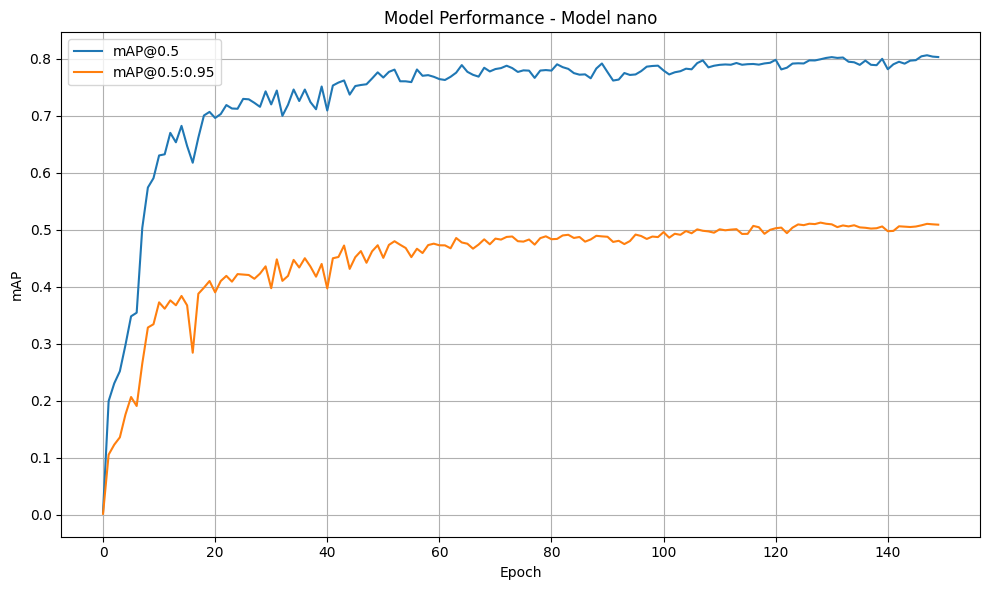

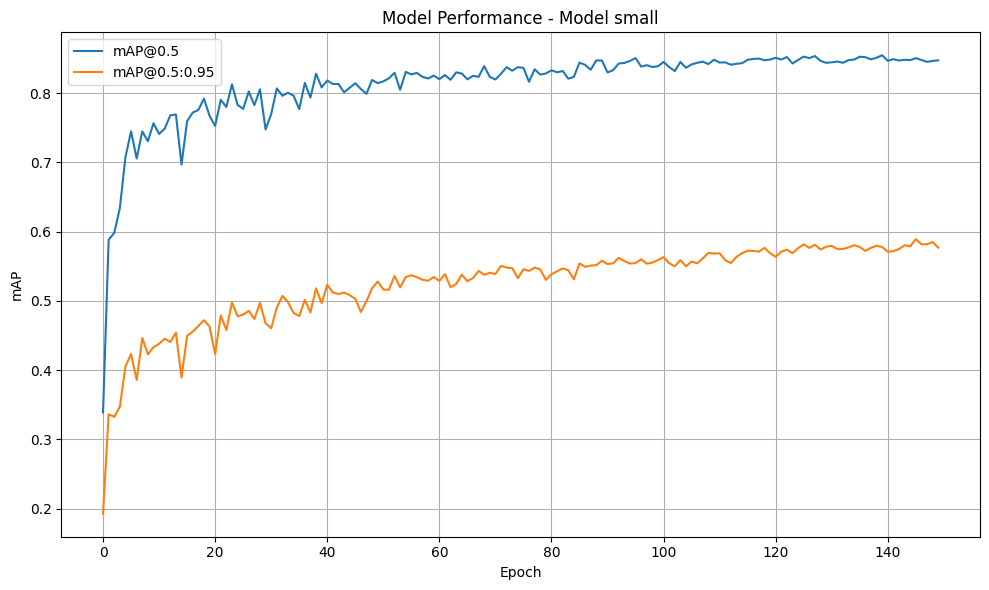

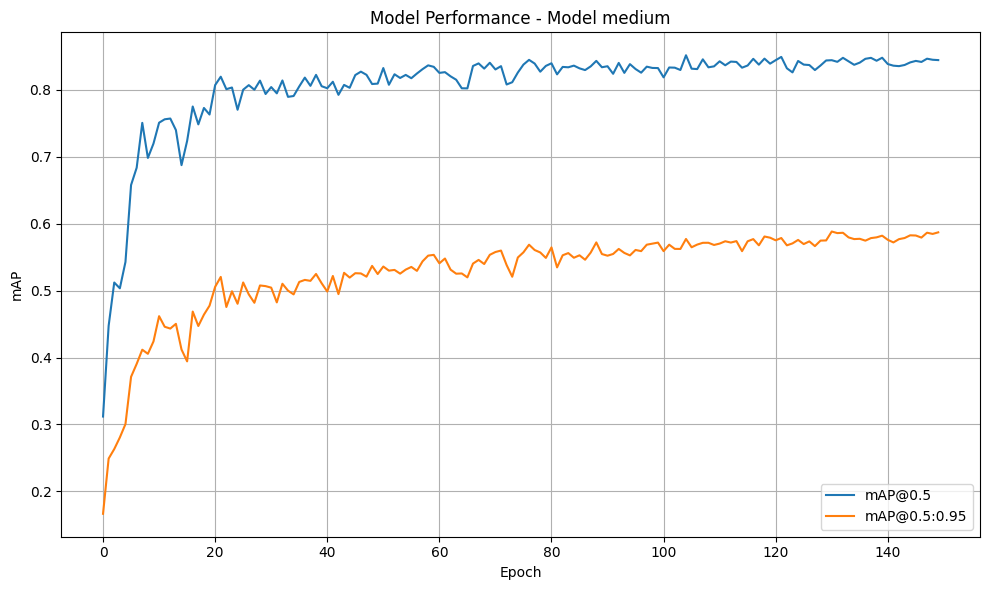

In [27]:
# Visualize mAP vs Epoch
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_mixed_all_class}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_mixed_all_class}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

#### Player and Ball Class

In [7]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 150
batch = 16 # Jika ingin limitasi GPU menggunakan -1
device = [0]
data_path_mixed_player_and_ball_class = "dataset/mixed/player_and_ball_class"
project_base_mixed_player_and_ball_class = "results/mixed/player_and_ball_class"

In [8]:
def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

In [11]:
# Training and Evaluating Using Test Set
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_mixed_player_and_ball_class}/data.yaml",
        epochs=epochs,
        imgsz=640,
        batch=batch,
        project=f"{project_base_mixed_player_and_ball_class}/training",
        name=f"{size}",
        exist_ok=True,
        device=device
    )
    measure_and_save_time(start_time, f"{project_base_mixed_player_and_ball_class}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_mixed_player_and_ball_class}/training/summary/metrics/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_mixed_player_and_ball_class}/data.yaml",
        imgsz=640,
        project=f"{project_base_mixed_player_and_ball_class}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_mixed_player_and_ball_class}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mixed/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/train/labels... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<00:00, 1269.01it/s]


train: New cache created: /kaggle/working/dataset/mixed/player_and_ball_class/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 596.5±350.6 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1286.39it/s]

val: New cache created: /kaggle/working/dataset/mixed/player_and_ball_class/valid/labels.cache


Plotting labels to results/mixed/player_and_ball_class/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/player_and_ball_class/training/nano
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150         3G      1.744      2.318     0.9582         82        640: 100%|██████████| 41/41 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100       2262    0.00878      0.075     0.0324     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.02G      1.625      1.086     0.9201        130        640: 100%|██████████| 41/41 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        100       2262      0.797      0.421      0.368      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.41G      1.503     0.9434        0.9        122        640: 100%|██████████| 41/41 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        100       2262      0.941      0.405      0.441       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.42G      1.557     0.9411     0.9001         51        640: 100%|██████████| 41/41 [00:07<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        100       2262      0.956      0.432      0.465      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.44G      1.465     0.8688      0.889         67        640: 100%|██████████| 41/41 [00:07<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        100       2262      0.941      0.417      0.457      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.46G      1.419     0.8289     0.8785        112        640: 100%|██████████| 41/41 [00:07<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        100       2262      0.964      0.445      0.475      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.47G      1.395     0.7977      0.879        126        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        100       2262      0.962      0.433      0.477      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.48G      1.332     0.7684     0.8735        166        640: 100%|██████████| 41/41 [00:07<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all        100       2262       0.96      0.443      0.492        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       3.5G      1.382     0.7705     0.8784        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.966      0.441      0.519      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.52G      1.351       0.76     0.8737        210        640: 100%|██████████| 41/41 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        100       2262      0.968      0.447      0.538      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.53G      1.298     0.7315     0.8653         97        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.976       0.45      0.544       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.54G      1.321     0.7236     0.8658         60        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        100       2262       0.96       0.45      0.554      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.56G      1.323     0.7171     0.8639        127        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       2262      0.976      0.456      0.557      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.57G      1.333     0.7077     0.8658        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        100       2262      0.846      0.519      0.568      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.59G      1.334     0.7095     0.8701        106        640: 100%|██████████| 41/41 [00:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.679      0.526      0.562      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       3.6G      1.295     0.7032     0.8604         79        640: 100%|██████████| 41/41 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        100       2262      0.613      0.554       0.55      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.62G      1.249     0.6754     0.8549        146        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        100       2262      0.642      0.522      0.541      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.83G      1.308     0.6958     0.8661        118        640: 100%|██████████| 41/41 [00:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.585      0.533      0.536      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.84G       1.25     0.6676     0.8573        172        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.746      0.586      0.604      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.85G       1.24     0.6547     0.8556        143        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262      0.745       0.59      0.597      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.87G      1.293     0.6595     0.8638         47        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        100       2262      0.681      0.553      0.571      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.89G      1.249     0.6462     0.8502        121        640: 100%|██████████| 41/41 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100       2262      0.759      0.584      0.608      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       3.9G      1.214     0.6308     0.8551         77        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        100       2262      0.744       0.59      0.598      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.91G      1.194     0.6194     0.8472         98        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.778      0.577      0.588      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.93G      1.192       0.62     0.8494         79        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        100       2262      0.806      0.595      0.605      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.95G      1.233     0.6342      0.857        124        640: 100%|██████████| 41/41 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        100       2262      0.815      0.531      0.592      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.96G      1.239     0.6412     0.8574         97        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.634      0.577      0.585      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.97G       1.17     0.6098     0.8474         57        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        100       2262      0.737      0.591      0.612      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.99G      1.198     0.6239     0.8518         42        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all        100       2262      0.806      0.586      0.611      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.01G       1.25     0.6289     0.8551        168        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       2262      0.926      0.568      0.615      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.02G      1.211     0.6127     0.8556        131        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262      0.789      0.588      0.623      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.03G      1.213     0.6149     0.8494        164        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262        0.8      0.577      0.616       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.05G      1.179     0.6112     0.8478        111        640: 100%|██████████| 41/41 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        100       2262      0.866       0.59      0.639      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.06G      1.193     0.6158     0.8467        117        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       2262      0.829      0.575      0.631      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.08G      1.174     0.5981     0.8415         71        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        100       2262      0.814      0.598      0.637      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.09G      1.206     0.6091     0.8419         86        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       2262      0.814      0.587      0.615      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.11G       1.15     0.5815     0.8422         77        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        100       2262      0.899      0.587      0.631      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.12G      1.171     0.5889     0.8408        198        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.881      0.596      0.634      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.14G      1.169     0.5934     0.8452         43        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        100       2262       0.82      0.602      0.635      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.14G      1.142     0.5661     0.8417        184        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        100       2262      0.861      0.589      0.639      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.17G       1.17     0.5792     0.8383        154        640: 100%|██████████| 41/41 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        100       2262      0.892      0.605      0.653      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.18G      1.142     0.5672      0.839         72        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        100       2262      0.807        0.6      0.635      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       4.2G      1.152     0.5766      0.844        116        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        100       2262      0.742      0.603      0.638      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       4.2G      1.126     0.5734      0.838         92        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.855      0.605      0.637      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.23G      1.141     0.5691      0.839        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       2262      0.849      0.599      0.624      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.24G      1.115     0.5628     0.8348        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       2262      0.745      0.602       0.63      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.26G       1.12     0.5652     0.8354         76        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        100       2262      0.784      0.586      0.634        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.26G        1.1      0.547     0.8392        113        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.868      0.603      0.652      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.29G      1.116     0.5485     0.8323        177        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.832      0.603      0.647      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       4.3G       1.11     0.5532     0.8335        110        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.943      0.584      0.652      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.32G      1.177     0.5686     0.8437         87        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        100       2262      0.789      0.593      0.622      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.32G      1.189     0.5695     0.8483        120        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        100       2262       0.76      0.604      0.638      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.35G      1.111     0.5534     0.8351         73        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        100       2262      0.865      0.614      0.663      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.36G       1.09     0.5478     0.8316        126        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        100       2262      0.779      0.628      0.658      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.38G       1.11     0.5544     0.8366         61        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100       2262      0.824      0.609      0.633      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.38G      1.117     0.5481     0.8348        106        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.788      0.611      0.646      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       4.4G      1.101     0.5476     0.8339        112        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.829      0.594      0.651      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.42G      1.128     0.5541     0.8319         54        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       2262       0.83      0.624      0.658      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.43G      1.112     0.5449     0.8366        153        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        100       2262      0.878      0.609      0.652      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.44G      1.122     0.5462     0.8324        219        640: 100%|██████████| 41/41 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       2262      0.878      0.622      0.672      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.46G       1.07     0.5349     0.8339        113        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.844      0.626      0.654      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.48G      1.118     0.5468     0.8315        159        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100       2262      0.812      0.617      0.657      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.69G       1.09     0.5451     0.8325        100        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       2262       0.72      0.625      0.642      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       4.7G      1.098     0.5464     0.8314         64        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        100       2262      0.775       0.63      0.665      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.72G      1.057     0.5222     0.8303         77        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        100       2262      0.834      0.606      0.644      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.73G      1.099     0.5467     0.8295        178        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        100       2262      0.755       0.61      0.644      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.75G      1.085     0.5307     0.8272        125        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.789       0.62      0.669      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.76G       1.07     0.5321     0.8267         75        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        100       2262      0.779      0.607      0.626      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.78G      1.101     0.5377     0.8316        133        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262      0.723      0.594      0.624      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.79G      1.126      0.543      0.829        106        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        100       2262       0.72        0.6      0.628      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.81G      1.071     0.5268     0.8272        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        100       2262      0.836      0.602      0.645      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.81G      1.046     0.5103     0.8261        118        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        100       2262      0.842      0.594       0.64      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.84G      1.061     0.5197     0.8264        109        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.813      0.628      0.661      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.85G      1.053     0.5243     0.8281         72        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262      0.895      0.622      0.679      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.87G      1.045     0.5165     0.8249        141        640: 100%|██████████| 41/41 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        100       2262      0.789      0.645      0.659      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.88G      1.035     0.5091     0.8255        149        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        100       2262      0.738      0.642      0.662      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       4.9G      1.054     0.5184     0.8248        103        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.826      0.606      0.647      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.91G      1.039     0.5107     0.8247         90        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        100       2262      0.809      0.618       0.67       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.93G      1.044     0.5083     0.8237         52        640: 100%|██████████| 41/41 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.869      0.625      0.667      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.93G      1.031     0.5085     0.8267        110        640: 100%|██████████| 41/41 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        100       2262      0.869      0.631      0.658      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.96G      1.038     0.5139     0.8239         93        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all        100       2262        0.8      0.618      0.638       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.97G      1.017     0.5046     0.8253        115        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        100       2262      0.786      0.626       0.67      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.99G      1.014     0.5013     0.8221        102        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        100       2262      0.799      0.627      0.656       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.99G      1.055     0.5209     0.8263        133        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262      0.836      0.656      0.671      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.02G      1.041     0.5133     0.8288        130        640: 100%|██████████| 41/41 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.743      0.621       0.63      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.03G      1.036     0.5069     0.8248         67        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        100       2262      0.761      0.638      0.657      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.05G      1.046      0.517      0.827         50        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        100       2262       0.78      0.643      0.672      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.05G      1.021     0.4965     0.8247        175        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262       0.81      0.646      0.678      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.08G      1.011     0.4995     0.8235         74        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       2262      0.846      0.631      0.674      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.09G      1.027      0.509     0.8216        130        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        100       2262      0.793      0.618       0.64      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.11G      1.053     0.5146     0.8268        174        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        100       2262      0.722      0.642       0.66      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.11G       1.02     0.5033     0.8206        166        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       2262      0.801      0.619      0.659      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.13G      1.021     0.4994     0.8209        136        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        100       2262      0.773      0.631       0.66      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.15G      1.001     0.4946     0.8239        218        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all        100       2262      0.818      0.623      0.653      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.16G      1.013     0.4978     0.8238        154        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.733      0.634      0.644      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.17G      1.047     0.5114     0.8204        108        640: 100%|██████████| 41/41 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        100       2262      0.776      0.646      0.661      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.19G      1.011     0.4902     0.8227         93        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        100       2262      0.805      0.618      0.662      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.21G     0.9997     0.4885     0.8196        135        640: 100%|██████████| 41/41 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       2262      0.874      0.626      0.666      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.22G     0.9927     0.4869     0.8206        153        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        100       2262      0.792      0.645      0.672       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.23G     0.9988     0.4875      0.819        114        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.775      0.646      0.661      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.25G     0.9898     0.4819     0.8192         80        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       2262      0.872       0.62      0.662      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.27G     0.9914     0.4829       0.82         51        640: 100%|██████████| 41/41 [00:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.759       0.63      0.658      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.28G     0.9974     0.4867     0.8205        132        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        100       2262      0.761      0.645      0.662      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.29G     0.9742     0.4797      0.819         93        640: 100%|██████████| 41/41 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.763      0.643      0.665      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.31G     0.9618     0.4825     0.8162        107        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       2262      0.781      0.637      0.658      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.33G      1.011     0.4931      0.819        165        640: 100%|██████████| 41/41 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        100       2262      0.803      0.653      0.675      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.34G     0.9896     0.4828     0.8172        125        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        100       2262      0.807      0.639      0.671      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.35G      0.976      0.479     0.8191        148        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        100       2262      0.822      0.635      0.677      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.37G     0.9856     0.4793     0.8183        123        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        100       2262      0.774      0.651      0.673      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.39G       0.98     0.4825     0.8232        171        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        100       2262      0.783      0.651      0.669      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       5.4G     0.9657     0.4747     0.8164         56        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       2262      0.815      0.636      0.659       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.41G     0.9888     0.4853     0.8201         65        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.788      0.632      0.654      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.43G     0.9749     0.4796     0.8187        119        640: 100%|██████████| 41/41 [00:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        100       2262      0.814      0.629      0.664       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.45G     0.9662     0.4741      0.818         76        640: 100%|██████████| 41/41 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        100       2262       0.81      0.611      0.659      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.46G     0.9681     0.4756      0.817        146        640: 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100       2262       0.81      0.634      0.664      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.47G     0.9826     0.4788     0.8156        149        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        100       2262      0.795      0.649      0.671      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.49G      0.968     0.4707     0.8154        102        640: 100%|██████████| 41/41 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        100       2262      0.794      0.647      0.672      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.51G     0.9717     0.4765     0.8159        159        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262      0.842      0.645      0.676       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.52G     0.9811     0.4778     0.8181        111        640: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       2262      0.862      0.625      0.677      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.53G     0.9673     0.4695     0.8183        129        640: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all        100       2262      0.834      0.635      0.675      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.55G     0.9563     0.4694     0.8145        150        640: 100%|██████████| 41/41 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        100       2262      0.885      0.629      0.675       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.56G     0.9494     0.4662     0.8139         96        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        100       2262      0.846      0.635      0.662      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.58G     0.9524     0.4619     0.8146        102        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        100       2262      0.783      0.638      0.668      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.59G     0.9453     0.4637     0.8159        119        640: 100%|██████████| 41/41 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262      0.808      0.636      0.672      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.61G     0.9554     0.4648     0.8138        157        640: 100%|██████████| 41/41 [00:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100       2262      0.832      0.642      0.675      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.62G     0.9314     0.4576     0.8136         75        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.849      0.634      0.687      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.64G     0.9407     0.4609     0.8147         65        640: 100%|██████████| 41/41 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        100       2262      0.814      0.652      0.672      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.64G     0.9481     0.4624     0.8137         96        640: 100%|██████████| 41/41 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        100       2262      0.842      0.645      0.688      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.67G     0.9419     0.4583     0.8161        131        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       2262      0.828      0.664      0.686       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.68G     0.9423     0.4619     0.8126         69        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262       0.83      0.647      0.679      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       5.7G      0.925     0.4523     0.8098        123        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.771      0.647      0.672      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150       5.7G     0.9253      0.453      0.816         43        640: 100%|██████████| 41/41 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        100       2262      0.818      0.646      0.671      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.73G     0.9226     0.4524      0.813         81        640: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all        100       2262      0.806      0.647      0.675      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.74G     0.9386     0.4606     0.8115         89        640: 100%|██████████| 41/41 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        100       2262        0.8      0.647      0.675      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.76G     0.9245     0.4483      0.808        135        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       2262      0.813      0.664      0.683      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.76G     0.9294     0.4522     0.8147         82        640: 100%|██████████| 41/41 [00:07<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        100       2262       0.82      0.659      0.679      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.79G     0.9294     0.4572     0.8136        150        640: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        100       2262      0.811      0.652      0.678      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       5.8G     0.9531     0.4669     0.8132         96        640: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       2262      0.809       0.64      0.672      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.82G     0.9172     0.4519     0.8138        101        640: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        100       2262       0.82      0.645      0.675      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.82G     0.9185      0.448     0.8108         82        640: 100%|██████████| 41/41 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        100       2262       0.79      0.646      0.674      0.437


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.85G     0.8825     0.4416     0.8129         85        640: 100%|██████████| 41/41 [00:08<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        100       2262      0.822      0.644      0.666      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.86G     0.8661      0.433     0.8123         71        640: 100%|██████████| 41/41 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.824      0.635      0.672      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.88G     0.8606     0.4308     0.8103         88        640: 100%|██████████| 41/41 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        100       2262      0.775      0.656      0.665      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.88G      0.871     0.4336     0.8121         66        640: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        100       2262      0.809      0.648       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       5.9G     0.8579     0.4326     0.8112         69        640: 100%|██████████| 41/41 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       2262      0.822      0.642      0.675      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.92G     0.8544     0.4259     0.8102         80        640: 100%|██████████| 41/41 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        100       2262        0.8      0.642       0.67      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.94G     0.8552      0.426     0.8098         87        640: 100%|██████████| 41/41 [00:06<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        100       2262      0.803      0.643      0.669      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.94G     0.8526     0.4236     0.8093         95        640: 100%|██████████| 41/41 [00:07<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       2262       0.81       0.65      0.677      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.96G      0.845     0.4222     0.8115         95        640: 100%|██████████| 41/41 [00:06<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       2262      0.828      0.652      0.679      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.98G     0.8526     0.4227     0.8102         94        640: 100%|██████████| 41/41 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        100       2262      0.822      0.652      0.683      0.439



150 epochs completed in 0.352 hours.
Optimizer stripped from results/mixed/player_and_ball_class/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/mixed/player_and_ball_class/training/nano/weights/best.pt, 5.5MB

Validating results/mixed/player_and_ball_class/training/nano/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262      0.833       0.65      0.692      0.442
                  ball         90         90       0.73      0.331      0.396      0.159
                player        100       2172      0.936      0.969      0.988      0.726
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to results/mixed/player_and_ball_class/training/nano
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1061.6±441.2 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 1352.01it/s]

val: New cache created: /kaggle/working/dataset/mixed/player_and_ball_class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.782      0.618      0.642      0.425
                  ball         44         45      0.663      0.262        0.3       0.12
                player         50       1134      0.901      0.973      0.984      0.731
Speed: 7.3ms preprocess, 38.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to results/mixed/player_and_ball_class/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mixed/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0

train: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/train/labels.cache... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 269.1±53.1 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/mixed/player_and_ball_class/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/player_and_ball_class/training/small
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.45G       1.52      1.666     0.9247         82        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        100       2262      0.435      0.414      0.454      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.21G      1.377     0.7758     0.8776        130        640: 100%|██████████| 41/41 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        100       2262      0.582      0.539      0.534      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.21G      1.387       0.76     0.8806        122        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        100       2262      0.462       0.44       0.47      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.21G      1.366     0.7271     0.8721         51        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        100       2262       0.67      0.597       0.58      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.21G      1.309     0.6742     0.8684         67        640: 100%|██████████| 41/41 [00:12<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        100       2262      0.627      0.522      0.523      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.21G      1.333     0.6667     0.8669        112        640: 100%|██████████| 41/41 [00:12<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        100       2262      0.787      0.595      0.619      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.21G      1.242     0.6305     0.8596        126        640: 100%|██████████| 41/41 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        100       2262      0.725      0.588        0.6      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.21G      1.233     0.6243     0.8602        166        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100       2262      0.742      0.624      0.647      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.21G      1.279     0.6244     0.8606        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        100       2262      0.884      0.602      0.657      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.21G      1.241     0.6311     0.8577        210        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100       2262       0.78      0.583      0.628      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.21G      1.253     0.6241     0.8571         97        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.728      0.589      0.634      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.21G      1.217      0.623      0.856         60        640: 100%|██████████| 41/41 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.799       0.62      0.676      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.21G      1.209     0.6112     0.8529        127        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        100       2262      0.829       0.62      0.646      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.21G      1.201     0.6054     0.8474        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.738      0.599      0.632      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.24G      1.189     0.5926     0.8479        106        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.778      0.629      0.651      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.24G      1.156     0.5831     0.8455         79        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262      0.782      0.635      0.674      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.24G      1.197     0.5859     0.8511        146        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        100       2262      0.684      0.603      0.635      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.29G      1.171     0.5792     0.8503        118        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        100       2262       0.81      0.634      0.671      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.29G       1.13     0.5658     0.8436        172        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        100       2262      0.802      0.615      0.687      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.29G      1.164     0.5792     0.8474        143        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        100       2262      0.846       0.59      0.645       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.29G      1.183     0.5884     0.8489         47        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100       2262      0.747      0.601      0.635      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.29G      1.151       0.57     0.8427        121        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        100       2262      0.737      0.606      0.651      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.29G      1.103     0.5413     0.8423         77        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262      0.818      0.578      0.649      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.29G      1.152     0.5668     0.8418         98        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100       2262      0.852      0.623      0.666      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.29G      1.144     0.5651     0.8416         79        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.773      0.637      0.669      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.29G      1.124      0.552     0.8403        124        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.801      0.632      0.676      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.29G      1.112      0.541     0.8393         97        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100       2262      0.745      0.648      0.674      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.29G      1.041     0.5148     0.8319         57        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.802      0.629      0.666      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.29G      1.115     0.5629     0.8418         42        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        100       2262      0.782      0.643      0.699      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.29G        1.1     0.5475     0.8359        168        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        100       2262      0.824      0.637      0.679      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.29G      1.082     0.5319     0.8343        131        640: 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.805      0.625      0.672      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.29G      1.073     0.5294     0.8302        164        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100       2262      0.823      0.642      0.678        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.29G      1.055     0.5312     0.8304        111        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.812      0.631       0.68      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.29G      1.077     0.5293     0.8307        117        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.814      0.644      0.688      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.29G       1.06      0.522     0.8275         71        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        100       2262      0.843      0.638      0.697      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.29G      1.098     0.5397     0.8265         86        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        100       2262      0.837      0.602      0.663      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.29G      1.045     0.5161      0.829         77        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.748      0.648      0.683      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.29G      1.052     0.5132     0.8252        198        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262       0.87      0.653      0.691      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.29G      1.027     0.5023     0.8275         43        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.945      0.661      0.723      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.29G      1.036     0.4977     0.8301        184        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.878      0.642      0.707      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.29G      1.102     0.5288     0.8314        154        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.793      0.649      0.699      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.29G      1.099     0.5416     0.8336         72        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.858      0.655      0.694      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.29G      1.052     0.5162     0.8334        116        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100       2262      0.874      0.634      0.687      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.29G      1.033     0.5083     0.8251         92        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.893       0.64      0.693       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.29G      1.042     0.5085      0.827        103        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        100       2262      0.904      0.642      0.719      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.29G      1.004     0.4944     0.8228        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100       2262       0.85      0.645      0.689      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.29G      1.011     0.4939     0.8225         76        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.919      0.651      0.714      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.29G     0.9992     0.4877     0.8235        113        640: 100%|██████████| 41/41 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.904      0.631      0.699      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.29G      1.009     0.4885     0.8187        177        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.875      0.654      0.696      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.29G      1.003     0.4901     0.8196        110        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.849      0.652      0.697      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.29G      1.023     0.4935     0.8253         87        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262      0.838      0.663      0.715      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.29G      1.018     0.4864      0.823        120        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.838      0.648      0.706      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.29G      1.002     0.4888     0.8229         73        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        100       2262      0.903      0.642      0.702      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.29G     0.9836     0.4832     0.8209        126        640: 100%|██████████| 41/41 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        100       2262      0.916       0.64      0.704      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.29G     0.9784     0.4826     0.8218         61        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.886      0.656      0.711      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.29G      1.007      0.488     0.8193        106        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.837      0.667      0.715      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.29G     0.9918     0.4853     0.8222        112        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.793      0.653      0.671      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.29G      1.034     0.4981     0.8223         54        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.798      0.664      0.713       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.29G     0.9759     0.4806      0.821        153        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        100       2262       0.83      0.666      0.718      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.29G      1.001     0.4788     0.8179        219        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.885      0.669      0.717      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.29G     0.9622     0.4726     0.8196        113        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.869      0.669      0.711      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.29G      1.001     0.4783     0.8169        159        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.891      0.659       0.71      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.29G     0.9779     0.4805     0.8197        100        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.783      0.652      0.692       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.29G      1.004     0.4898       0.82         64        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100       2262      0.864      0.635      0.712      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.29G     0.9591     0.4667     0.8195         77        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.878      0.654      0.699       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.29G     0.9897     0.4823     0.8181        178        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        100       2262      0.919      0.644      0.729      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.29G     0.9911     0.4767     0.8167        125        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.933       0.66      0.712      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.29G     0.9516     0.4656     0.8147         75        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.916      0.663      0.719      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.29G      0.991     0.4776     0.8184        133        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100       2262      0.866      0.671      0.716      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.29G     0.9701     0.4695     0.8129        106        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.931      0.661      0.738      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.29G     0.9453     0.4565     0.8142        114        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.891      0.656      0.729       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.29G      0.949     0.4509     0.8166        118        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.859      0.654      0.703      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.29G      0.952      0.457      0.815        109        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        100       2262      0.864      0.665      0.703      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.29G     0.9409     0.4638     0.8157         72        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.883      0.659       0.72      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.29G     0.9319     0.4556     0.8121        141        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.945      0.652      0.715       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.29G     0.9286     0.4515      0.813        149        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100       2262      0.874      0.654      0.732      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.29G     0.9489     0.4619     0.8125        103        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.829       0.67      0.717       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.32G     0.9249      0.448      0.813         90        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.828      0.679      0.727      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.32G     0.9319     0.4511     0.8113         52        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.851      0.676      0.713      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.32G     0.9178     0.4465     0.8132        110        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.866       0.66      0.713      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.32G     0.9401     0.4529     0.8122         93        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.854      0.647      0.708      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.32G     0.9202      0.446     0.8137        115        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.893      0.668      0.725      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.32G     0.9128     0.4429     0.8092        102        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.892       0.67       0.73      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.32G     0.9268     0.4503     0.8122        133        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.887      0.663      0.726      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.32G     0.9302     0.4482      0.817        130        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.877      0.671      0.731      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.32G     0.9304     0.4507     0.8118         67        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.859       0.67       0.73      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.32G     0.9232     0.4531     0.8142         50        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262       0.84      0.661      0.721      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.32G      0.901     0.4324     0.8119        175        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        100       2262      0.924      0.655      0.731      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.32G     0.8992     0.4408     0.8104         74        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.911      0.651      0.715       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.32G     0.9143     0.4458     0.8083        130        640: 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.897      0.649      0.707      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.32G     0.9452     0.4553      0.814        174        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100       2262      0.904      0.678      0.726       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.32G     0.9101     0.4456     0.8085        166        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.833      0.676      0.715      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.32G     0.9016     0.4391     0.8075        136        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100       2262      0.886      0.683       0.73      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.32G     0.8935     0.4409     0.8108        218        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.872      0.682      0.727      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.32G      0.903     0.4401     0.8113        154        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.875      0.667       0.74      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.32G     0.8989     0.4372     0.8069        108        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262      0.862      0.685      0.726      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.32G      0.878     0.4215     0.8094         93        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.837       0.66       0.72      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.32G      0.877     0.4281     0.8077        135        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.905       0.67      0.745      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.32G     0.8748      0.429     0.8082        153        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.887       0.68      0.739      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.32G     0.8902     0.4338     0.8085        114        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.863      0.677      0.736      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.32G      0.882     0.4276     0.8074         80        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100       2262      0.854      0.676      0.738      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.32G     0.8797     0.4255     0.8082         51        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.851       0.68       0.73      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.32G     0.8841     0.4305     0.8083        132        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.901      0.663       0.72      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.32G     0.8669     0.4244     0.8072         93        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262      0.924      0.677      0.731      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.32G     0.8637     0.4235     0.8062        107        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.963      0.691       0.75      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.32G     0.8926     0.4287     0.8068        165        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.829      0.681      0.723      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.32G     0.8793     0.4235     0.8051        125        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.879      0.687      0.738      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.32G      0.865     0.4211      0.806        148        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100       2262      0.884       0.68      0.741      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.32G     0.8606      0.414     0.8053        123        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.914      0.678       0.74      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.32G     0.8516     0.4157     0.8092        171        640: 100%|██████████| 41/41 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        100       2262      0.883      0.681      0.729      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.32G     0.8619     0.4177     0.8046         56        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.928      0.666      0.729      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.32G     0.8637     0.4184     0.8068         65        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        100       2262      0.874      0.693      0.742      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.32G     0.8605     0.4197     0.8056        119        640: 100%|██████████| 41/41 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.864      0.672      0.738      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.32G      0.854     0.4142     0.8062         76        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.865      0.686      0.742      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.32G     0.8467     0.4103     0.8045        146        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.863      0.681      0.732      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.32G     0.8583     0.4115      0.802        149        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262        0.9      0.682      0.739      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.32G     0.8482     0.4086     0.8021        102        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        100       2262      0.875      0.683      0.742      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.32G     0.8513     0.4167     0.8031        159        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.925      0.684      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.32G     0.8624     0.4183     0.8054        111        640: 100%|██████████| 41/41 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.904      0.669      0.733      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.32G     0.8437     0.4066     0.8044        129        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100       2262       0.92      0.677      0.739      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.32G     0.8328     0.4069     0.8016        150        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.893      0.681      0.735      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.32G     0.8218     0.4021     0.8017         96        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.903       0.68      0.748      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.32G     0.8133      0.396     0.8008        102        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.877      0.684      0.727      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.32G     0.8236     0.4012     0.8044        119        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        100       2262      0.942      0.677      0.741      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.32G     0.8381     0.4056     0.8017        157        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.953      0.692      0.756      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.32G     0.8076     0.3945     0.8003         75        640: 100%|██████████| 41/41 [00:12<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.933      0.691      0.747      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.32G     0.8223     0.3958      0.802         65        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.923      0.692      0.757      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.32G     0.8258      0.398     0.8006         96        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100       2262      0.927      0.678       0.74      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.32G     0.8163     0.3929     0.8037        131        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.894      0.679       0.73      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.32G     0.8208     0.3977     0.7995         69        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100       2262      0.877      0.681      0.729      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.32G     0.8074     0.3905     0.7985        123        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100       2262      0.906      0.679       0.75      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.32G     0.8102     0.3909     0.8043         43        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262      0.894      0.685       0.74      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.32G     0.7969     0.3874     0.8005         81        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100       2262      0.943      0.683      0.739      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.32G     0.8159     0.3964     0.7993         89        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.916      0.691      0.747       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.32G     0.8049     0.3879     0.7969        135        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.901      0.691      0.745      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.32G        0.8     0.3869     0.8026         82        640: 100%|██████████| 41/41 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.935      0.679      0.749      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.32G     0.8008     0.3911     0.8002        150        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        100       2262       0.94      0.685      0.754      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.32G      0.831     0.4019     0.8008         96        640: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.924      0.687      0.748      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.32G     0.8028     0.3921     0.8023        101        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.948      0.683      0.745      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.32G     0.7925     0.3844      0.798         82        640: 100%|██████████| 41/41 [00:12<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262      0.938      0.685      0.751      0.507


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.32G     0.7657     0.3803     0.8003         85        640: 100%|██████████| 41/41 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        100       2262       0.92      0.685      0.743      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.32G     0.7587     0.3779     0.7999         71        640: 100%|██████████| 41/41 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100       2262       0.91      0.681      0.738      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.32G     0.7508     0.3724     0.7973         88        640: 100%|██████████| 41/41 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.911      0.685      0.739      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.32G     0.7579     0.3755     0.7997         66        640: 100%|██████████| 41/41 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100       2262      0.919      0.685      0.742      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.32G     0.7444     0.3722     0.7984         69        640: 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        100       2262      0.931      0.686      0.744        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.32G     0.7409     0.3675     0.7971         80        640: 100%|██████████| 41/41 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        100       2262      0.928      0.686       0.75      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.32G     0.7369     0.3662     0.7965         87        640: 100%|██████████| 41/41 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100       2262      0.926       0.68      0.742      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.32G     0.7323     0.3635     0.7966         95        640: 100%|██████████| 41/41 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100       2262      0.938      0.685      0.748      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.32G     0.7317     0.3613      0.799         95        640: 100%|██████████| 41/41 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100       2262      0.944      0.688      0.754      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.32G     0.7382     0.3648     0.7975         94        640: 100%|██████████| 41/41 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100       2262      0.945      0.689      0.754      0.503



150 epochs completed in 0.574 hours.
Optimizer stripped from results/mixed/player_and_ball_class/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/mixed/player_and_ball_class/training/small/weights/best.pt, 19.2MB

Validating results/mixed/player_and_ball_class/training/small/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262      0.938      0.685      0.751      0.507
                  ball         90         90      0.905        0.4      0.511      0.255
                player        100       2172       0.97       0.97      0.991      0.758
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 17.2ms postprocess per image
Results saved to results/mixed/player_and_ball_class/training/small
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 939.4±513.0 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/test/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.861      0.666       0.72      0.474
                  ball         44         45      0.781      0.356      0.452      0.184
                player         50       1134       0.94      0.976      0.988      0.764
Speed: 4.5ms preprocess, 36.4ms inference, 0.0ms loss, 21.0ms postprocess per image
Results saved to results/mixed/player_and_ball_class/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mixed/player_and_ball_class/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasi

train: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/train/labels.cache... 644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 644/644 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 310.0±63.0 MB/s, size: 61.7 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/mixed/player_and_ball_class/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to results/mixed/player_and_ball_class/training/medium
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       8.2G       1.51      1.544      0.918         82        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        100       2262      0.548      0.529      0.509      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.17G      1.474     0.8406     0.8982        130        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        100       2262      0.316      0.418      0.326      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.33G      1.465     0.7545     0.9005        122        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100       2262      0.483      0.371       0.31      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.28G      1.455     0.7622     0.8965         51        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        100       2262      0.612      0.551      0.518       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.29G      1.312     0.7001     0.8746         67        640: 100%|██████████| 41/41 [00:26<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100       2262       0.65      0.363        0.4      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       8.3G      1.297     0.6882      0.865        112        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.919      0.507      0.612      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.26G       1.26     0.6447     0.8708        126        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        100       2262      0.774       0.62      0.633      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.24G      1.224     0.6305      0.864        166        640: 100%|██████████| 41/41 [00:26<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100       2262      0.819      0.568      0.626      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.32G       1.31      0.652     0.8692        115        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.806      0.549      0.606      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.23G      1.282     0.6488     0.8637        210        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.784      0.597      0.617       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.17G      1.198     0.6049     0.8618         97        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.674      0.637      0.627      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.18G      1.254     0.6201     0.8659         60        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100       2262      0.675      0.614       0.62      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.21G      1.287     0.6465     0.8665        127        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.648       0.58      0.582      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.28G      1.177      0.607     0.8521        115        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100       2262      0.687        0.6      0.617      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.28G      1.198     0.5894     0.8534        106        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.643        0.6       0.58      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.23G      1.196     0.5902     0.8555         79        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.729      0.581      0.629      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.26G      1.163     0.5628     0.8503        146        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.727      0.603      0.623      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.27G      1.137     0.5653     0.8495        118        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100       2262      0.807      0.611      0.665      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.28G      1.107     0.5465     0.8419        172        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.807      0.611      0.677      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.22G      1.091     0.5321     0.8402        143        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100       2262      0.706      0.639      0.648      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.28G      1.154     0.5591     0.8513         47        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.785       0.61      0.651      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       8.3G      1.143     0.5603     0.8454        121        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.816       0.59      0.647      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.28G      1.172     0.5703     0.8505         77        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        100       2262      0.656      0.606      0.612      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       8.2G      1.155     0.5737     0.8437         98        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.742      0.654      0.683      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.22G      1.078     0.5312     0.8392         79        640: 100%|██████████| 41/41 [00:25<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.766      0.657       0.68      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.21G       1.15     0.5586     0.8492        124        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262        0.8      0.625      0.659      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.24G      1.117     0.5678     0.8454         97        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.749      0.633      0.629      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.21G      1.099     0.5465     0.8414         57        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.812      0.634       0.68      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.28G      1.103     0.5518     0.8455         42        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.798      0.632      0.676       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.36G      1.086     0.5322     0.8388        168        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.779       0.64      0.665       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.25G      1.081     0.5318     0.8412        131        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262       0.78      0.608      0.637      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.17G      1.113     0.5431     0.8374        164        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.775      0.623      0.652       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.32G       1.03     0.5111     0.8339        111        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.844       0.64      0.686      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       8.2G       1.07     0.5206     0.8334        117        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        100       2262      0.736      0.631      0.625      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.32G       1.05     0.5077     0.8308         71        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100       2262      0.747      0.652       0.68      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.23G      1.064     0.5174     0.8285         86        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.792      0.599      0.688      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.31G      1.019     0.4953     0.8308         77        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.738      0.647      0.692       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.31G       1.05     0.5127     0.8305        198        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.786      0.619      0.668      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.25G      1.065      0.519     0.8344         43        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.734      0.673      0.681      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.25G      1.035     0.4982     0.8322        184        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262       0.79      0.645      0.675      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.33G      1.029     0.4858      0.825        154        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.736      0.658      0.663      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.34G      1.007     0.4983     0.8267         72        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.757      0.661      0.681      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.26G      1.017     0.4944      0.833        116        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.812      0.655      0.697      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.21G      1.045     0.5051     0.8301         92        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.766      0.655      0.683      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.14G      1.042     0.4949     0.8293        103        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.831      0.643      0.698      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.33G     0.9851     0.4721      0.823        115        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262       0.83      0.659      0.686      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.28G     0.9733      0.473     0.8225         76        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        100       2262      0.865      0.655      0.698      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       8.2G      1.004     0.4871     0.8287        113        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.848      0.659       0.71       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.31G      1.006      0.486     0.8227        177        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.845      0.644      0.696      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.25G     0.9801     0.4761     0.8218        110        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.821      0.663      0.698      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.29G      1.005     0.4936     0.8258        126        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.772      0.631      0.682       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.28G     0.9756     0.4798     0.8265         61        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.776      0.655      0.673      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.23G     0.9812     0.4756      0.821        106        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.763      0.655      0.685      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.32G     0.9799     0.4743     0.8251        112        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100       2262      0.807      0.647      0.683      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       8.3G      1.022     0.4848     0.8231         54        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.794      0.679      0.681      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       8.3G     0.9687     0.4665     0.8214        153        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.858      0.677       0.71      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.18G     0.9579     0.4577     0.8162        219        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.875      0.652      0.712      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.36G     0.9331      0.456      0.821        113        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.872      0.655      0.726      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.35G     0.9655     0.4613     0.8195        159        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.859      0.644       0.72      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.29G     0.9477     0.4634     0.8203        100        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.848      0.638      0.692      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.11G     0.9572     0.4688     0.8189         64        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.789      0.664      0.684      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.28G     0.9354     0.4553     0.8179         77        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.871      0.646      0.709      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.23G     0.9419     0.4541     0.8161        178        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.817      0.678      0.724      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.29G     0.9634     0.4537     0.8156        125        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.859      0.682      0.732      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       8.3G     0.9425     0.4518     0.8143         75        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.869      0.665      0.721      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.37G     0.9907     0.4658     0.8192        133        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.872      0.644      0.709      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.33G     0.9298     0.4487     0.8108        106        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.869      0.666      0.724       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      8.31G     0.9097      0.435     0.8126        114        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.898      0.661      0.722      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.24G     0.9104     0.4351     0.8148        118        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262       0.85      0.642      0.702      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.25G     0.9288     0.4455     0.8147        109        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.908      0.667      0.743      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.29G     0.9345     0.4532     0.8175         72        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.855      0.673      0.724      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.32G     0.9187     0.4389     0.8133        141        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.873      0.665      0.721      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       8.2G      0.884     0.4266     0.8111        149        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.788       0.66      0.712      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.24G     0.9048     0.4384     0.8119        103        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.878      0.645      0.709      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.29G     0.9032     0.4378     0.8131         90        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.857      0.628      0.692      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.31G     0.8998     0.4366     0.8129         52        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.789      0.656      0.682      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.23G      0.896     0.4379     0.8138        110        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.886      0.638      0.719      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.37G     0.9149     0.4422     0.8134         93        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.852      0.649      0.694      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.34G     0.8821     0.4232     0.8126        115        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.835      0.656       0.71      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.33G     0.8938     0.4332     0.8105        102        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.842      0.651      0.701      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.24G     0.9008     0.4342     0.8127        133        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.871      0.675      0.703      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.34G     0.8924      0.427      0.814        130        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.846      0.628      0.688      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.26G     0.8839     0.4236     0.8098         67        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.861      0.658      0.721      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.22G     0.8939     0.4343     0.8121         50        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.843       0.66      0.706      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.28G     0.8827     0.4158     0.8112        175        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.885      0.656      0.704      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.28G     0.8744     0.4227     0.8107         74        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.864      0.681       0.73      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.33G     0.8917     0.4285     0.8068        130        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.853      0.682      0.717      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.26G     0.8841     0.4225      0.811        174        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262       0.85      0.678      0.718      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.24G     0.8562     0.4133     0.8056        166        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.842      0.678      0.732      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      8.19G     0.8557     0.4103     0.8045        136        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.822      0.662       0.71      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.24G     0.8296     0.4059      0.807        218        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.866      0.659      0.716      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.26G     0.8446     0.4068     0.8076        154        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100       2262      0.845       0.67      0.714      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.18G      0.877      0.421     0.8058        108        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.887      0.668      0.713      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.25G     0.8483     0.4052     0.8076         93        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.856      0.676      0.706      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.31G      0.843     0.4102     0.8058        135        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.898       0.66       0.73      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.19G     0.8718     0.4268     0.8087        153        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.846      0.668      0.701      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.11G     0.8429     0.4141     0.8039        114        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.814       0.65       0.71      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       8.2G      0.837      0.405     0.8064         80        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.806      0.674      0.704      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.34G     0.8527     0.4101     0.8074         51        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.838      0.658      0.724      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.26G     0.8385     0.4082     0.8065        132        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262       0.84      0.675      0.721      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.14G     0.8334     0.4087     0.8059         93        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.819      0.678      0.713      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       8.3G      0.826     0.4022     0.8041        107        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.844       0.66      0.726      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.21G     0.8555     0.4097     0.8042        165        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.865      0.669      0.735      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.29G     0.8301     0.4001     0.8021        125        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262       0.84       0.68      0.732      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.22G     0.8397      0.404     0.8047        148        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.868      0.658      0.743      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.36G     0.8301     0.3943      0.803        123        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.844      0.672       0.72      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.28G     0.8349     0.3999     0.8076        171        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.896      0.664      0.715      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.22G     0.8493     0.3998     0.8031         56        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.841      0.659      0.711       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.29G     0.8438     0.4027     0.8064         65        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.831      0.663      0.717      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.25G     0.8147     0.3896     0.8038        119        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        100       2262      0.834       0.66      0.702      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.27G      0.812     0.3869     0.8025         76        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.852      0.663      0.722      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.37G     0.8115     0.3885     0.8019        146        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.805      0.665      0.719      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       8.2G     0.8116     0.3881     0.7992        149        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262       0.87      0.671      0.741      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.15G     0.8051     0.3873     0.8003        102        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.846       0.67      0.732      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.29G     0.8118      0.397     0.8003        159        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        100       2262      0.825      0.676      0.725      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.26G     0.8101     0.3904     0.8015        111        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.843      0.678      0.742        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.17G     0.7975     0.3826     0.8029        129        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.875      0.674      0.744      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.29G     0.7898     0.3841     0.7996        150        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.888      0.656      0.728      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       8.2G     0.7836     0.3816     0.7995         96        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.903      0.646      0.725      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.24G     0.7724     0.3754     0.7988        102        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.874      0.664      0.727      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.18G      0.783     0.3792     0.8025        119        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.841      0.669      0.731      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.24G     0.7951     0.3856      0.798        157        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262       0.87      0.677      0.754      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.22G     0.7781     0.3769     0.7995         75        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.893      0.668      0.747      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.28G     0.7815     0.3761     0.8005         65        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262       0.88       0.65      0.713      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.23G     0.7755     0.3737      0.798         96        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.871       0.67      0.741      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.28G     0.7654     0.3665     0.8001        131        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.886      0.659      0.732      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.24G     0.7718     0.3736     0.7963         69        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.813      0.672      0.724      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.24G     0.7576     0.3645     0.7949        123        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.837      0.668      0.732      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.15G     0.7676     0.3691     0.8021         43        640: 100%|██████████| 41/41 [00:26<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.881      0.651      0.734      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.28G     0.7565     0.3678     0.7978         81        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.827      0.675      0.725      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.23G     0.7684     0.3694     0.7964         89        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.853       0.68      0.744      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.21G     0.7539      0.362     0.7923        135        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.862      0.694      0.751      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.26G     0.7576     0.3649     0.7999         82        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262       0.86      0.681       0.74      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150       8.3G     0.7519     0.3673     0.7975        150        640: 100%|██████████| 41/41 [00:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.875      0.663      0.738      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.35G     0.7822     0.3766     0.7973         96        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.843      0.673      0.741      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.26G     0.7481     0.3654     0.7983        101        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.915      0.646      0.736      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       8.1G     0.7453     0.3583      0.795         82        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.872      0.659      0.738       0.51


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.17G     0.7165     0.3543     0.7962         85        640: 100%|██████████| 41/41 [00:26<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100       2262      0.871      0.669      0.739      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       8.2G     0.7085     0.3485     0.7956         71        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.848       0.67      0.729      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      8.17G     0.6989     0.3443     0.7929         88        640: 100%|██████████| 41/41 [00:25<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.849      0.682      0.745      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.11G     0.7101     0.3459      0.797         66        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100       2262      0.875      0.658      0.734      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      8.17G     0.6986     0.3461     0.7937         69        640: 100%|██████████| 41/41 [00:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.837      0.659      0.731      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.17G      0.697     0.3404     0.7936         80        640: 100%|██████████| 41/41 [00:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.848      0.683      0.741      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.21G     0.6913     0.3393      0.793         87        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100       2262      0.868      0.692      0.743      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       8.1G     0.6934     0.3384     0.7938         95        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100       2262      0.859      0.669      0.739      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      8.23G     0.6848     0.3363      0.796         95        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.914      0.668       0.75      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      8.18G      0.692     0.3396      0.794         94        640: 100%|██████████| 41/41 [00:25<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100       2262      0.931      0.661      0.749      0.507



150 epochs completed in 1.209 hours.
Optimizer stripped from results/mixed/player_and_ball_class/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/mixed/player_and_ball_class/training/medium/weights/best.pt, 40.5MB

Validating results/mixed/player_and_ball_class/training/medium/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
invalid value encountered in less
invalid value encountered in less


                   all        100       2262        0.9      0.662      0.744      0.511
                  ball         90         90      0.831      0.356      0.496      0.249
                player        100       2172       0.97      0.969      0.992      0.773
Speed: 0.2ms preprocess, 13.9ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to results/mixed/player_and_ball_class/training/medium
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 802.8±231.8 MB/s, size: 66.2 KB)


val: Scanning /kaggle/working/dataset/mixed/player_and_ball_class/test/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]
invalid value encountered in less
invalid value encountered in less


                   all         50       1179      0.872      0.645      0.718      0.477
                  ball         44         45       0.78      0.311      0.443      0.175
                player         50       1134      0.964      0.978      0.992       0.78
Speed: 4.1ms preprocess, 44.8ms inference, 0.0ms loss, 20.8ms postprocess per image
Results saved to results/mixed/player_and_ball_class/validation/medium
Finished training and validating medium model.


In [12]:
# Inference to Test Set
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"{project_base_mixed_player_and_ball_class}/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"{project_base_mixed_player_and_ball_class}/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_mixed_player_and_ball_class}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/08fd33_0_3_png.rf.982fd921b9797489559db54e0a252e64.jpg: 640x640 23 players, 8.2ms
image 2/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/08fd33_3_6_png.rf.1025c0e185763bd68aef24d94a59d1bf.jpg: 640x640 22 players, 8.4ms
image 3/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/08fd33_9_3_png.rf.e3cd28b51e2154b06256f291b2df0df0.jpg: 640x640 23 players, 8.1ms
image 4/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/2e57b9_5_7_png.rf.ef95a889072252de79acc3e2f90de51e.jpg: 640x640 20 players, 8.2ms
image 5/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/2e57b9_7_10_png.rf.283b7c5a1831547c75214c56a0907dc7.jpg: 640x640 23 players, 8.3ms
image 6/50 /kaggle/working/dataset/mixed/player_and_ball_class/test/images/40cd38_3_4_png.rf.0dabdbcf1b7346df9a8f41a692af810b.jpg: 640x640 1 ball, 20 players, 8.3ms
image 7/50 

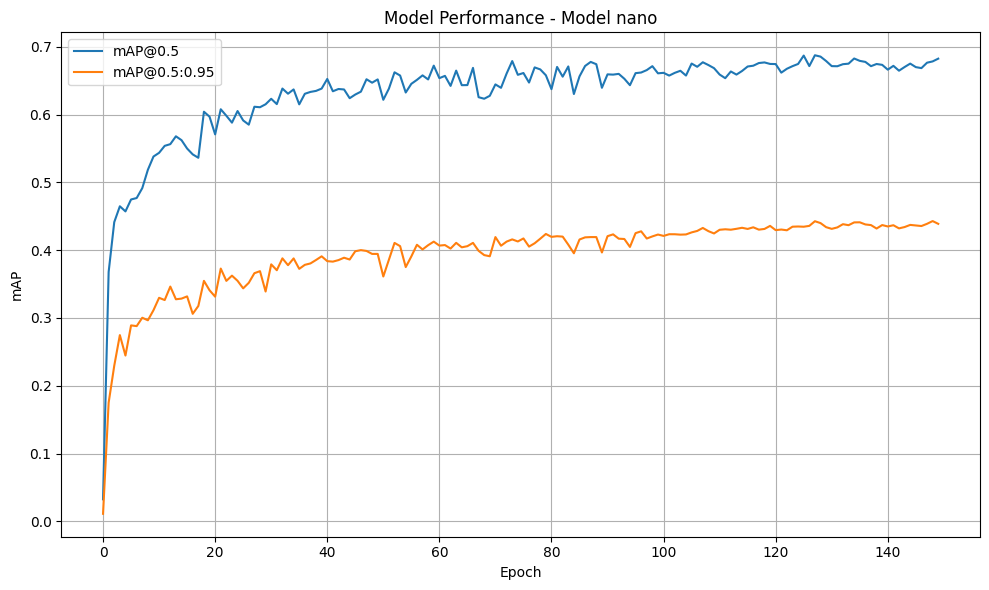

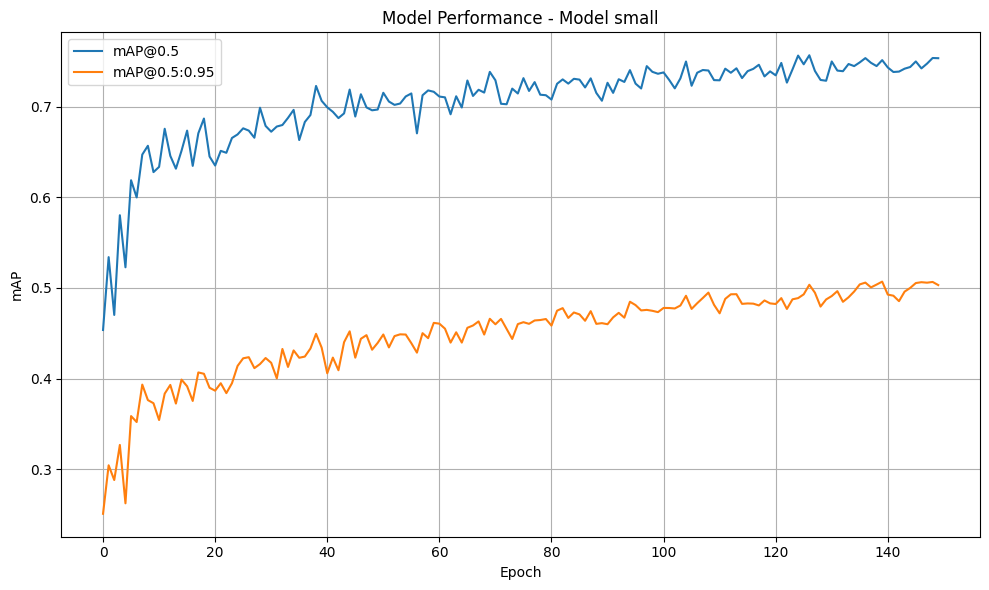

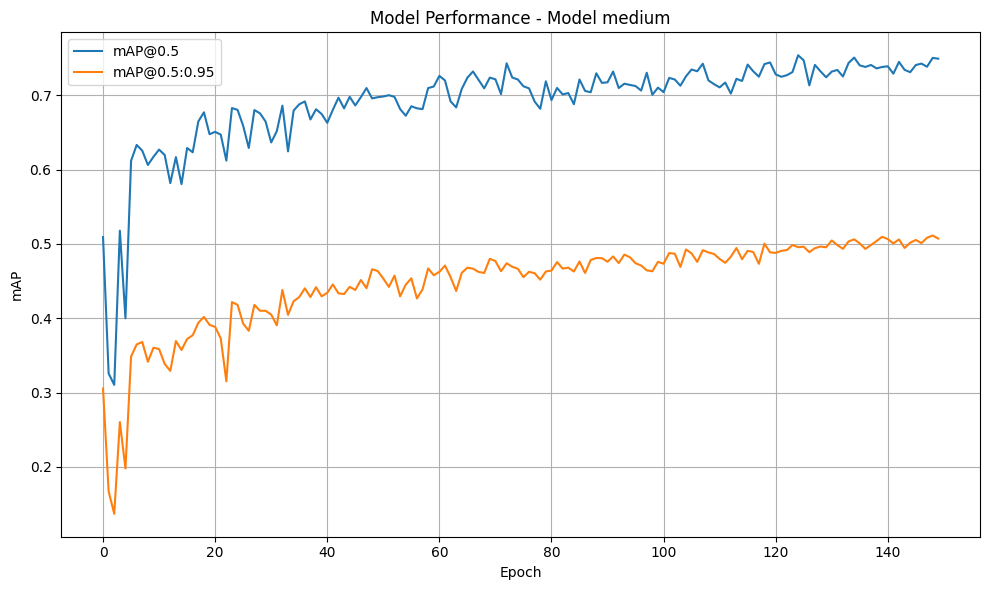

In [13]:
# Visualize mAP vs Epoch
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_mixed_player_and_ball_class}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_mixed_player_and_ball_class}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

## Predict Image dan Video

In [29]:
# sizes = ['nano', 'small', 'medium']

# for size in sizes:
#     print(f"Running prediction for {size} model...")

#     model = YOLO(f"results/training/{size}-training/weights/best.pt")

#     model(
#         source="Tarkam-Football-Analytics-4/train/images",
#         save=True,
#         project="results/predict-image",
#         name=f"{size}-predict-image",
#         exist_ok=True
#     )

#     model(
#         source="20SecondVideo/20Second-GoogleDrive.mp4",
#         save=True,
#         project="results/predict-video/predict-video-1",
#         name=f"{size}-predict-video-1",
#         exist_ok=True
#     )

#     model(
#         source="20SecondVideo/20Second-IATLIAMA.mp4",
#         save=True,
#         project="results/predict-video/predict-video-2",
#         name=f"{size}-predict-video-2",
#         exist_ok=True
#     )

#     model(
#         source="20SecondVideo/20Second-AdvanSoemantri.mp4",
#         save=True,
#         project="results/predict-video/predict-video-3",
#         name=f"{size}-predict-video-3",
#         exist_ok=True
#     )

#     model(
#         source="20SecondVideo/20Second-AdvanKingkong.mp4",
#         save=True,
#         project="results/predict-video/predict-video-4",
#         name=f"{size}-predict-video-4",
#         exist_ok=True
#     )

#     print(f"Finished predicting for {size} model.")

## Track Video

In [ ]:
# Variable Global
sizes = ['nano', 'small', 'medium']
tracker_path = "botsort.yaml"
project_base_internal_all_class = "results/internal/all_class"
video_sources = {
    "track-video-1": "20SecondVideo/20Second-GoogleDrive.mp4",
    "track-video-2": "20SecondVideo/20Second-IATLIAMA.mp4",
    "track-video-3": "20SecondVideo/20Second-AdvanSoemantri.mp4",
    "track-video-4": "20SecondVideo/20Second-AdvanKingkong.mp4"
}

In [30]:
for size in sizes:
    print(f"Tracking for {size} model...")

    model_path = f"{project_base_internal_all_class}/training/{size}-training/weights/best.pt"
    model = YOLO(model_path)

    for video_name, source_path in video_sources.items():
        model(
            source=source_path,
            tracker=tracker_path,
            project=f"{project_base_internal_all_class}/tracking/{video_name}",
            name=f"{size}-{video_name}",
            save=True,
            exist_ok=True
        )

    print(f"✅ Finished tracking for {size} model.")